### Business Understanding
The Centers for Medicare & Medicaid Services (CMS) is a federal agency in the US responsible for administering major healthcare programs, including Medicare and Medicaid. As part of its efforts to improve the quality of healthcare in the country, CMS rates hospitals on a scale of 1-5 to help patients and consumers compare the quality of services offered by different hospitals. These ratings can significantly impact hospitals' revenues, as they can influence consumers' choices of healthcare providers. Therefore, it is important for hospitals to identify the key factors that affect their ratings and work to improve them in order to increase their attractiveness to potential patients and insurance providers.

#### In this project, we will approach the ‘CMS rating problem’ from different angles. We can think of it as ‘re-engineering the CMS rating system’.

The phrase "re-engineering the CMS rating system" refers to the idea of looking at the CMS rating system from a different perspective or angle, with the goal of finding new ways to improve it. This could involve analyzing the current rating system to identify its strengths and weaknesses, and then proposing changes or improvements to the system based on that analysis. The goal of this approach is to create a more effective and accurate rating system that better reflects the quality of care provided by hospitals

In [1]:
# Import useful Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')



# Reading the Dataset

In [2]:
#let's change the working directory to make it easier
import os
os.chdir('hospital')


In [3]:
# Read the Dataset
comp_hosptl=pd.read_csv('Complications - Hospital.csv')

In [4]:
hcahps_hosptl=pd.read_csv('HCAHPS - Hospital.csv',header=0,encoding = 'unicode_escape')

In [5]:
haf = pd.read_csv('Healthcare Associated Infections - Hospital.csv')

In [6]:
oie = pd.read_csv('Outpatient Imaging Efficiency - Hospital.csv')

In [7]:
rad = pd.read_csv('Readmissions and Deaths - Hospital.csv')

In [8]:
taec = pd.read_csv('Timely and Effective Care - Hospital.csv')

In [9]:
hgi = pd.read_csv('Hospital General Information.csv',header=0,encoding = 'unicode_escape')

# Data Understanding, Cleaning and Updating

- Keep the rows which has valid Measure ID

In [10]:
#keep only valid Measure ID values
measure_ID = ['MORT_30_AMI', 'MORT_30_CABG','MORT_30_COPD','MORT_30_HF','MORT_30_PN','MORT_30_STK','PSI_4_SURG_COMP','HAI_1','HAI_2','HAI_3','HAI_4','HAI_5','HAI_6','COMP_HIP_KNEE','PSI_90_SAFETY','READM_30_AMI','READM_30_CABG','READM_30_COPD','READM_30_HF','READM_30_HIP_KNEE','READM_30_PN','READM_30_STK','READM_30_HOSP_WIDE','H_CLEAN_HSP','H_COMP_1','H_COMP_2','H_COMP_3','H_COMP_4','H_COMP_5','H_COMP_6','H_HSP_RATING','H_QUIET_HSP','H_RECMND','H_COMP_7','CAC_3','IMM_2','IMM_3','OP_4','OP_22','OP_23','PC_01','STK_1','STK_4','STK_6','STK_8','VTE_1','VTE_2','VTE_3','VTE_5','VTE_6','ED_1b','ED_2b','OP_3','OP_5','OP_18b','OP_20','OP_21','OP_8','OP_10','OP_11','OP_13','OP_14'] 

-check the shape

In [11]:
#Check info of each columns
comp_hosptl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52998 entries, 0 to 52997
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Provider ID           52998 non-null  int64 
 1   Hospital Name         52998 non-null  object
 2   Address               52998 non-null  object
 3   City                  52998 non-null  object
 4   State                 52998 non-null  object
 5   ZIP Code              52998 non-null  int64 
 6   County Name           52833 non-null  object
 7   Phone Number          52998 non-null  int64 
 8   Measure Name          52998 non-null  object
 9   Measure ID            52998 non-null  object
 10  Compared to National  52998 non-null  object
 11  Denominator           52998 non-null  object
 12  Score                 52998 non-null  object
 13  Lower Estimate        52998 non-null  object
 14  Higher Estimate       52998 non-null  object
 15  Footnote              21874 non-null

- Let's remove the not required columns and keep only Provider ID and Measure ID

In [12]:
#Take only Provider ID and Measure ID
comp_hosptl= comp_hosptl[['Provider ID','Measure ID','Score']]

- Remove the rows where Measure ID is blank

In [13]:
#Removing null values of Measure ID
comp_hosptl= comp_hosptl[pd.notnull(comp_hosptl['Measure ID'])]

- Check the different Measure present

In [14]:
comp_hosptl.groupby(['Measure ID']).size().reset_index(name='counts')

Measure ID  counts
0               COMP_HIP_KNEE    4818
1   PSI_12_POSTOP_PULMEMB_DVT    4818
2          PSI_13_POST_SEPSIS    4818
3         PSI_14_POSTOP_DEHIS    4818
4              PSI_15_ACC_LAC    4818
5                 PSI_3_ULCER    4818
6             PSI_4_SURG_COMP    4818
7               PSI_6_IAT_PTX    4818
8                 PSI_7_CVCBI    4818
9              PSI_8_POST_HIP    4818
10              PSI_90_SAFETY    4818

Filter the values which have valid measure values

In [15]:
#Check valid Measure values
comp_hosptl = comp_hosptl.loc[comp_hosptl['Measure ID'].isin(measure_ID)]

In [16]:
#Check the shape
comp_hosptl.shape

(14454, 3)

- Remove Duplicate rows

In [17]:
#Drop the rows which have duplicate values
comp_hosptl.drop_duplicates(keep='first',inplace=True)
comp_hosptl.shape

(14454, 3)

Pivot the table, to get the unique row for Provider ID

In [18]:
#Getting unique values for Provider ID
ch5 = comp_hosptl.pivot(index='Provider ID',columns='Measure ID', values = 'Score')
ch5.head()

Measure ID   COMP_HIP_KNEE PSI_4_SURG_COMP PSI_90_SAFETY
Provider ID                                             
10001                  3.8          168.26          0.68
10005                  3.0          179.05          0.85
10006                  3.8          198.33          0.91
10007        Not Available   Not Available          0.79
10008        Not Available   Not Available          0.90

In [19]:
#Check the shape
ch5.shape

(4818, 3)

In [20]:
#Checking all columns
hcahps_hosptl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264990 entries, 0 to 264989
Data columns (total 22 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   Provider ID                            264990 non-null  int64 
 1   Hospital Name                          264990 non-null  object
 2   Address                                264990 non-null  object
 3   City                                   264990 non-null  object
 4   State                                  264990 non-null  object
 5   ZIP Code                               264990 non-null  int64 
 6   County Name                            264165 non-null  object
 7   Phone Number                           264990 non-null  int64 
 8   HCAHPS Measure ID                      264990 non-null  object
 9   HCAHPS Question                        264990 non-null  object
 10  HCAHPS Answer Description              264990 non-null  object
 11  

- Let's keep Provider ID and Measure ID 

In [21]:
#Taking Provider ID and Measure ID
hcahps_hosptl = hcahps_hosptl[['Provider ID','HCAHPS Measure ID','HCAHPS Linear Mean Value']]

- Remove the Null rows

In [22]:
#Removing null values
hcahps_hosptl = hcahps_hosptl[pd.notnull(hcahps_hosptl['HCAHPS Measure ID'])]

Check the various Measures prersent in the table

In [23]:
hcahps_hosptl.groupby(['HCAHPS Measure ID']).size().reset_index(name='counts')

HCAHPS Measure ID  counts
0             H_CLEAN_HSP_A_P    4818
1            H_CLEAN_HSP_SN_P    4818
2             H_CLEAN_HSP_U_P    4818
3        H_CLEAN_LINEAR_SCORE    4818
4         H_CLEAN_STAR_RATING    4818
5                H_COMP_1_A_P    4818
6       H_COMP_1_LINEAR_SCORE    4818
7               H_COMP_1_SN_P    4818
8        H_COMP_1_STAR_RATING    4818
9                H_COMP_1_U_P    4818
10               H_COMP_2_A_P    4818
11      H_COMP_2_LINEAR_SCORE    4818
12              H_COMP_2_SN_P    4818
13       H_COMP_2_STAR_RATING    4818
14               H_COMP_2_U_P    4818
15               H_COMP_3_A_P    4818
16      H_COMP_3_LINEAR_SCORE    4818
17              H_COMP_3_SN_P    4818
18       H_COMP_3_STAR_RATING    4818
19               H_COMP_3_U_P    4818
20               H_COMP_4_A_P    4818
21      H_COMP_4_LINEAR_SCORE    4818
22              H_COMP_4_SN_P    4818
23       H_COMP_4_STAR_RATING    4818
24               H_COMP_4_U_P    4818
25               H_COMP_5_A_P    4818
26      H_COMP_5_LINEAR_SCORE    4818
27              H_COMP_5_SN_P    4818
28       H_COMP_5_STAR_RATING    4818
29               H_COMP_5_U_P    4818
30      H_COMP_6_LINEAR_SCORE    4818
31               H_COMP_6_N_P    4818
32       H_COMP_6_STAR_RATING    4818
33               H_COMP_6_Y_P    4818
34                 H_COMP_7_A    4818
35              H_COMP_7_D_SD    4818
36      H_COMP_7_LINEAR_SCORE    4818
37                H_COMP_7_SA    4818
38       H_COMP_7_STAR_RATING    4818
39           H_HSP_RATING_0_6    4818
40           H_HSP_RATING_7_8    4818
41          H_HSP_RATING_9_10    4818
42  H_HSP_RATING_LINEAR_SCORE    4818
43   H_HSP_RATING_STAR_RATING    4818
44            H_QUIET_HSP_A_P    4818
45           H_QUIET_HSP_SN_P    4818
46            H_QUIET_HSP_U_P    4818
47       H_QUIET_LINEAR_SCORE    4818
48        H_QUIET_STAR_RATING    4818
49                H_RECMND_DN    4818
50                H_RECMND_DY    4818
51      H_RECMND_LINEAR_SCORE    4818
52                H_RECMND_PY    4818
53       H_RECMND_STAR_RATING    4818
54              H_STAR_RATING    4818

Remove the extra information present in Measure field

In [24]:
hcahps_hosptl = hcahps_hosptl.replace(['H_CLEAN_HSP_A_P','H_CLEAN_HSP_SN_P','H_CLEAN_HSP_U_P','H_CLEAN_LINEAR_SCORE','H_CLEAN_STAR_RATING'],'H_CLEAN_HSP')

In [25]:
hcahps_hosptl = hcahps_hosptl.replace(['H_COMP_1_A_P','H_COMP_1_LINEAR_SCORE','H_COMP_1_SN_P','H_COMP_1_STAR_RATING','H_COMP_1_U_P'],'H_COMP_1')

In [26]:
hcahps_hosptl = hcahps_hosptl.replace(['H_COMP_2_A_P','H_COMP_2_LINEAR_SCORE','H_COMP_2_SN_P','H_COMP_2_STAR_RATING','H_COMP_2_U_P'],'H_COMP_2')

In [27]:
hcahps_hosptl = hcahps_hosptl.replace(['H_COMP_3_A_P','H_COMP_3_LINEAR_SCORE','H_COMP_3_SN_P','H_COMP_3_STAR_RATING','H_COMP_3_U_P'],'H_COMP_3')

In [28]:
hcahps_hosptl = hcahps_hosptl.replace(['H_COMP_4_A_P','H_COMP_4_LINEAR_SCORE','H_COMP_4_SN_P','H_COMP_4_STAR_RATING','H_COMP_4_U_P'],'H_COMP_4')

In [29]:
hcahps_hosptl = hcahps_hosptl.replace(['H_COMP_5_A_P','H_COMP_5_LINEAR_SCORE','H_COMP_5_SN_P','H_COMP_5_STAR_RATING','H_COMP_5_U_P'],'H_COMP_5')

In [30]:
hcahps_hosptl = hcahps_hosptl.replace(['H_COMP_6_LINEAR_SCORE','H_COMP_6_N_P','H_COMP_6_STAR_RATING','H_COMP_6_Y_P'],'H_COMP_6')

In [31]:
hcahps_hosptl = hcahps_hosptl.replace(['H_COMP_7_A','H_COMP_7_D_SD','H_COMP_7_LINEAR_SCORE','H_COMP_7_SA','H_COMP_7_STAR_RATING'],'H_COMP_7')

In [32]:
hcahps_hosptl = hcahps_hosptl.replace(['H_HSP_RATING_0_6','H_HSP_RATING_7_8','H_HSP_RATING_9_10','H_HSP_RATING_LINEAR_SCORE','H_HSP_RATING_STAR_RATING'],'H_HSP_RATING')

In [33]:
hcahps_hosptl = hcahps_hosptl.replace(['H_QUIET_HSP_A_P','H_QUIET_HSP_SN_P','H_QUIET_HSP_U_P','H_QUIET_LINEAR_SCORE','H_QUIET_STAR_RATING'],'H_QUIET_HSP')

In [34]:
hcahps_hosptl = hcahps_hosptl.replace(['H_RECMND_DN','H_RECMND_DY','H_RECMND_LINEAR_SCORE','H_RECMND_PY','H_RECMND_STAR_RATING'],'H_RECMND')

- Let's filter the table with the valid measure values

In [35]:
#Taking valid Measure values
hcahps_hosptl = hcahps_hosptl.loc[hcahps_hosptl['HCAHPS Measure ID'].isin(measure_ID)]

Remove the Duplicate Rows

In [36]:
#Dropping the duplicate Rows
hcahps_hosptl = hcahps_hosptl.drop_duplicates(subset=['Provider ID', 'HCAHPS Measure ID'], keep='first')

- Check the shape of the table

In [37]:
#Check the shape
hcahps_hosptl.shape

(52998, 3)

In [38]:
hcahps_hosptl = hcahps_hosptl.rename(columns = {"HCAHPS Measure ID": "Measure ID"}) 

In [39]:
hcahps_hosptl.groupby(['Measure ID']).size().reset_index(name='counts')

Measure ID  counts
0    H_CLEAN_HSP    4818
1       H_COMP_1    4818
2       H_COMP_2    4818
3       H_COMP_3    4818
4       H_COMP_4    4818
5       H_COMP_5    4818
6       H_COMP_6    4818
7       H_COMP_7    4818
8   H_HSP_RATING    4818
9    H_QUIET_HSP    4818
10      H_RECMND    4818

Pivot the table, to get unique value for Provider ID

In [40]:
#Getting unique values for Provider ID
hh9 = hcahps_hosptl.pivot(index='Provider ID',columns='Measure ID', values = 'HCAHPS Linear Mean Value')
hh9.head()

Measure ID      H_CLEAN_HSP        H_COMP_1        H_COMP_2        H_COMP_3  \
Provider ID                                                                   
10001        Not Applicable  Not Applicable  Not Applicable  Not Applicable   
10005        Not Applicable  Not Applicable  Not Applicable  Not Applicable   
10006        Not Applicable  Not Applicable  Not Applicable  Not Applicable   
10007        Not Applicable  Not Applicable  Not Applicable  Not Applicable   
10008        Not Applicable  Not Applicable  Not Applicable  Not Applicable   

Measure ID         H_COMP_4        H_COMP_5       H_COMP_6        H_COMP_7  \
Provider ID                                                                  
10001        Not Applicable  Not Applicable             87  Not Applicable   
10005        Not Applicable  Not Applicable             88  Not Applicable   
10006        Not Applicable  Not Applicable             83  Not Applicable   
10007        Not Applicable  Not Applicable             86  Not Applicable   
10008        Not Applicable  Not Applicable  Not Available  Not Applicable   

Measure ID     H_HSP_RATING     H_QUIET_HSP        H_RECMND  
Provider ID                                                  
10001        Not Applicable  Not Applicable  Not Applicable  
10005        Not Applicable  Not Applicable  Not Applicable  
10006        Not Applicable  Not Applicable  Not Applicable  
10007        Not Applicable  Not Applicable  Not Applicable  
10008        Not Applicable  Not Applicable  Not Applicable

In [41]:
#Check the number of rows and columns
hh9.shape

(4818, 11)

In [42]:
#Check the info of all columns
haf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231264 entries, 0 to 231263
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Provider ID           231264 non-null  int64 
 1   Hospital Name         231264 non-null  object
 2   Address               231264 non-null  object
 3   City                  231264 non-null  object
 4   State                 231264 non-null  object
 5   ZIP Code              231264 non-null  int64 
 6   County Name           230544 non-null  object
 7   Phone Number          231264 non-null  int64 
 8   Measure Name          231264 non-null  object
 9   Measure ID            231264 non-null  object
 10  Compared to National  38544 non-null   object
 11  Score                 231264 non-null  object
 12  Footnote              103373 non-null  object
 13  Measure Start Date    231264 non-null  object
 14  Measure End Date      231264 non-null  object
dtypes: int64(3), obje

Keep Provider ID and Measure ID column and remove other columns 

In [43]:
#Check the number of rows and columns
haf = haf[['Provider ID','Measure ID','Score']]
haf.shape

(231264, 3)

Check the values of Measaure ID in the table

In [44]:
#Checking Measure ID values in table
haf.groupby(['Measure ID']).size().reset_index(name='counts')

Measure ID  counts
0     HAI_1_CI_LOWER    4818
1     HAI_1_CI_UPPER    4818
2    HAI_1_DOPC_DAYS    4818
3    HAI_1_ELIGCASES    4818
4    HAI_1_NUMERATOR    4818
5          HAI_1_SIR    4818
6    HAI_1a_CI_LOWER    4818
7    HAI_1a_CI_UPPER    4818
8   HAI_1a_DOPC_DAYS    4818
9   HAI_1a_ELIGCASES    4818
10  HAI_1a_NUMERATOR    4818
11        HAI_1a_SIR    4818
12    HAI_2_CI_LOWER    4818
13    HAI_2_CI_UPPER    4818
14   HAI_2_DOPC_DAYS    4818
15   HAI_2_ELIGCASES    4818
16   HAI_2_NUMERATOR    4818
17         HAI_2_SIR    4818
18   HAI_2a_CI_LOWER    4818
19   HAI_2a_CI_UPPER    4818
20  HAI_2a_DOPC_DAYS    4818
21  HAI_2a_ELIGCASES    4818
22  HAI_2a_NUMERATOR    4818
23        HAI_2a_SIR    4818
24    HAI_3_CI_LOWER    4818
25    HAI_3_CI_UPPER    4818
26   HAI_3_DOPC_DAYS    4818
27   HAI_3_ELIGCASES    4818
28   HAI_3_NUMERATOR    4818
29         HAI_3_SIR    4818
30    HAI_4_CI_LOWER    4818
31    HAI_4_CI_UPPER    4818
32   HAI_4_DOPC_DAYS    4818
33   HAI_4_ELIGCASES    4818
34   HAI_4_NUMERATOR    4818
35         HAI_4_SIR    4818
36    HAI_5_CI_LOWER    4818
37    HAI_5_CI_UPPER    4818
38   HAI_5_DOPC_DAYS    4818
39   HAI_5_ELIGCASES    4818
40   HAI_5_NUMERATOR    4818
41         HAI_5_SIR    4818
42    HAI_6_CI_LOWER    4818
43    HAI_6_CI_UPPER    4818
44   HAI_6_DOPC_DAYS    4818
45   HAI_6_ELIGCASES    4818
46   HAI_6_NUMERATOR    4818
47         HAI_6_SIR    4818

Remove the extra information present in the field value

In [45]:
haf = haf.replace(['HAI_1_CI_LOWER','HAI_1_CI_UPPER','HAI_1_DOPC_DAYS','HAI_1_ELIGCASES','HAI_1_NUMERATOR','HAI_1_SIR','HAI_1a_CI_LOWER','HAI_1a_CI_UPPER','HAI_1a_DOPC_DAYS','HAI_1a_ELIGCASES','HAI_1a_NUMERATOR','HAI_1a_SIR'],'HAI_1')

In [46]:
haf = haf.replace(['HAI_2_CI_LOWER','HAI_2_CI_UPPER','HAI_2_DOPC_DAYS','HAI_2_ELIGCASES','HAI_2_NUMERATOR','HAI_2_SIR','HAI_2a_CI_LOWER','HAI_2a_CI_UPPER','HAI_2a_DOPC_DAYS','HAI_2a_ELIGCASES','HAI_2a_NUMERATOR','HAI_2a_SIR'],'HAI_2')

In [47]:
haf = haf.replace(['HAI_3_CI_LOWER','HAI_3_CI_UPPER','HAI_3_DOPC_DAYS','HAI_3_ELIGCASES','HAI_3_NUMERATOR','HAI_3_SIR'],'HAI_3')

In [48]:
haf = haf.replace(['HAI_4_CI_LOWER','HAI_4_CI_UPPER','HAI_4_DOPC_DAYS','HAI_4_ELIGCASES','HAI_4_NUMERATOR','HAI_4_SIR'],'HAI_4')

In [49]:
haf = haf.replace(['HAI_5_CI_LOWER','HAI_5_CI_UPPER','HAI_5_DOPC_DAYS','HAI_5_ELIGCASES','HAI_5_NUMERATOR','HAI_5_SIR'],'HAI_5')

In [50]:
haf = haf.replace(['HAI_6_CI_LOWER','HAI_6_CI_UPPER','HAI_6_DOPC_DAYS','HAI_6_ELIGCASES','HAI_6_NUMERATOR','HAI_6_SIR'],'HAI_6')

- let remove duplicate and null rows

In [51]:
#Removing duplicate and null rows
haf = haf[pd.notnull(haf['Measure ID'])]
#haf.drop_duplicates(keep='first',inplace=True)
haf = haf.drop_duplicates(subset=['Provider ID', 'Measure ID'], keep='first')

Filter the value with Measure filed values

In [52]:
#Keep the valid Measure filed values
haf = haf.loc[haf['Measure ID'].isin(measure_ID)]

In [53]:
#check the rows and columns
haf.shape

(28908, 3)

- Pivot the table, to get unique row for Provider ID

In [54]:
#Finding unique rows for Provider ID
haf10 = haf.pivot(index='Provider ID',columns='Measure ID', values = 'Score')
haf10.head()

Measure ID           HAI_1          HAI_2          HAI_3          HAI_4  \
Provider ID                                                               
10001                 1.03          0.974           0.95  Not Available   
10005                0.337          0.167          0.019  Not Available   
10006                0.138          0.373          0.016  Not Available   
10007        Not Available  Not Available  Not Available  Not Available   
10008        Not Available  Not Available  Not Available  Not Available   

Measure ID           HAI_5          HAI_6  
Provider ID                                
10001                0.107          0.562  
10005                0.233          0.177  
10006                0.401          0.309  
10007        Not Available  Not Available  
10008        Not Available          0.029

In [55]:
#Check the shape
haf10.shape

(4818, 6)

In [56]:
#Check all info of columns
oie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28908 entries, 0 to 28907
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Provider ID         28908 non-null  int64 
 1   Hospital Name       28908 non-null  object
 2   Address             28908 non-null  object
 3   City                28908 non-null  object
 4   State               28908 non-null  object
 5   ZIP Code            28908 non-null  int64 
 6   County Name         28818 non-null  object
 7   Phone Number        28908 non-null  int64 
 8   Measure ID          28908 non-null  object
 9   Measure Name        28908 non-null  object
 10  Score               28908 non-null  object
 11  Footnote            12595 non-null  object
 12  Measure Start Date  28908 non-null  object
 13  Measure End Date    28908 non-null  object
dtypes: int64(3), object(11)
memory usage: 3.1+ MB


Keep Provider ID and Measure ID columns

In [57]:
#Let's take Provider ID and Measure ID
oie = oie[['Provider ID','Measure ID','Score']]
oie.shape

(28908, 3)

Validate the valid values of the table

In [58]:
oie.groupby(['Measure ID']).size().reset_index(name='counts')

Measure ID  counts
0      OP_10    4818
1      OP_11    4818
2      OP_13    4818
3      OP_14    4818
4       OP_8    4818
5       OP_9    4818

Filter the valid Measures

In [59]:
oie = oie.loc[oie['Measure ID'].isin(measure_ID)]

Remove the Null and Duplicate Values

In [60]:
#Removing null values and duplicate values
oie = oie[pd.notnull(oie['Measure ID'])]
oie.drop_duplicates(keep='first',inplace=True)

In [61]:
#Let's check rows and columns
oie.shape

(24090, 3)

Pivot the table to get the unique row for the Provider id

In [62]:
#Getting unique rows for Provider ID
oie6 = oie.pivot(index='Provider ID',columns='Measure ID', values = 'Score')
oie6.head()

Measure ID  OP_10          OP_11          OP_13          OP_14           OP_8
Provider ID                                                                  
10001         6.4            0.9            7.1            2.4           38.1
10005        13.3           10.2            5.3            4.0           42.8
10006        11.8            4.6            0.0            4.6           45.6
10007        24.3            6.1  Not Available  Not Available  Not Available
10008         3.6  Not Available  Not Available            0.6  Not Available

In [63]:
#Check the shape 
oie6.shape

(4818, 5)

In [64]:
#Check info of all columns
rad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67452 entries, 0 to 67451
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Provider ID           67452 non-null  int64 
 1   Hospital Name         67452 non-null  object
 2   Address               67452 non-null  object
 3   City                  67452 non-null  object
 4   State                 67452 non-null  object
 5   ZIP Code              67452 non-null  int64 
 6   County Name           67242 non-null  object
 7   Phone Number          67452 non-null  int64 
 8   Measure Name          67452 non-null  object
 9   Measure ID            67452 non-null  object
 10  Compared to National  67452 non-null  object
 11  Denominator           67452 non-null  object
 12  Score                 67452 non-null  object
 13  Lower Estimate        67452 non-null  object
 14  Higher Estimate       67452 non-null  object
 15  Footnote              25742 non-null

Remove columns other than Provider and Measure ID

In [65]:
rad = rad[['Provider ID','Measure ID','Score']]
rad.shape

(67452, 3)

Validate the values of the  table

In [66]:
rad.groupby(['Measure ID']).size().reset_index(name='counts')

Measure ID  counts
0          MORT_30_AMI    4818
1         MORT_30_CABG    4818
2         MORT_30_COPD    4818
3           MORT_30_HF    4818
4           MORT_30_PN    4818
5          MORT_30_STK    4818
6         READM_30_AMI    4818
7        READM_30_CABG    4818
8        READM_30_COPD    4818
9          READM_30_HF    4818
10   READM_30_HIP_KNEE    4818
11  READM_30_HOSP_WIDE    4818
12         READM_30_PN    4818
13        READM_30_STK    4818

Filter the table with valid values

In [67]:
rad = rad.loc[rad['Measure ID'].isin(measure_ID)]

Remove the Null and Duplicate values

In [68]:
#Removing null values and duplicate values
rad = rad[pd.notnull(rad['Measure ID'])]
rad.drop_duplicates(keep='first',inplace=True)
rad.shape

(67452, 3)

Pivot the table, to get unique row for Provider ID

In [69]:
rad7 = rad.pivot(index='Provider ID',columns='Measure ID', values = 'Score')
rad7.head()

Measure ID     MORT_30_AMI   MORT_30_CABG MORT_30_COPD MORT_30_HF MORT_30_PN  \
Provider ID                                                                    
10001                 12.5            4.2          9.3       12.4       15.5   
10005                 16.0  Not Available          7.6       15.5       20.8   
10006                 16.7            4.1          7.1       15.6       18.2   
10007        Not Available  Not Available          9.3       14.4       18.8   
10008        Not Available  Not Available          8.2       12.7       15.7   

Measure ID     MORT_30_STK   READM_30_AMI  READM_30_CABG READM_30_COPD  \
Provider ID                                                              
10001                 15.4           16.5           15.1          21.1   
10005                 15.5           16.7  Not Available          18.0   
10006                 17.9           16.1           15.2          19.8   
10007                 16.6  Not Available  Not Available          19.9   
10008        Not Available  Not Available  Not Available          19.2   

Measure ID  READM_30_HF READM_30_HIP_KNEE READM_30_HOSP_WIDE READM_30_PN  \
Provider ID                                                                
10001              21.4               5.1               15.4        18.7   
10005              21.9               5.7               14.9        16.4   
10006              20.6               5.0               15.4        17.9   
10007              21.1     Not Available               16.6        17.3   
10008              23.1     Not Available               15.7        16.0   

Measure ID    READM_30_STK  
Provider ID                 
10001                 12.7  
10005                 13.4  
10006                 12.0  
10007                 12.7  
10008        Not Available

In [70]:
#Check the shape
rad7.shape

(4818, 14)

In [71]:
#Check info of all columns
taec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207174 entries, 0 to 207173
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Provider ID         207174 non-null  int64 
 1   Hospital Name       207174 non-null  object
 2   Address             207174 non-null  object
 3   City                207174 non-null  object
 4   State               207174 non-null  object
 5   ZIP Code            207174 non-null  int64 
 6   County Name         206529 non-null  object
 7   Phone Number        207174 non-null  int64 
 8   Condition           207174 non-null  object
 9   Measure ID          207174 non-null  object
 10  Measure Name        207174 non-null  object
 11  Score               207174 non-null  object
 12  Sample              202356 non-null  object
 13  Footnote            160185 non-null  object
 14  Measure Start Date  207174 non-null  object
 15  Measure End Date    207174 non-null  object
dtypes:

Keep Provider ID and Measure ID columns and remove other information

In [72]:
taec = taec[['Provider ID','Measure ID','Score']]
taec.shape

(207174, 3)

Validate the value for Measure column

In [73]:
taec.groupby(['Measure ID']).size().reset_index(name='counts')

Measure ID  counts
0                   AMI_7a    4818
1                   AMI_8a    4818
2                    CAC_3    4818
3                      EDV    4818
4                    ED_1b    4818
5                    ED_2b    4818
6                     HF_2    4818
7                    IMM_2    4818
8   IMM_3_OP_27_FAC_ADHPCT    4818
9                     OP_1    4818
10                  OP_18b    4818
11                    OP_2    4818
12                   OP_20    4818
13                   OP_21    4818
14                   OP_22    4818
15                   OP_23    4818
16                   OP_29    4818
17                   OP_30    4818
18                   OP_3b    4818
19                    OP_4    4818
20                    OP_5    4818
21                   PC_01    4818
22                    PN_6    4818
23             SCIP_CARD_2    4818
24              SCIP_INF_1    4818
25              SCIP_INF_2    4818
26              SCIP_INF_3    4818
27              SCIP_INF_9    4818
28              SCIP_VTE_2    4818
29                   STK_1    4818
30                  STK_10    4818
31                   STK_2    4818
32                   STK_3    4818
33                   STK_4    4818
34                   STK_5    4818
35                   STK_6    4818
36                   STK_8    4818
37                   VTE_1    4818
38                   VTE_2    4818
39                   VTE_3    4818
40                   VTE_4    4818
41                   VTE_5    4818
42                   VTE_6    4818

Remove the extra information from the value

In [74]:
taec = taec.replace(['IMM_3_OP_27_FAC_ADHPCT'],'IMM_3')

In [75]:
taec = taec.replace(['OP_3b'],'OP_3')

Remove the Null and duplicate values

In [76]:
taec = taec[pd.notnull(taec['Measure ID'])]
taec.drop_duplicates(keep='first',inplace=True)
taec.shape

(207174, 3)

In [77]:
taec = taec.loc[taec['Measure ID'].isin(measure_ID)]

Pivot the table to get the unique row for Provider ID

In [78]:
taec8 = taec.pivot(index='Provider ID',columns='Measure ID', values = 'Score')
taec8.head()

Measure ID           CAC_3 ED_1b ED_2b IMM_2 IMM_3 OP_18b OP_20 OP_21 OP_22  \
Provider ID                                                                   
10001        Not Available   269    68    97    81    196    65    99     4   
10005        Not Available   243    71    99    83    117    27    60     2   
10006        Not Available   217    78   100    87    133    10    58     1   
10007        Not Available   219    68    99    53    119    38    90     1   
10008        Not Available   180    56    95    43     98    27    49     1   

Measure ID           OP_23  ...          PC_01          STK_1          STK_4  \
Provider ID                 ...                                                
10001        Not Available  ...              0             99             67   
10005                   86  ...              1             98  Not Available   
10006        Not Available  ...              0             99  Not Available   
10007        Not Available  ...  Not Available             80  Not Available   
10008        Not Available  ...  Not Available  Not Available  Not Available   

Measure ID           STK_6          STK_8 VTE_1          VTE_2          VTE_3  \
Provider ID                                                                     
10001                   99             87    97             99             91   
10005                   88            100    95             94            100   
10006                   97             90    98             89             86   
10007                   71  Not Available    97             99  Not Available   
10008        Not Available  Not Available    99  Not Available  Not Available   

Measure ID           VTE_5          VTE_6  
Provider ID                                
10001                   90              0  
10005                  100  Not Available  
10006                   92              0  
10007        Not Available  Not Available  
10008        Not Available  Not Available  

[5 rows x 23 columns]

In [79]:
taec8.shape

(4818, 23)

- Let's Merge all the dataframe on Provider_ID

In [80]:
#Marging all dataframe on Provider ID
merge_IDs = pd.merge(ch5, oie6, on='Provider ID', how = 'outer').merge(rad7,on='Provider ID', how = 'outer').merge(taec8,on='Provider ID', how = 'outer').merge(hh9,on='Provider ID', how = 'outer').merge(haf10,on='Provider ID', how = 'outer')

In [81]:
#Check the shape 
merge_IDs.shape


(4818, 62)

In [82]:
#Let's see the head of data
merge_IDs.head()

Measure ID   COMP_HIP_KNEE PSI_4_SURG_COMP PSI_90_SAFETY OP_10          OP_11  \
Provider ID                                                                     
10001                  3.8          168.26          0.68   6.4            0.9   
10005                  3.0          179.05          0.85  13.3           10.2   
10006                  3.8          198.33          0.91  11.8            4.6   
10007        Not Available   Not Available          0.79  24.3            6.1   
10008        Not Available   Not Available          0.90   3.6  Not Available   

Measure ID           OP_13          OP_14           OP_8    MORT_30_AMI  \
Provider ID                                                               
10001                  7.1            2.4           38.1           12.5   
10005                  5.3            4.0           42.8           16.0   
10006                  0.0            4.6           45.6           16.7   
10007        Not Available  Not Available  Not Available  Not Available   
10008        Not Available            0.6  Not Available  Not Available   

Measure ID    MORT_30_CABG  ...        H_COMP_7    H_HSP_RATING  \
Provider ID                 ...                                   
10001                  4.2  ...  Not Applicable  Not Applicable   
10005        Not Available  ...  Not Applicable  Not Applicable   
10006                  4.1  ...  Not Applicable  Not Applicable   
10007        Not Available  ...  Not Applicable  Not Applicable   
10008        Not Available  ...  Not Applicable  Not Applicable   

Measure ID      H_QUIET_HSP        H_RECMND          HAI_1          HAI_2  \
Provider ID                                                                 
10001        Not Applicable  Not Applicable           1.03          0.974   
10005        Not Applicable  Not Applicable          0.337          0.167   
10006        Not Applicable  Not Applicable          0.138          0.373   
10007        Not Applicable  Not Applicable  Not Available  Not Available   
10008        Not Applicable  Not Applicable  Not Available  Not Available   

Measure ID           HAI_3          HAI_4          HAI_5          HAI_6  
Provider ID                                                              
10001                 0.95  Not Available          0.107          0.562  
10005                0.019  Not Available          0.233          0.177  
10006                0.016  Not Available          0.401          0.309  
10007        Not Available  Not Available  Not Available  Not Available  
10008        Not Available  Not Available  Not Available          0.029  

[5 rows x 62 columns]

In [83]:
#Check the info of data
hgi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 28 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4818 non-null   int64 
 1   Hospital Name                                                  4818 non-null   object
 2   Address                                                        4818 non-null   object
 3   City                                                           4818 non-null   object
 4   State                                                          4818 non-null   object
 5   ZIP Code                                                       4818 non-null   int64 
 6   County Name                                                    4803 non-null   object
 7   Phone Number                                                   4818 n

Remove the other columns and keep Provider ID and Hospital Rating

In [84]:
#Taking columns Provider ID and Hospital Rating
hgi = hgi[['Provider ID','Hospital overall rating']]

Remove the Null and Duplicate rows

In [85]:
#Removing null and duplicate values
hgi = hgi[pd.notnull(hgi['Hospital overall rating'])]
hgi.drop_duplicates(keep='first',inplace=True)

In [86]:
#Check the shape
hgi.shape

(4818, 2)

### Merge the Hospital General Information with Rating and df

In [87]:
merge_IDs_final =  pd.merge(hgi,merge_IDs, on='Provider ID', how = 'left')

In [88]:
merge_IDs_final.shape

(4818, 64)

Replace all the values of Not Available and Not Applicable to 0

In [89]:
merge_IDs_final = merge_IDs_final.replace(['Not Available','Not Applicable' ],0)

In [90]:
merge_IDs_final= merge_IDs_final[merge_IDs_final['Hospital overall rating'] != 0]
merge_IDs_final.shape

(3648, 64)

In [91]:
merge_IDs_final.head()

Provider ID Hospital overall rating COMP_HIP_KNEE PSI_4_SURG_COMP  \
0        10001                       3           3.8          168.26   
1        10005                       3           3.0          179.05   
2        10006                       2           3.8          198.33   
3        10007                       3             0               0   
4        10008                       3             0               0   

  PSI_90_SAFETY OP_10 OP_11 OP_13 OP_14  OP_8  ... H_COMP_7 H_HSP_RATING  \
0          0.68   6.4   0.9   7.1   2.4  38.1  ...        0            0   
1          0.85  13.3  10.2   5.3   4.0  42.8  ...        0            0   
2          0.91  11.8   4.6   0.0   4.6  45.6  ...        0            0   
3          0.79  24.3   6.1     0     0     0  ...        0            0   
4          0.90   3.6     0     0   0.6     0  ...        0            0   

  H_QUIET_HSP H_RECMND  HAI_1  HAI_2  HAI_3 HAI_4  HAI_5  HAI_6  
0           0        0   1.03  0.974   0.95     0  0.107  0.562  
1           0        0  0.337  0.167  0.019     0  0.233  0.177  
2           0        0  0.138  0.373  0.016     0  0.401  0.309  
3           0        0      0      0      0     0      0      0  
4           0        0      0      0      0     0      0  0.029  

[5 rows x 64 columns]

In [92]:
merge_IDs_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 4815
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Provider ID              3648 non-null   int64 
 1   Hospital overall rating  3648 non-null   object
 2   COMP_HIP_KNEE            3648 non-null   object
 3   PSI_4_SURG_COMP          3648 non-null   object
 4   PSI_90_SAFETY            3648 non-null   object
 5   OP_10                    3648 non-null   object
 6   OP_11                    3648 non-null   object
 7   OP_13                    3648 non-null   object
 8   OP_14                    3648 non-null   object
 9   OP_8                     3648 non-null   object
 10  MORT_30_AMI              3648 non-null   object
 11  MORT_30_CABG             3648 non-null   object
 12  MORT_30_COPD             3648 non-null   object
 13  MORT_30_HF               3648 non-null   object
 14  MORT_30_PN               3648 non-null  

Convert Object to int

In [93]:
merge_IDs_final['Hospital overall rating']  = merge_IDs_final['Hospital overall rating'].astype(int)

In [94]:
merge_IDs_final['COMP_HIP_KNEE']  = merge_IDs_final['COMP_HIP_KNEE'].astype(float)

In [95]:
 merge_IDs_final['PSI_4_SURG_COMP']  = merge_IDs_final['PSI_4_SURG_COMP'].astype(float)

In [96]:
merge_IDs_final['PSI_90_SAFETY']  = merge_IDs_final['PSI_90_SAFETY'].astype(float)


In [97]:
merge_IDs_final['OP_10']  = merge_IDs_final['OP_10'].astype(float)

In [98]:
merge_IDs_final['OP_11']  = merge_IDs_final['OP_11'].astype(float)

In [99]:
merge_IDs_final['OP_13']  = merge_IDs_final['OP_13'].astype(float)

In [100]:
merge_IDs_final['OP_14']  = merge_IDs_final['OP_14'].astype(float)

In [101]:
merge_IDs_final['OP_8']  = merge_IDs_final['OP_8'].astype(float)

In [102]:
merge_IDs_final['MORT_30_AMI']  = merge_IDs_final['MORT_30_AMI'].astype(float)

In [103]:
merge_IDs_final['MORT_30_CABG']  =merge_IDs_final['MORT_30_CABG'].astype(float)

In [104]:
merge_IDs_final['MORT_30_COPD']  = merge_IDs_final['MORT_30_COPD'].astype(float)

In [105]:
merge_IDs_final['MORT_30_HF']  = merge_IDs_final['MORT_30_HF'].astype(float)

In [106]:
merge_IDs_final['MORT_30_PN']  = merge_IDs_final['MORT_30_PN'].astype(float)

In [107]:
merge_IDs_final['MORT_30_STK']  = merge_IDs_final['MORT_30_STK'].astype(float)

In [108]:
merge_IDs_final['READM_30_AMI']  = merge_IDs_final['READM_30_AMI'].astype(float)

In [109]:
merge_IDs_final['READM_30_CABG']  = merge_IDs_final['READM_30_CABG'].astype(float)

In [110]:
merge_IDs_final['READM_30_COPD']  = merge_IDs_final['READM_30_COPD'].astype(float)

In [111]:
merge_IDs_final['READM_30_HF']  = merge_IDs_final['READM_30_HF'].astype(float)

In [112]:
merge_IDs_final['READM_30_HIP_KNEE']  = merge_IDs_final['READM_30_HIP_KNEE'].astype(float)

In [113]:
merge_IDs_final['READM_30_HOSP_WIDE']  = merge_IDs_final['READM_30_HOSP_WIDE'].astype(float)

In [114]:
merge_IDs_final['READM_30_PN']  = merge_IDs_final['READM_30_PN'].astype(float)

In [115]:
merge_IDs_final['READM_30_STK']  = merge_IDs_final['READM_30_STK'].astype(float)

In [116]:
merge_IDs_final['CAC_3']  = merge_IDs_final['CAC_3'].astype(float)

In [117]:
merge_IDs_final['ED_1b']  = merge_IDs_final['ED_1b'].astype(float)

In [118]:
merge_IDs_final['ED_2b']  = merge_IDs_final['ED_2b'].astype(float)

In [119]:
merge_IDs_final['IMM_2']  = merge_IDs_final['IMM_2'].astype(float)

In [120]:
merge_IDs_final['IMM_3']  = merge_IDs_final['IMM_3'].astype(float)

In [121]:
merge_IDs_final['OP_18b']  = merge_IDs_final['OP_18b'].astype(float)

In [122]:
merge_IDs_final['OP_20']  = merge_IDs_final['OP_20'].astype(float)

In [123]:
merge_IDs_final['OP_21']  = merge_IDs_final['OP_21'].astype(float)

In [124]:
merge_IDs_final['OP_22']  = merge_IDs_final['OP_22'].astype(float)

In [125]:
merge_IDs_final['OP_23']  = merge_IDs_final['OP_23'].astype(float)

In [126]:
merge_IDs_final['OP_3']  = merge_IDs_final['OP_3'].astype(float)

In [127]:
merge_IDs_final['OP_4']  = merge_IDs_final['OP_4'].astype(float)

In [128]:
merge_IDs_final['OP_5']  = merge_IDs_final['OP_5'].astype(float)

In [129]:
merge_IDs_final['PC_01']  = merge_IDs_final['PC_01'].astype(float)

In [130]:
merge_IDs_final['STK_1']  = merge_IDs_final['STK_1'].astype(float)

In [131]:
merge_IDs_final['STK_4']  = merge_IDs_final['STK_4'].astype(float)

In [132]:
merge_IDs_final['STK_6']  = merge_IDs_final['STK_6'].astype(float)

In [133]:
merge_IDs_final['STK_8']  =merge_IDs_final['STK_8'].astype(float)

In [134]:
merge_IDs_final['VTE_1']  = merge_IDs_final['VTE_1'].astype(float)

In [135]:
merge_IDs_final['VTE_2']  = merge_IDs_final['VTE_2'].astype(float)

In [136]:
merge_IDs_final['VTE_3']  = merge_IDs_final['VTE_3'].astype(float)

In [137]:
merge_IDs_final['VTE_5']  = merge_IDs_final['VTE_5'].astype(float)

In [138]:
merge_IDs_final['VTE_6']  = merge_IDs_final['VTE_6'].astype(float)

In [139]:
merge_IDs_final['H_COMP_6']  = merge_IDs_final['H_COMP_6'].astype(float)

In [140]:
merge_IDs_final['HAI_1']  = merge_IDs_final['HAI_1'].astype(float)

In [141]:
merge_IDs_final['HAI_2']  = merge_IDs_final['HAI_2'].astype(float)

In [142]:
merge_IDs_final['HAI_3']  = merge_IDs_final['HAI_3'].astype(float)

In [143]:
merge_IDs_final['HAI_4']  = merge_IDs_final['HAI_4'].astype(float)

In [144]:
merge_IDs_final['HAI_5']  = merge_IDs_final['HAI_5'].astype(float)

In [145]:
merge_IDs_final['HAI_6']  = merge_IDs_final['HAI_6'].astype(float)

# Perform EDA for Analysis

In [146]:
#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Count')

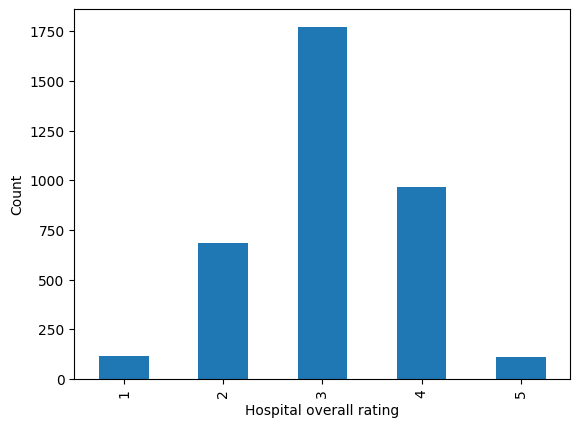

In [147]:
merge_IDs_final.groupby('Hospital overall rating').size().plot(kind='bar')
plt.ylabel('Count')

- Co-relation among the Variables

In [148]:
#Check correlations
corelation = merge_IDs_final.corr().abs()

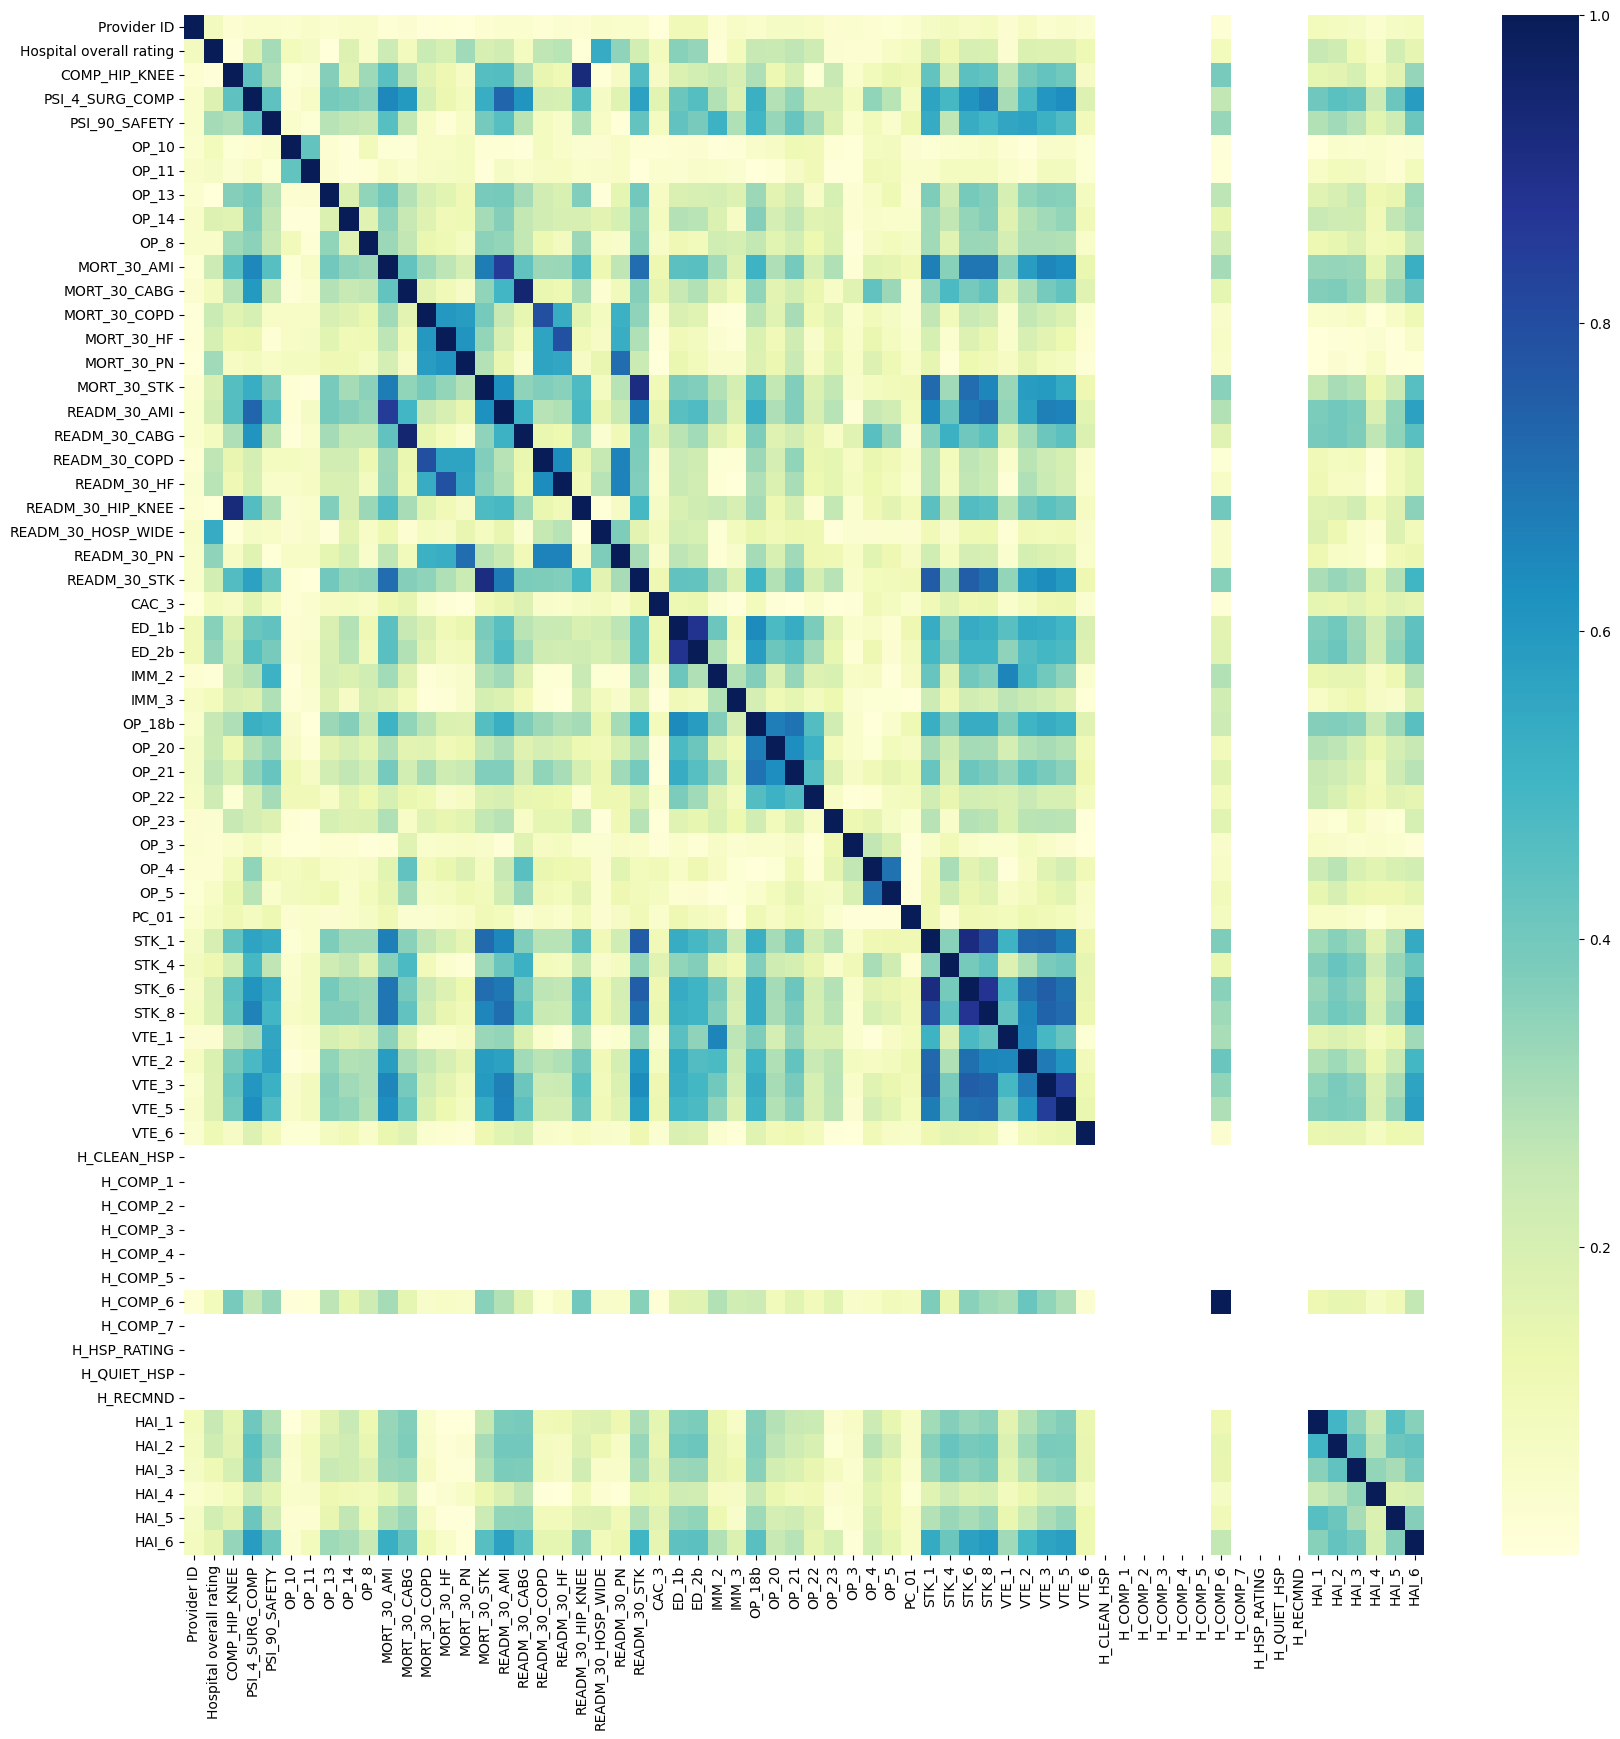

In [149]:
#Size of the figure
plt.figure(figsize=(20,20))

# heatmap
sns.heatmap(corelation, cmap="YlGnBu")
plt.show()

- Describe the data frame and validate the outliners

In [150]:
des_dataframe = merge_IDs_final.drop(['Provider ID','Hospital overall rating'], axis=1)

In [151]:
des_dataframe.describe()

COMP_HIP_KNEE  PSI_4_SURG_COMP  PSI_90_SAFETY        OP_10  \
count    3648.000000      3648.000000    3648.000000  3648.000000   
mean        2.203755        68.123251       0.742955     8.099671   
std         1.442945        69.616229       0.369000     9.599056   
min         0.000000         0.000000       0.000000     0.000000   
25%         0.000000         0.000000       0.700000     2.600000   
50%         2.700000         0.000000       0.840000     5.300000   
75%         3.200000       135.487500       0.940000     9.600000   
max         6.000000       212.160000       2.140000    82.600000   

             OP_11        OP_13        OP_14         OP_8  MORT_30_AMI  \
count  3648.000000  3648.000000  3648.000000  3648.000000  3648.000000   
mean      2.703043     2.849644     1.739391    16.577522     9.179057   
std       5.391218     2.768345     1.982042    20.251109     6.772885   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.600000     3.000000     1.300000     0.000000    13.200000   
75%       2.800000     5.000000     2.900000    37.925000    14.400000   
max      56.300000    13.600000    14.000000    63.400000    20.000000   

       MORT_30_CABG  ...  H_COMP_7  H_HSP_RATING  H_QUIET_HSP  H_RECMND  \
count   3648.000000  ...    3648.0        3648.0       3648.0    3648.0   
mean       0.946080  ...       0.0           0.0          0.0       0.0   
std        1.572723  ...       0.0           0.0          0.0       0.0   
min        0.000000  ...       0.0           0.0          0.0       0.0   
25%        0.000000  ...       0.0           0.0          0.0       0.0   
50%        0.000000  ...       0.0           0.0          0.0       0.0   
75%        2.400000  ...       0.0           0.0          0.0       0.0   
max        8.300000  ...       0.0           0.0          0.0       0.0   

             HAI_1        HAI_2        HAI_3        HAI_4        HAI_5  \
count  3648.000000  3648.000000  3648.000000  3648.000000  3648.000000   
mean      0.139307     0.156398     0.189988     0.053274     0.166538   
std       0.239604     0.238404     0.347217     0.186803     0.355601   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.009000     0.031000     0.000000     0.000000     0.000000   
75%       0.209000     0.237000     0.258250     0.000000     0.185000   
max       2.460000     2.937000     2.650000     1.953000     4.430000   

             HAI_6  
count  3648.000000  
mean      0.418575  
std       0.391996  
min       0.000000  
25%       0.017000  
50%       0.372000  
75%       0.697250  
max       2.399000  

[8 rows x 62 columns]

In [152]:
out_dataframe= merge_IDs_final.drop(['Provider ID'], axis = 1)

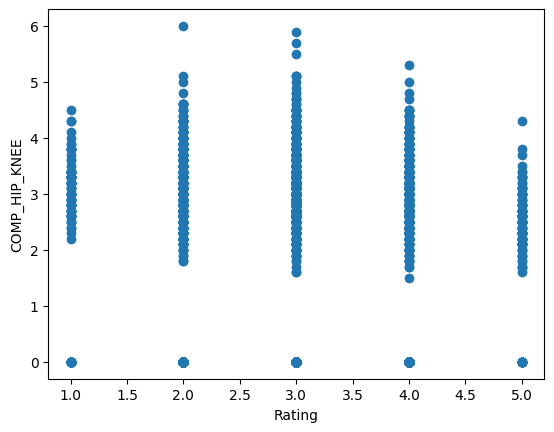

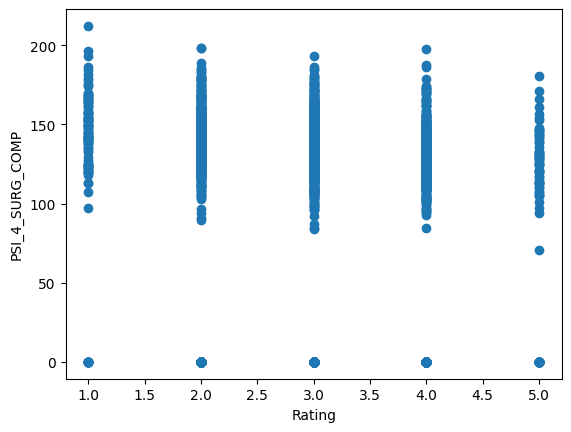

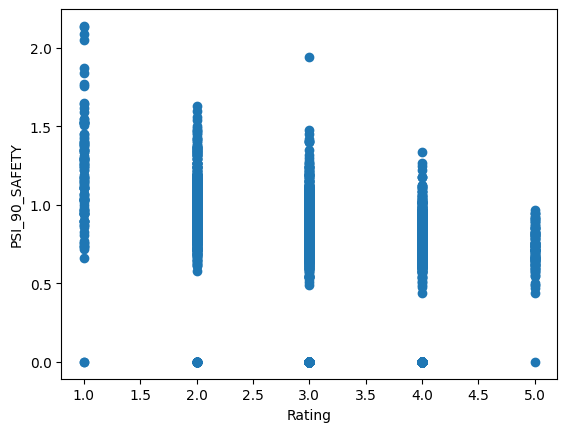

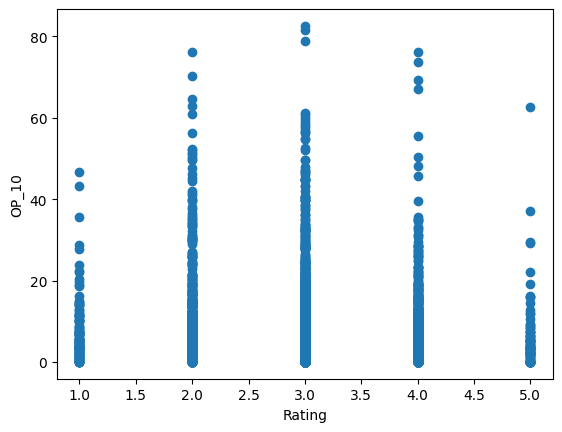

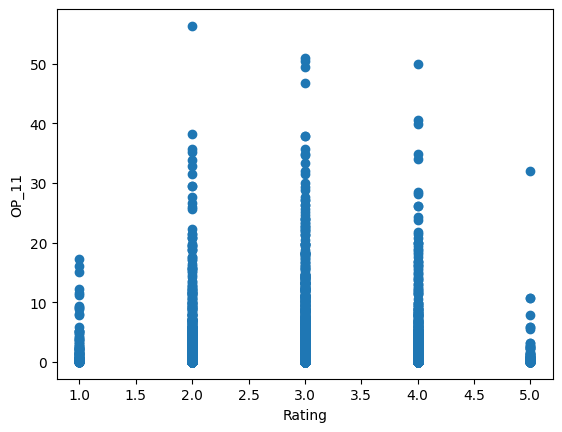

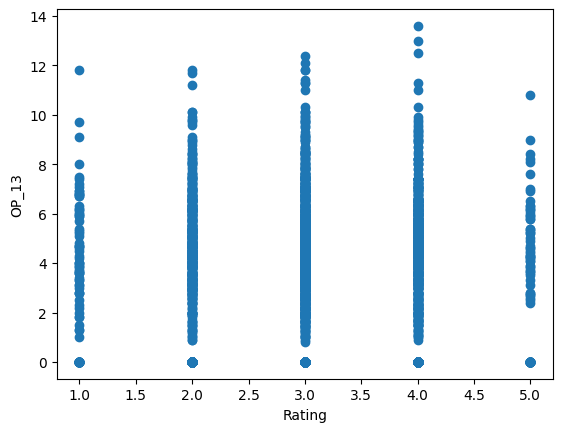

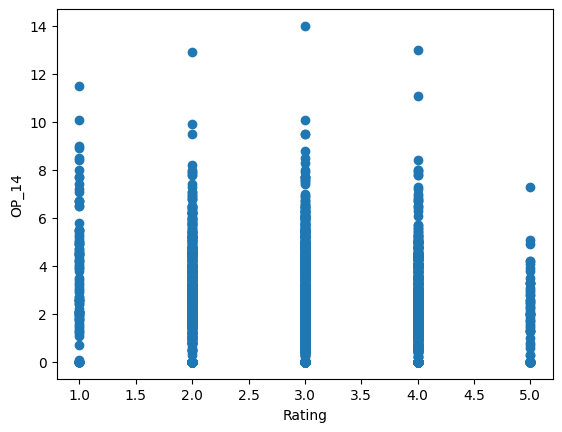

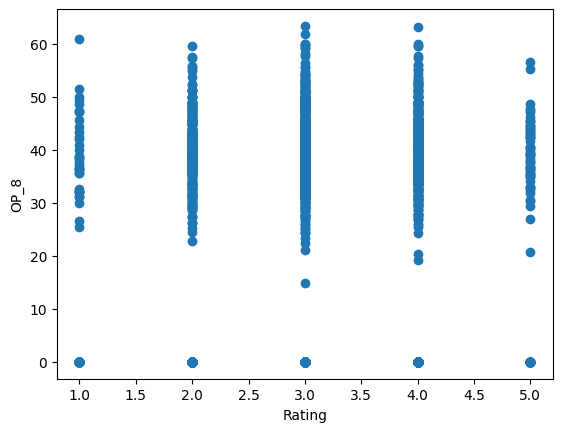

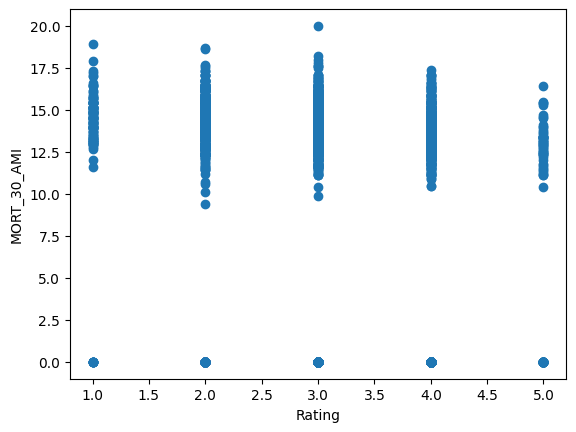

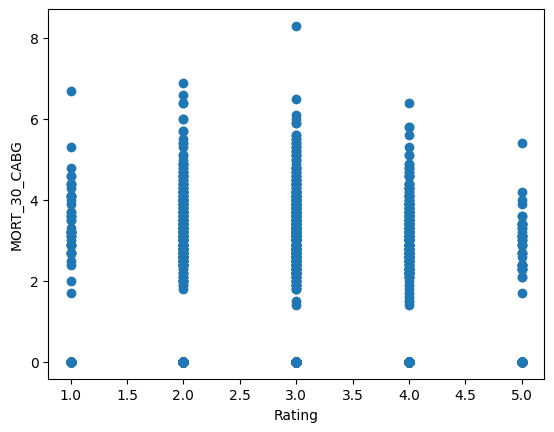

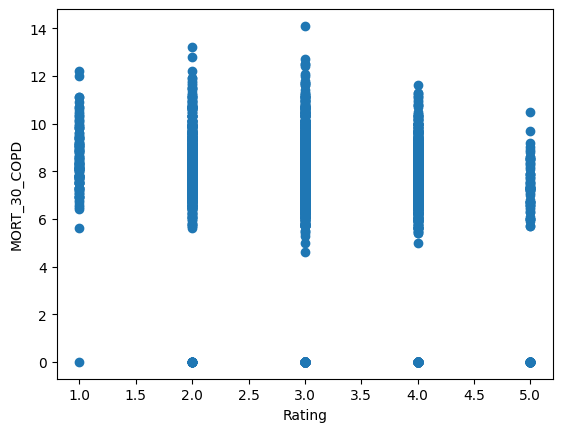

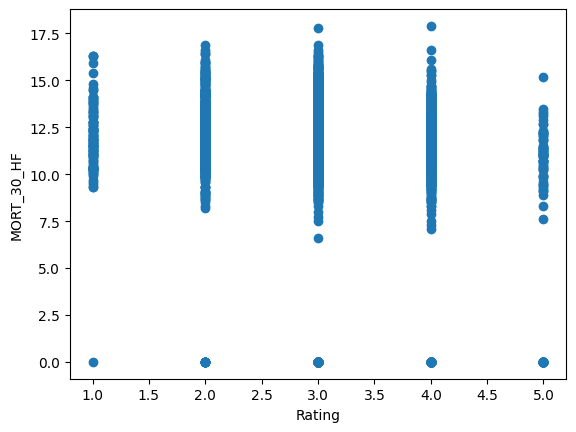

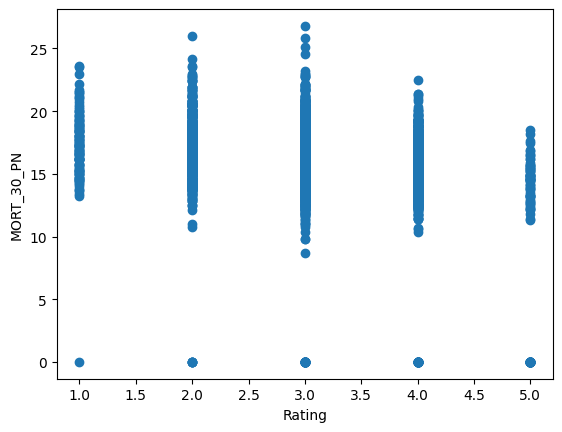

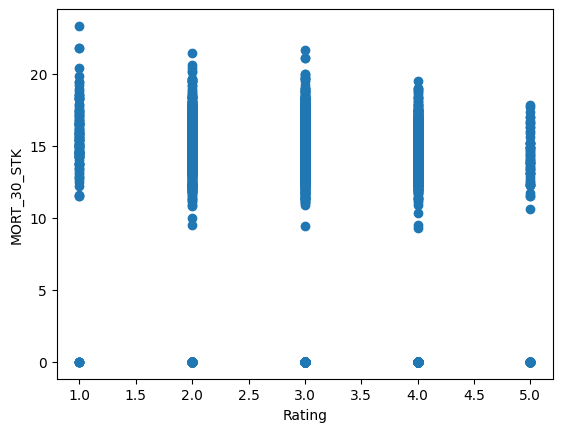

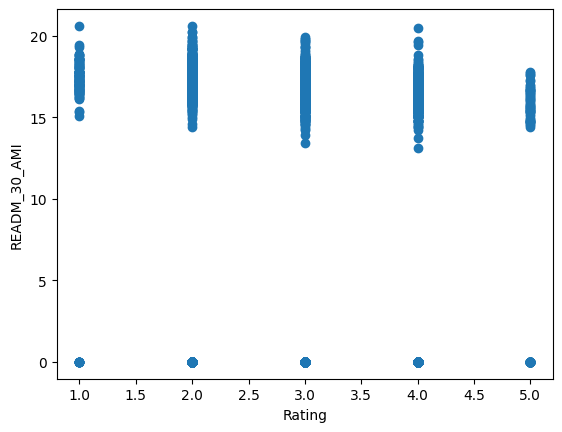

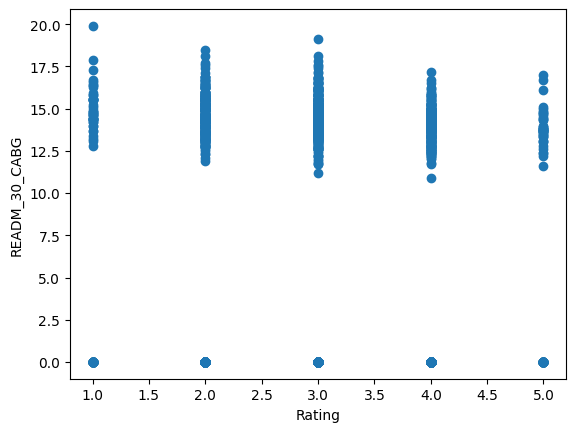

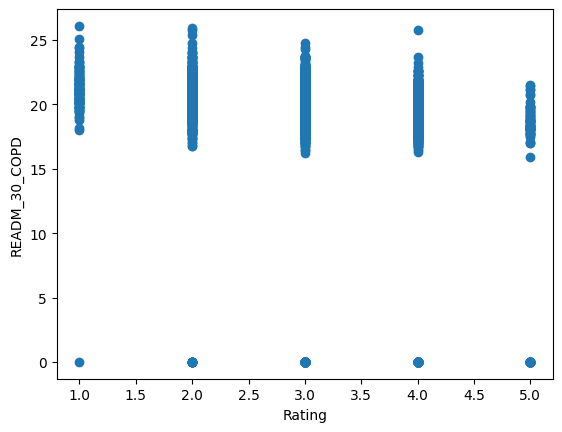

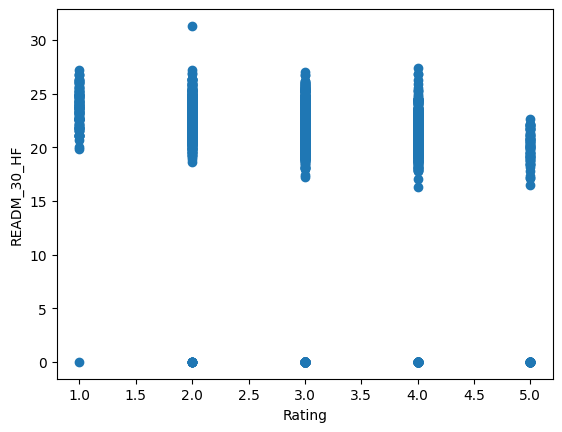

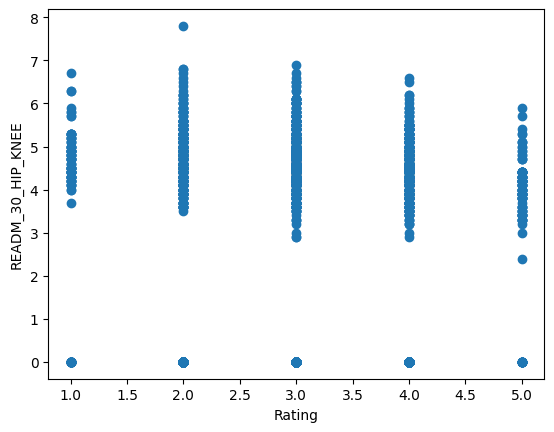

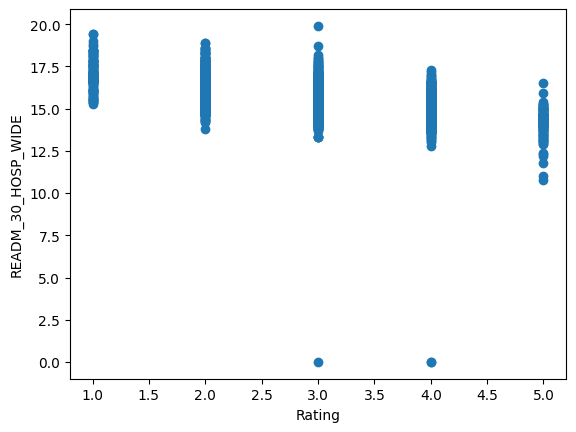

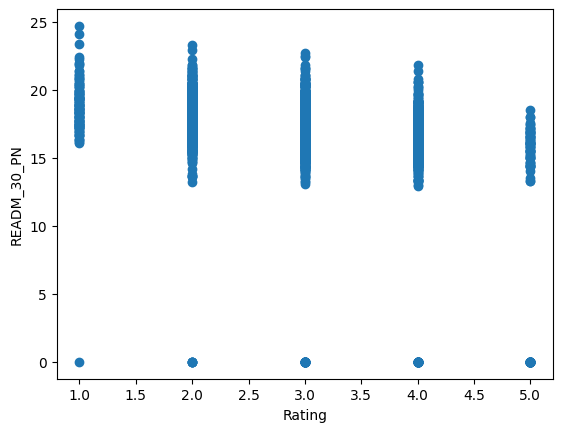

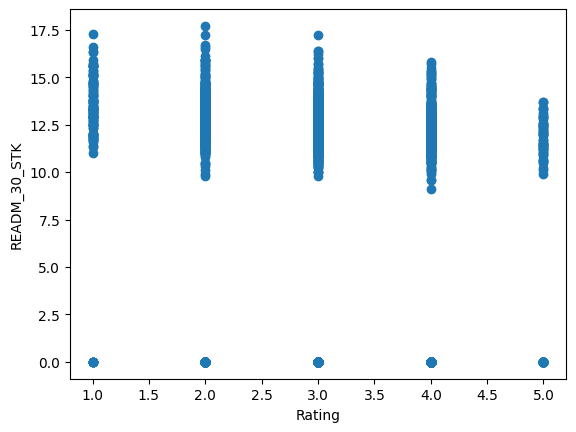

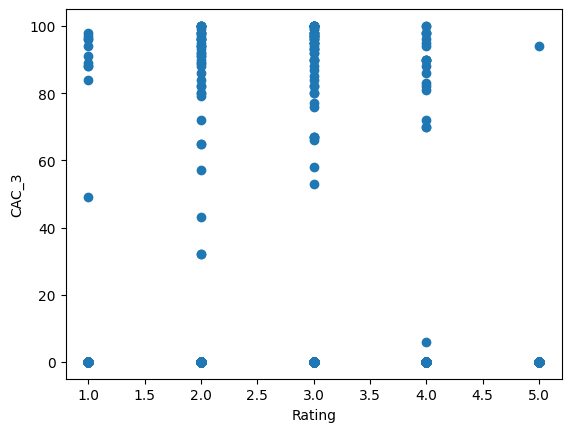

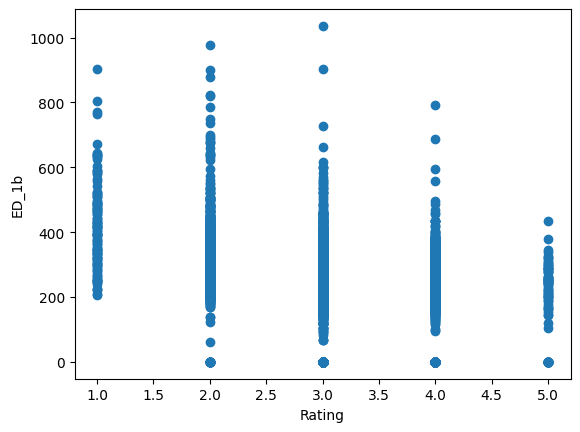

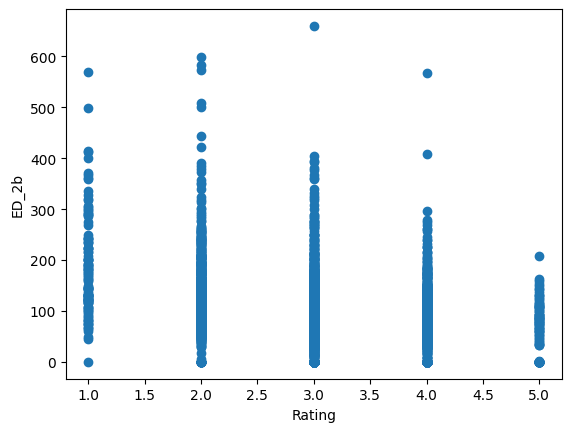

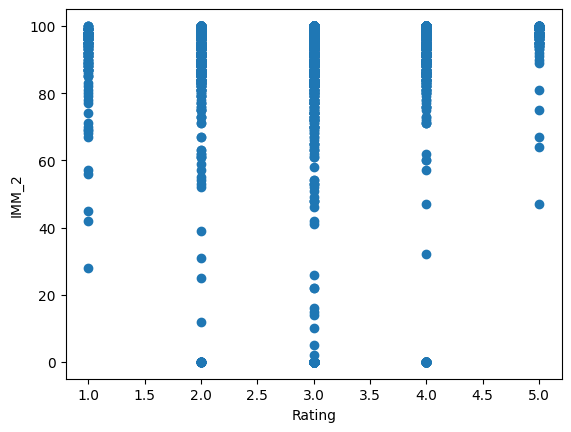

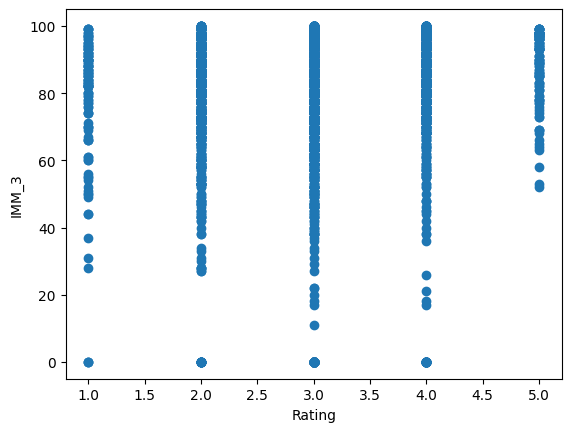

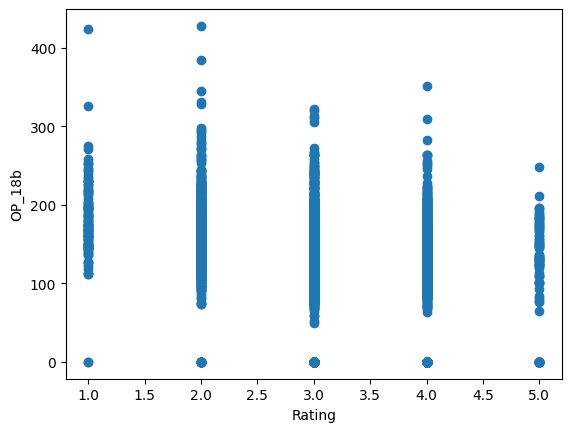

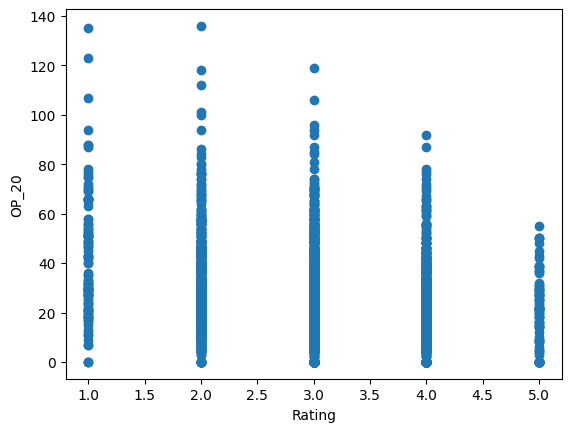

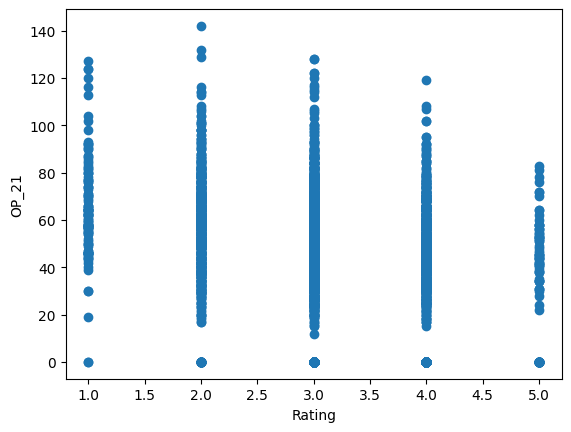

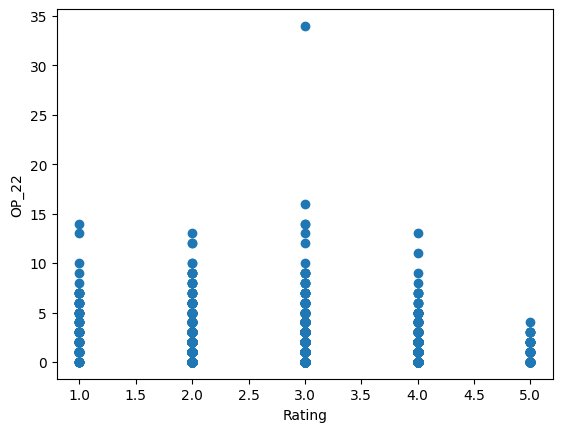

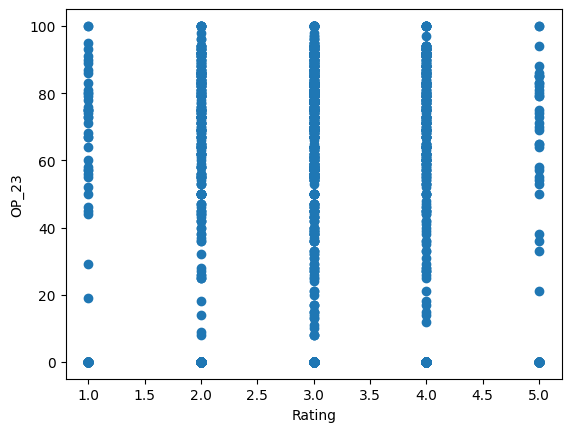

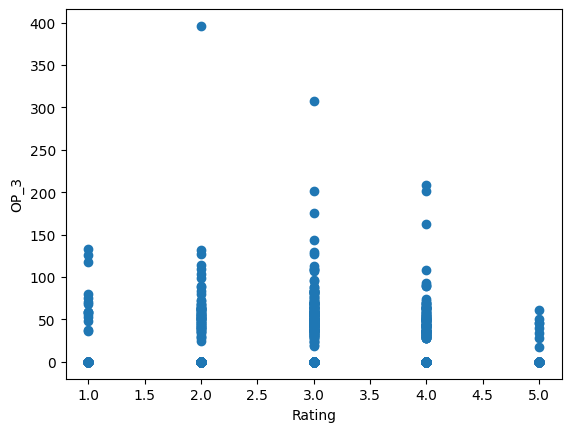

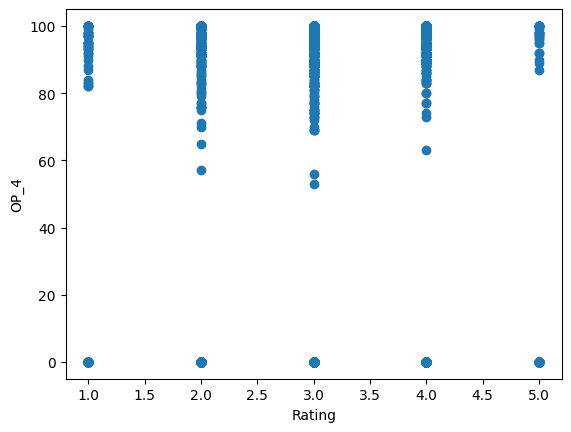

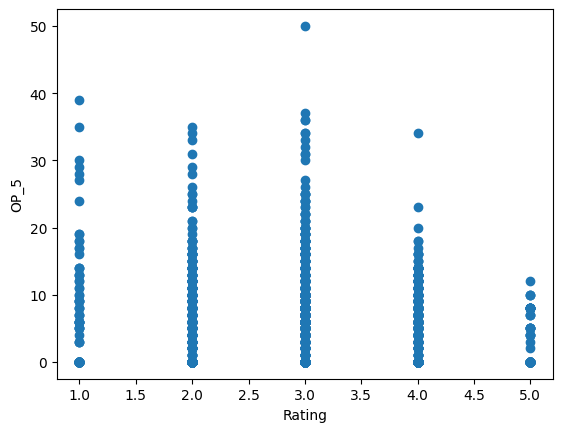

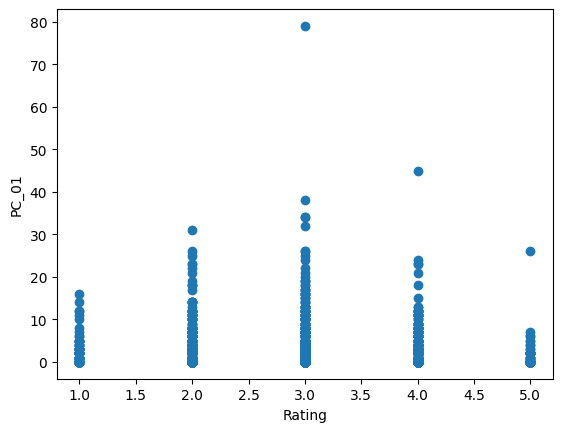

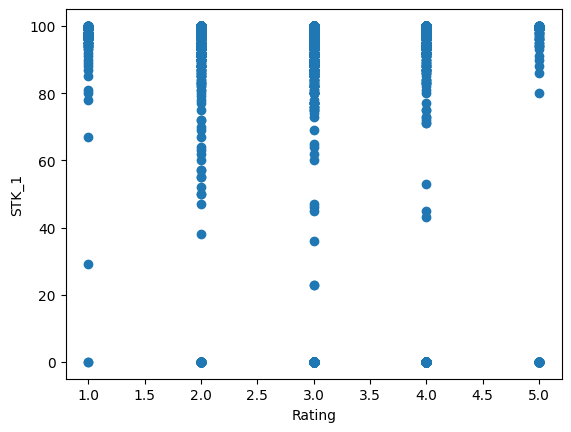

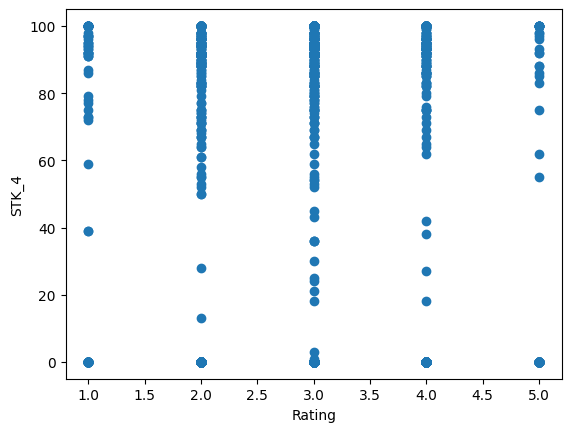

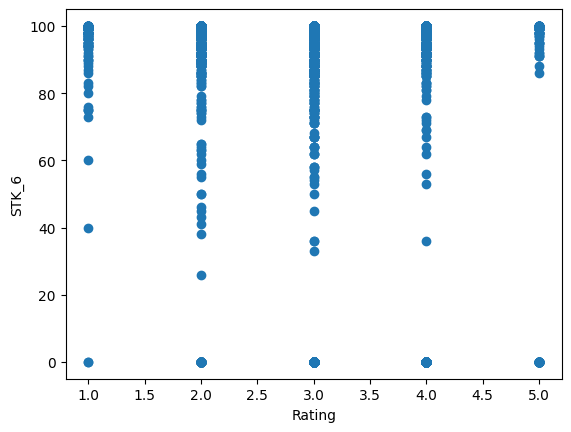

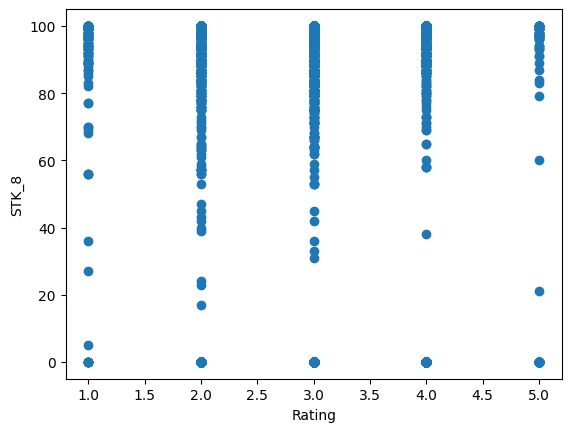

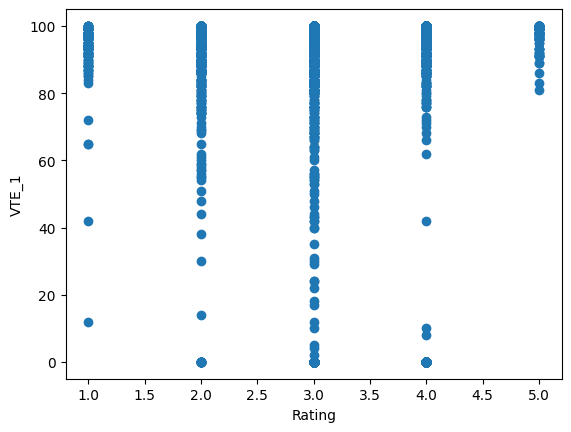

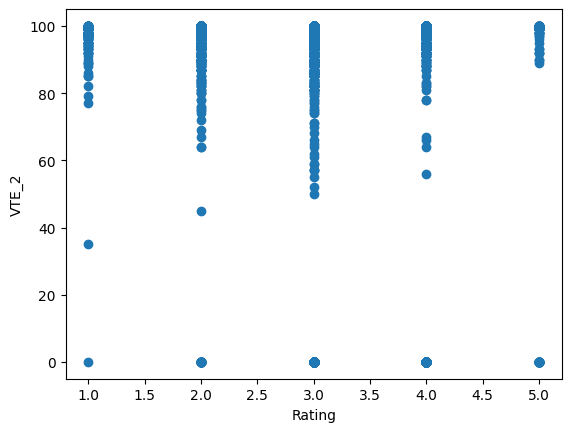

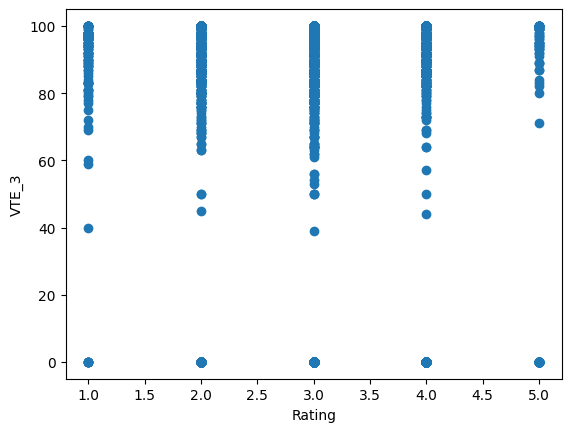

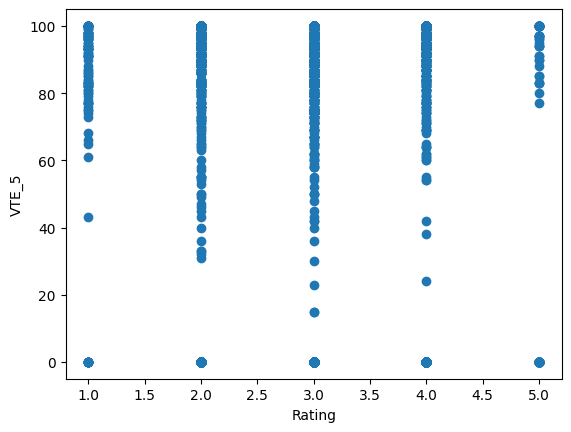

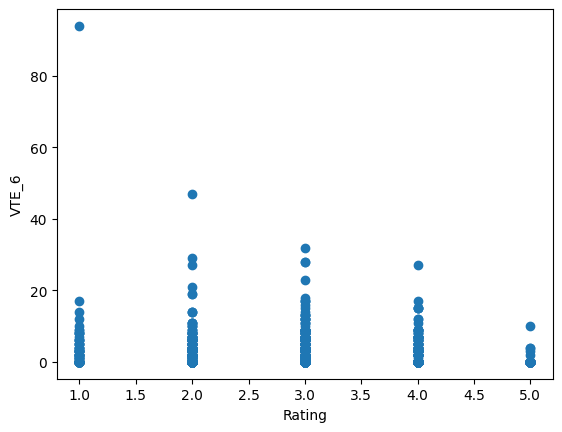

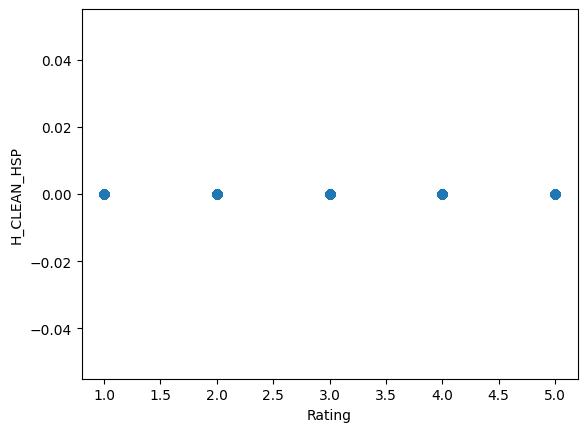

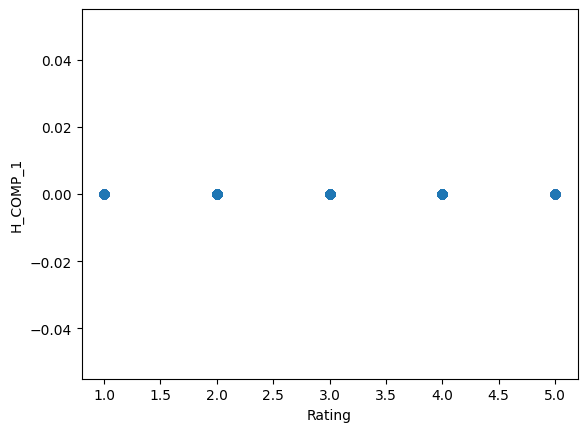

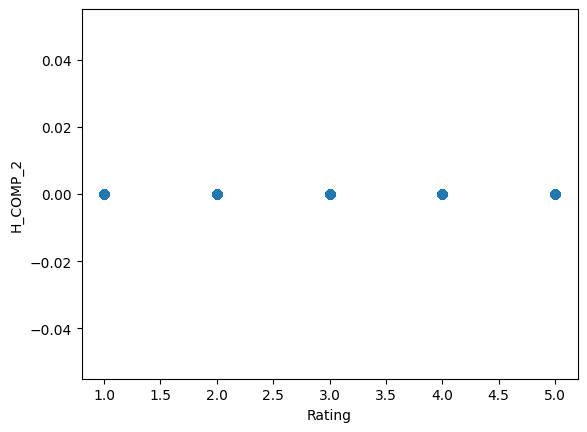

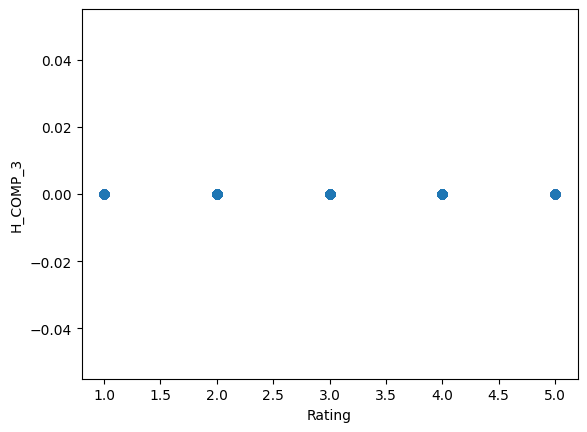

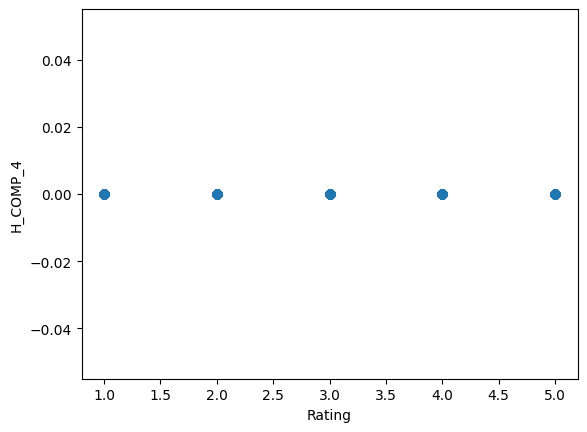

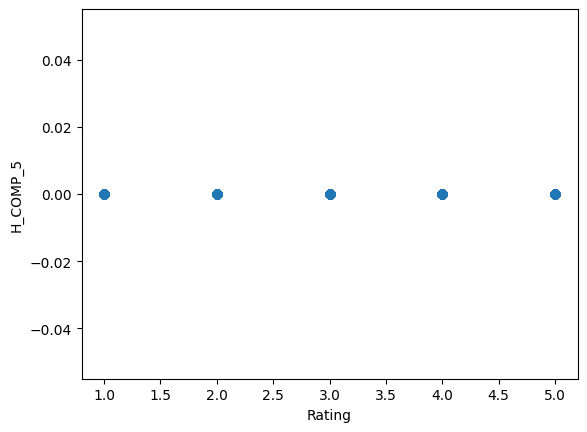

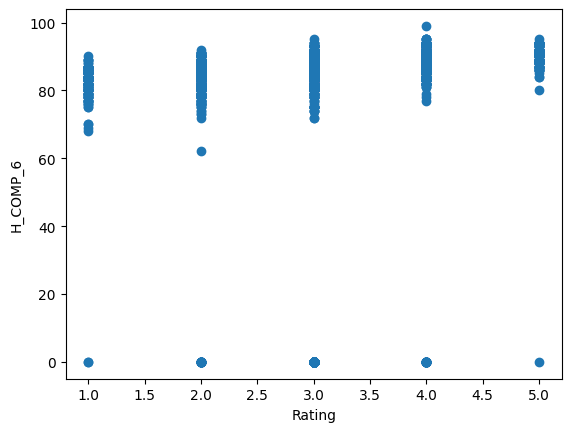

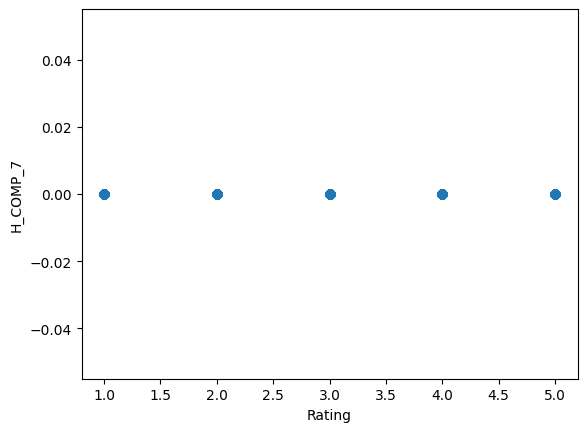

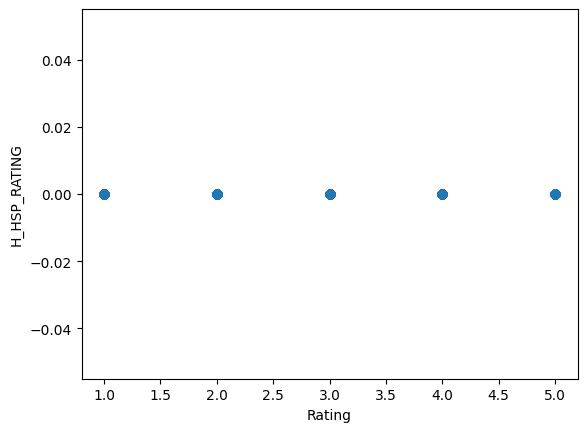

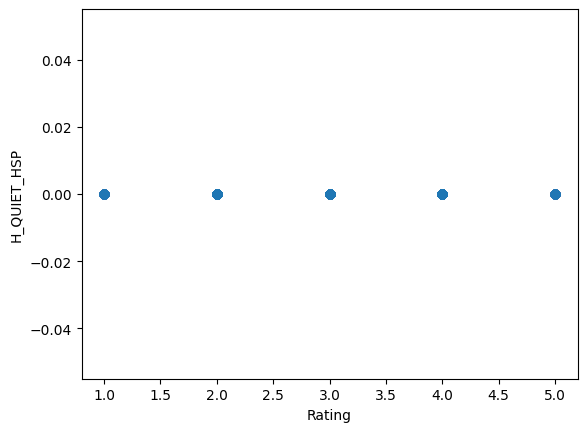

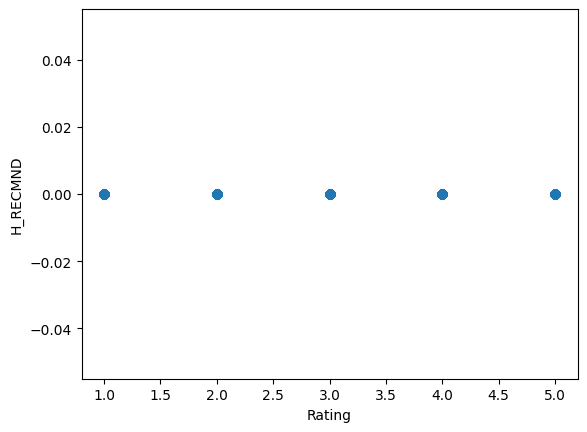

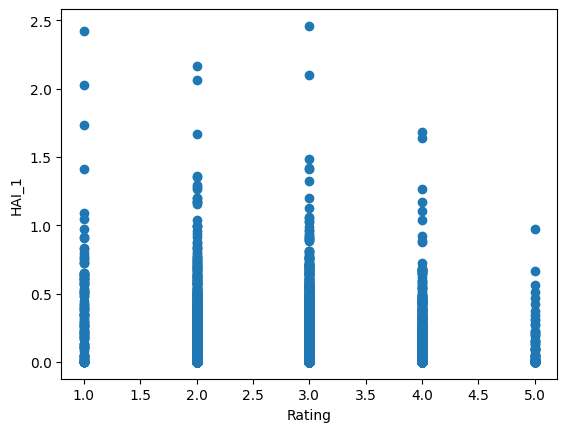

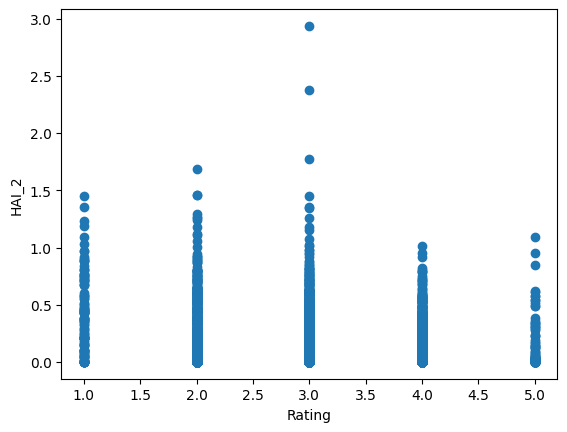

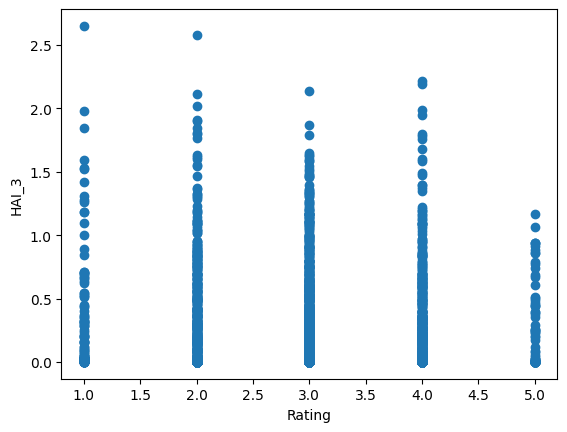

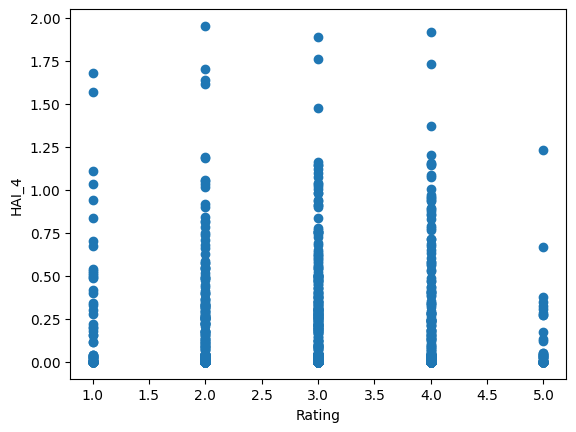

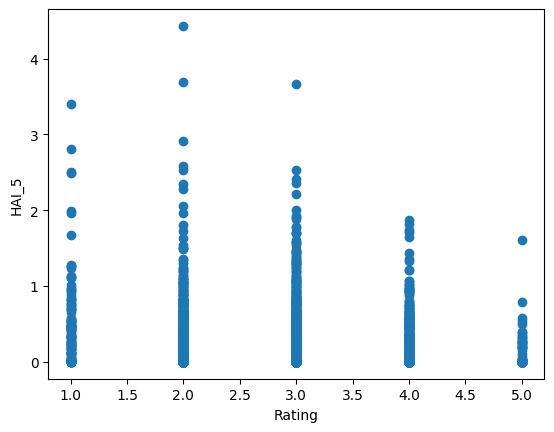

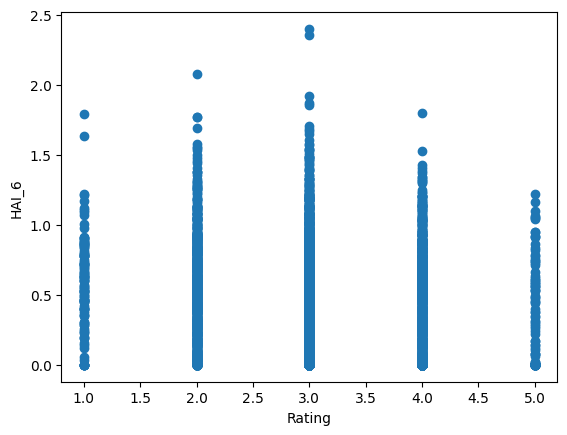

In [153]:
plt.figure()
for col in range(1, out_dataframe.shape[1]):
    plt.scatter(out_dataframe["Hospital overall rating"], out_dataframe.iloc[:, col])
    plt.xlabel("Rating")
    plt.ylabel(out_dataframe.columns[col])
    plt.show()

# Linear Regression

## Splitting the Data into Training and Testing Sets

In [154]:
#Check info of all columns
merge_IDs_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 4815
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Provider ID              3648 non-null   int64  
 1   Hospital overall rating  3648 non-null   int64  
 2   COMP_HIP_KNEE            3648 non-null   float64
 3   PSI_4_SURG_COMP          3648 non-null   float64
 4   PSI_90_SAFETY            3648 non-null   float64
 5   OP_10                    3648 non-null   float64
 6   OP_11                    3648 non-null   float64
 7   OP_13                    3648 non-null   float64
 8   OP_14                    3648 non-null   float64
 9   OP_8                     3648 non-null   float64
 10  MORT_30_AMI              3648 non-null   float64
 11  MORT_30_CABG             3648 non-null   float64
 12  MORT_30_COPD             3648 non-null   float64
 13  MORT_30_HF               3648 non-null   float64
 14  MORT_30_PN              

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
# Putting feature variable to X
X = merge_IDs_final.drop(['Hospital overall rating'], axis=1)
X.head()

Provider ID  COMP_HIP_KNEE  PSI_4_SURG_COMP  PSI_90_SAFETY  OP_10  OP_11  \
0        10001            3.8           168.26           0.68    6.4    0.9   
1        10005            3.0           179.05           0.85   13.3   10.2   
2        10006            3.8           198.33           0.91   11.8    4.6   
3        10007            0.0             0.00           0.79   24.3    6.1   
4        10008            0.0             0.00           0.90    3.6    0.0   

   OP_13  OP_14  OP_8  MORT_30_AMI  ...  H_COMP_7  H_HSP_RATING  H_QUIET_HSP  \
0    7.1    2.4  38.1         12.5  ...         0             0            0   
1    5.3    4.0  42.8         16.0  ...         0             0            0   
2    0.0    4.6  45.6         16.7  ...         0             0            0   
3    0.0    0.0   0.0          0.0  ...         0             0            0   
4    0.0    0.6   0.0          0.0  ...         0             0            0   

   H_RECMND  HAI_1  HAI_2  HAI_3  HAI_4  HAI_5  HAI_6  
0         0  1.030  0.974  0.950    0.0  0.107  0.562  
1         0  0.337  0.167  0.019    0.0  0.233  0.177  
2         0  0.138  0.373  0.016    0.0  0.401  0.309  
3         0  0.000  0.000  0.000    0.0  0.000  0.000  
4         0  0.000  0.000  0.000    0.0  0.000  0.029  

[5 rows x 63 columns]

In [157]:
# Putting response variable to y
y = merge_IDs_final['Hospital overall rating']
y.head()

0    3
1    3
2    2
3    3
4    3
Name: Hospital overall rating, dtype: int64

In [158]:
# Data splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

##  Feature Scaling

In [159]:
#Import library for Feature Scaling
from sklearn.preprocessing import StandardScaler

In [160]:
merge_IDs_final.columns

Index(['Provider ID', 'Hospital overall rating', 'COMP_HIP_KNEE',
       'PSI_4_SURG_COMP', 'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14',
       'OP_8', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_CLEAN_HSP', 'H_COMP_1',
       'H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7',
       'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3',
       'HAI_4', 'HAI_5', 'HAI_6'],
      dtype='object')

In [161]:
# Apply scaler() to all the columns 
scaler = StandardScaler()

X_train[['COMP_HIP_KNEE', 'PSI_4_SURG_COMP',\
       'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',\
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',\
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',\
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',\
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',\
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',\
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',\
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_CLEAN_HSP', 'H_COMP_1',\
       'H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7',\
       'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3',\
       'HAI_4', 'HAI_5', 'HAI_6']] = scaler.fit_transform(X_train[['COMP_HIP_KNEE', 'PSI_4_SURG_COMP',\
       'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',\
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',\
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',\
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',\
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',\
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',\
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',\
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_CLEAN_HSP', 'H_COMP_1',\
       'H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7',\
       'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3',\
       'HAI_4', 'HAI_5', 'HAI_6']])

X_train.head()

Provider ID  COMP_HIP_KNEE  PSI_4_SURG_COMP  PSI_90_SAFETY     OP_10  \
4110       450586      -1.535337        -0.980084       0.398726 -0.657105   
4025       450162      -0.281808        -0.980084       0.398726  4.578421   
4464       500015       0.832440         0.993960       0.535015 -0.475788   
3983       450042       1.459205         0.983755       0.780337 -0.079157   
119         30038       0.344956         1.144461       0.862110 -0.815757   

         OP_11     OP_13     OP_14      OP_8  MORT_30_AMI  ...  H_COMP_7  \
4110 -0.489466 -1.033674 -0.878648 -0.821473    -1.354907  ...       0.0   
4025  5.935060  1.318769 -0.878648  1.569896    -1.354907  ...       0.0   
4464 -0.286392 -0.671760  0.436797 -0.821473     0.787504  ...       0.0   
3983 -0.157163  0.848280 -0.322113  1.589659     0.861380  ...       0.0   
119  -0.083318  1.608300  0.335609 -0.821473     0.876155  ...       0.0   

      H_HSP_RATING  H_QUIET_HSP  H_RECMND     HAI_1     HAI_2     HAI_3  \
4110           0.0          0.0       0.0 -0.588893 -0.653507 -0.555375   
4025           0.0          0.0       0.0 -0.588893 -0.204022 -0.555375   
4464           0.0          0.0       0.0 -0.296446  0.054644 -0.555375   
3983           0.0          0.0       0.0  0.301350  0.436282  0.405751   
119            0.0          0.0       0.0 -0.120118  1.420059 -0.515447   

         HAI_4     HAI_5     HAI_6  
4110 -0.287619 -0.469805 -1.069947  
4025 -0.287619 -0.469805 -1.069947  
4464 -0.287619 -0.469805  1.469687  
3983 -0.287619  0.253327 -0.295230  
119  -0.287619  0.337412  1.066937  

[5 rows x 63 columns]

## Model Building

### RFE

In [162]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [163]:
# Running RFE with the output number of the variable equal to 25
linear_m = LinearRegression()
linear_m.fit(X_train, y_train)
# running RFE
rfe = RFE(estimator=linear_m, n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [164]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Provider ID', False, 29),
 ('COMP_HIP_KNEE', True, 1),
 ('PSI_4_SURG_COMP', True, 1),
 ('PSI_90_SAFETY', True, 1),
 ('OP_10', True, 1),
 ('OP_11', False, 27),
 ('OP_13', True, 1),
 ('OP_14', False, 11),
 ('OP_8', True, 1),
 ('MORT_30_AMI', True, 1),
 ('MORT_30_CABG', True, 1),
 ('MORT_30_COPD', True, 1),
 ('MORT_30_HF', True, 1),
 ('MORT_30_PN', True, 1),
 ('MORT_30_STK', True, 1),
 ('READM_30_AMI', False, 13),
 ('READM_30_CABG', True, 1),
 ('READM_30_COPD', True, 1),
 ('READM_30_HF', True, 1),
 ('READM_30_HIP_KNEE', True, 1),
 ('READM_30_HOSP_WIDE', True, 1),
 ('READM_30_PN', False, 5),
 ('READM_30_STK', True, 1),
 ('CAC_3', False, 25),
 ('ED_1b', True, 1),
 ('ED_2b', False, 4),
 ('IMM_2', True, 1),
 ('IMM_3', True, 1),
 ('OP_18b', False, 2),
 ('OP_20', False, 3),
 ('OP_21', False, 14),
 ('OP_22', False, 17),
 ('OP_23', False, 26),
 ('OP_3', False, 19),
 ('OP_4', False, 7),
 ('OP_5', False, 8),
 ('PC_01', False, 23),
 ('STK_1', True, 1),
 ('STK_4', False, 12),
 ('STK_6', False, 9),

In [165]:
col = X_train.columns[rfe.support_]
col

Index(['COMP_HIP_KNEE', 'PSI_4_SURG_COMP', 'PSI_90_SAFETY', 'OP_10', 'OP_13',
       'OP_8', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_CABG', 'READM_30_COPD',
       'READM_30_HF', 'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE',
       'READM_30_STK', 'ED_1b', 'IMM_2', 'IMM_3', 'STK_1', 'VTE_1', 'H_COMP_6',
       'HAI_1'],
      dtype='object')

In [166]:
X_train.columns[~rfe.support_]

Index(['Provider ID', 'OP_11', 'OP_14', 'READM_30_AMI', 'READM_30_PN', 'CAC_3',
       'ED_2b', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23', 'OP_3', 'OP_4',
       'OP_5', 'PC_01', 'STK_4', 'STK_6', 'STK_8', 'VTE_2', 'VTE_3', 'VTE_5',
       'VTE_6', 'H_CLEAN_HSP', 'H_COMP_1', 'H_COMP_2', 'H_COMP_3', 'H_COMP_4',
       'H_COMP_5', 'H_COMP_7', 'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND',
       'HAI_2', 'HAI_3', 'HAI_4', 'HAI_5', 'HAI_6'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [167]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [168]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [169]:
# Running the linear model
linear_m= sm.OLS(y_train,X_train_rfe).fit()

In [170]:
linear_m.params

const                 3.090873
COMP_HIP_KNEE        -0.054287
PSI_4_SURG_COMP      -0.042234
PSI_90_SAFETY        -0.353505
OP_10                -0.055120
OP_13                 0.050864
OP_8                  0.061677
MORT_30_AMI          -0.045727
MORT_30_CABG         -0.060559
MORT_30_COPD         -0.116079
MORT_30_HF           -0.069967
MORT_30_PN           -0.171754
MORT_30_STK          -0.085465
READM_30_CABG         0.118246
READM_30_COPD         0.128557
READM_30_HF           0.066834
READM_30_HIP_KNEE     0.082357
READM_30_HOSP_WIDE   -0.359676
READM_30_STK          0.061899
ED_1b                -0.174953
IMM_2                 0.118374
IMM_3                 0.067576
STK_1                 0.050913
VTE_1                 0.082226
H_COMP_6              0.103778
HAI_1                -0.067253
dtype: float64

In [171]:
#Summary of our linear model
linear_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.549
Model:                                 OLS   Adj. R-squared:                  0.545
Method:                      Least Squares   F-statistic:                     123.1
Date:                     Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                             16:56:34   Log-Likelihood:                -2117.0
No. Observations:                     2553   AIC:                             4286.
Df Residuals:                         2527   BIC:                             4438.
Df Model:                               25                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    280.222      0.000       3.069       3.113
COMP_HIP_KNEE         -0.0543      0.030     -1.822      0.069      -0.113       0.004
PSI_4_SURG_COMP       -0.0422      0.018     -2.393      0.017      -0.077      -0.008
PSI_90_SAFETY         -0.3535      0.015    -22.836      0.000      -0.384      -0.323
OP_10                 -0.0551      0.011     -4.893      0.000      -0.077      -0.033
OP_13                  0.0509      0.013      3.897      0.000       0.025       0.076
OP_8                   0.0617      0.013      4.841      0.000       0.037       0.087
MORT_30_AMI           -0.0457      0.018     -2.492      0.013      -0.082      -0.010
MORT_30_CABG          -0.0606      0.037     -1.647      0.100      -0.133       0.012
MORT_30_COPD          -0.1161      0.021     -5.594      0.000      -0.157      -0.075
MORT_30_HF            -0.0700      0.021     -3.278      0.001      -0.112      -0.028
MORT_30_PN            -0.1718      0.015    -11.286      0.000      -0.202      -0.142
MORT_30_STK           -0.0855      0.029     -2.957      0.003      -0.142      -0.029
READM_30_CABG          0.1182      0.037      3.166      0.002       0.045       0.191
READM_30_COPD          0.1286      0.021      6.039      0.000       0.087       0.170
READM_30_HF            0.0668      0.022      3.098      0.002       0.025       0.109
READM_30_HIP_KNEE      0.0824      0.030      2.724      0.007       0.023       0.142
READM_30_HOSP_WIDE    -0.3597      0.013    -28.741      0.000      -0.384      -0.335
READM_30_STK           0.0619      0.031      1.985      0.047       0.001       0.123
ED_1b                 -0.1750      0.015    -11.549      0.000      -0.205      -0.145
IMM_2                  0.1184      0.016      7.504      0.000       0.087       0.149
IMM_3                  0.0676      0.012      5.674      0.000       0.044       0.091
STK_1                  0.0509      0.020      2.532      0.011       0.011       0.090
VTE_1                  0.0822      0.017      4.963      0.000       0.050       0.115
H_COMP_6               0.1038      0.013      8.005      0.000       0.078       0.129
HAI_1                 -0.0673      0.013     -5.122      0.000      -0.093      -0.042
==============================================================================
Omnibus:                      898.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16239.085
Skew:                          -1.192   Prob(JB):                         0.00
Kurtosis:                      15.123   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors ass

In [172]:
#Let's Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
13       READM_30_CABG  11.47
8         MORT_30_CABG  11.11
18        READM_30_STK   7.99
16   READM_30_HIP_KNEE   7.52
1        COMP_HIP_KNEE   7.30
12         MORT_30_STK   6.87
15         READM_30_HF   3.83
10          MORT_30_HF   3.74
14       READM_30_COPD   3.72
9         MORT_30_COPD   3.54
22               STK_1   3.32
7          MORT_30_AMI   2.77
2      PSI_4_SURG_COMP   2.56
23               VTE_1   2.26
20               IMM_2   2.05
3        PSI_90_SAFETY   1.97
11          MORT_30_PN   1.90
19               ED_1b   1.89
25               HAI_1   1.42
5                OP_13   1.40
24            H_COMP_6   1.38
6                 OP_8   1.33
17  READM_30_HOSP_WIDE   1.29
21               IMM_3   1.17
4                OP_10   1.04
0                const   1.00

#### Removing variables manually for model

Adj. R-square is 54.5% . 'READM_30_CABG' seems to have high VIF and 'MORT_30_CABG' has high p-values. But going with VIF values. So removing 'READM_30_CABG':

In [173]:
#Dropping the column "READM_30_CABG"
X_train_new = X_train_rfe.drop(["READM_30_CABG"], axis = 1)

In [174]:
# Adding a constant variable 
X_train_new_1 = sm.add_constant(X_train_new)

In [175]:
# Running the linear model
linear_m_1 = sm.OLS(y_train,X_train_new_1).fit()   

In [176]:
linear_m_1.params

const                 3.090873
COMP_HIP_KNEE        -0.051094
PSI_4_SURG_COMP      -0.036720
PSI_90_SAFETY        -0.352826
OP_10                -0.055770
OP_13                 0.053873
OP_8                  0.061769
MORT_30_AMI          -0.047818
MORT_30_CABG          0.046840
MORT_30_COPD         -0.118668
MORT_30_HF           -0.071233
MORT_30_PN           -0.174730
MORT_30_STK          -0.087655
READM_30_COPD         0.131982
READM_30_HF           0.067965
READM_30_HIP_KNEE     0.080979
READM_30_HOSP_WIDE   -0.359762
READM_30_STK          0.065824
ED_1b                -0.171959
IMM_2                 0.117350
IMM_3                 0.067213
STK_1                 0.050371
VTE_1                 0.081297
H_COMP_6              0.103115
HAI_1                -0.065388
dtype: float64

In [177]:
#Let's check the summary of our linear model
linear_m_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.547
Model:                                 OLS   Adj. R-squared:                  0.543
Method:                      Least Squares   F-statistic:                     127.4
Date:                     Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                             16:56:35   Log-Likelihood:                -2122.0
No. Observations:                     2553   AIC:                             4294.
Df Residuals:                         2528   BIC:                             4440.
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    279.723      0.000       3.069       3.113
COMP_HIP_KNEE         -0.0511      0.030     -1.713      0.087      -0.110       0.007
PSI_4_SURG_COMP       -0.0367      0.018     -2.087      0.037      -0.071      -0.002
PSI_90_SAFETY         -0.3528      0.016    -22.754      0.000      -0.383      -0.322
OP_10                 -0.0558      0.011     -4.942      0.000      -0.078      -0.034
OP_13                  0.0539      0.013      4.131      0.000       0.028       0.079
OP_8                   0.0618      0.013      4.839      0.000       0.037       0.087
MORT_30_AMI           -0.0478      0.018     -2.603      0.009      -0.084      -0.012
MORT_30_CABG           0.0468      0.014      3.297      0.001       0.019       0.075
MORT_30_COPD          -0.1187      0.021     -5.713      0.000      -0.159      -0.078
MORT_30_HF            -0.0712      0.021     -3.332      0.001      -0.113      -0.029
MORT_30_PN            -0.1747      0.015    -11.483      0.000      -0.205      -0.145
MORT_30_STK           -0.0877      0.029     -3.028      0.002      -0.144      -0.031
READM_30_COPD          0.1320      0.021      6.197      0.000       0.090       0.174
READM_30_HF            0.0680      0.022      3.145      0.002       0.026       0.110
READM_30_HIP_KNEE      0.0810      0.030      2.673      0.008       0.022       0.140
READM_30_HOSP_WIDE    -0.3598      0.013    -28.696      0.000      -0.384      -0.335
READM_30_STK           0.0658      0.031      2.109      0.035       0.005       0.127
ED_1b                 -0.1720      0.015    -11.353      0.000      -0.202      -0.142
IMM_2                  0.1173      0.016      7.427      0.000       0.086       0.148
IMM_3                  0.0672      0.012      5.634      0.000       0.044       0.091
STK_1                  0.0504      0.020      2.501      0.012       0.011       0.090
VTE_1                  0.0813      0.017      4.899      0.000       0.049       0.114
H_COMP_6               0.1031      0.013      7.941      0.000       0.078       0.129
HAI_1                 -0.0654      0.013     -4.976      0.000      -0.091      -0.040
==============================================================================
Omnibus:                      894.801   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16075.867
Skew:                          -1.186   Prob(JB):                         0.00
Kurtosis:                      15.062   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
# Check the VIF values for the new model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
17        READM_30_STK  7.98
15   READM_30_HIP_KNEE  7.51
1        COMP_HIP_KNEE  7.29
12         MORT_30_STK  6.86
14         READM_30_HF  3.83
10          MORT_30_HF  3.74
13       READM_30_COPD  3.71
9         MORT_30_COPD  3.53
21               STK_1  3.32
7          MORT_30_AMI  2.77
2      PSI_4_SURG_COMP  2.53
22               VTE_1  2.26
19               IMM_2  2.04
3        PSI_90_SAFETY  1.97
11          MORT_30_PN  1.90
18               ED_1b  1.88
8         MORT_30_CABG  1.65
24               HAI_1  1.41
5                OP_13  1.39
23            H_COMP_6  1.38
6                 OP_8  1.33
16  READM_30_HOSP_WIDE  1.29
20               IMM_3  1.17
4                OP_10  1.04
0                const  1.00

Adj. R-square is 54.3% (not much change). 'READM_30_STK' seems to have high VIF and 'COMP_HIP_KNEE' has high p-values. But going with VIF values. So removing 'READM_30_STK':

In [179]:
#Dropping the column "READM_30_STK"
X_train_new_1 = X_train_new_1.drop(["READM_30_STK"], axis = 1)

In [180]:
# Adding a constant variable  
X_train_new_1 = sm.add_constant(X_train_new_1)

In [181]:
# Running the linear model
linear_m_2 = sm.OLS(y_train,X_train_new_1).fit()   

In [182]:
linear_m_2.params

const                 3.090873
COMP_HIP_KNEE        -0.053921
PSI_4_SURG_COMP      -0.034518
PSI_90_SAFETY        -0.351996
OP_10                -0.054978
OP_13                 0.055038
OP_8                  0.063145
MORT_30_AMI          -0.042423
MORT_30_CABG          0.046545
MORT_30_COPD         -0.120512
MORT_30_HF           -0.075665
MORT_30_PN           -0.177104
MORT_30_STK          -0.040985
READM_30_COPD         0.135139
READM_30_HF           0.072969
READM_30_HIP_KNEE     0.085373
READM_30_HOSP_WIDE   -0.356720
ED_1b                -0.170244
IMM_2                 0.117837
IMM_3                 0.065858
STK_1                 0.059389
VTE_1                 0.078175
H_COMP_6              0.103716
HAI_1                -0.065201
dtype: float64

In [183]:
#Let's see the summary of our linear model
linear_m_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.547
Model:                                 OLS   Adj. R-squared:                  0.542
Method:                      Least Squares   F-statistic:                     132.5
Date:                     Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                             16:56:36   Log-Likelihood:                -2124.3
No. Observations:                     2553   AIC:                             4297.
Df Residuals:                         2529   BIC:                             4437.
Df Model:                               23                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    279.533      0.000       3.069       3.113
COMP_HIP_KNEE         -0.0539      0.030     -1.808      0.071      -0.112       0.005
PSI_4_SURG_COMP       -0.0345      0.018     -1.964      0.050      -0.069   -5.81e-05
PSI_90_SAFETY         -0.3520      0.016    -22.693      0.000      -0.382      -0.322
OP_10                 -0.0550      0.011     -4.872      0.000      -0.077      -0.033
OP_13                  0.0550      0.013      4.221      0.000       0.029       0.081
OP_8                   0.0631      0.013      4.950      0.000       0.038       0.088
MORT_30_AMI           -0.0424      0.018     -2.330      0.020      -0.078      -0.007
MORT_30_CABG           0.0465      0.014      3.274      0.001       0.019       0.074
MORT_30_COPD          -0.1205      0.021     -5.803      0.000      -0.161      -0.080
MORT_30_HF            -0.0757      0.021     -3.554      0.000      -0.117      -0.034
MORT_30_PN            -0.1771      0.015    -11.663      0.000      -0.207      -0.147
MORT_30_STK           -0.0410      0.019     -2.194      0.028      -0.078      -0.004
READM_30_COPD          0.1351      0.021      6.357      0.000       0.093       0.177
READM_30_HF            0.0730      0.021      3.395      0.001       0.031       0.115
READM_30_HIP_KNEE      0.0854      0.030      2.823      0.005       0.026       0.145
READM_30_HOSP_WIDE    -0.3567      0.012    -28.624      0.000      -0.381      -0.332
ED_1b                 -0.1702      0.015    -11.248      0.000      -0.200      -0.141
IMM_2                  0.1178      0.016      7.454      0.000       0.087       0.149
IMM_3                  0.0659      0.012      5.525      0.000       0.042       0.089
STK_1                  0.0594      0.020      3.015      0.003       0.021       0.098
VTE_1                  0.0782      0.017      4.726      0.000       0.046       0.111
H_COMP_6               0.1037      0.013      7.984      0.000       0.078       0.129
HAI_1                 -0.0652      0.013     -4.959      0.000      -0.091      -0.039
==============================================================================
Omnibus:                      871.518   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14914.458
Skew:                          -1.158   Prob(JB):                         0.00
Kurtosis:                      14.612   Cond. No.                         9.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
# Check the VIF values for the new model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
15   READM_30_HIP_KNEE  7.48
1        COMP_HIP_KNEE  7.27
14         READM_30_HF  3.78
10          MORT_30_HF  3.71
13       READM_30_COPD  3.70
9         MORT_30_COPD  3.53
20               STK_1  3.17
12         MORT_30_STK  2.85
7          MORT_30_AMI  2.71
2      PSI_4_SURG_COMP  2.53
21               VTE_1  2.24
18               IMM_2  2.04
3        PSI_90_SAFETY  1.97
11          MORT_30_PN  1.89
17               ED_1b  1.87
8         MORT_30_CABG  1.65
23               HAI_1  1.41
5                OP_13  1.39
22            H_COMP_6  1.38
6                 OP_8  1.33
16  READM_30_HOSP_WIDE  1.27
19               IMM_3  1.16
4                OP_10  1.04
0                const  1.00

Adj. R-square is 54.2% (not much change). 'READM_30_HIP_KNEE' seems to have high VIF and 'COMP_HIP_KNEE' has high p-values. But going with VIF values. So removing 'READM_30_HIP_KNEE':

In [185]:
#Dropping the column "READM_30_HIP_KNEE"
X_train_new_2 = X_train_new_1.drop(["READM_30_HIP_KNEE"], axis = 1)

In [186]:
# Adding a constant variable  
X_train_new_2 = sm.add_constant(X_train_new_2)

In [187]:
# Running the linear model
linear_m_3 = sm.OLS(y_train,X_train_new_2).fit()   

In [188]:
linear_m_3.params

const                 3.090873
COMP_HIP_KNEE         0.020840
PSI_4_SURG_COMP      -0.031523
PSI_90_SAFETY        -0.353499
OP_10                -0.055475
OP_13                 0.055986
OP_8                  0.063268
MORT_30_AMI          -0.040210
MORT_30_CABG          0.048489
MORT_30_COPD         -0.119617
MORT_30_HF           -0.077006
MORT_30_PN           -0.177113
MORT_30_STK          -0.038440
READM_30_COPD         0.132486
READM_30_HF           0.072927
READM_30_HOSP_WIDE   -0.354123
ED_1b                -0.171624
IMM_2                 0.118000
IMM_3                 0.065632
STK_1                 0.058248
VTE_1                 0.080020
H_COMP_6              0.106223
HAI_1                -0.065049
dtype: float64

In [189]:
#Let's check the summary of our linear model
linear_m_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.545
Model:                                 OLS   Adj. R-squared:                  0.541
Method:                      Least Squares   F-statistic:                     137.8
Date:                     Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                             16:56:37   Log-Likelihood:                -2128.3
No. Observations:                     2553   AIC:                             4303.
Df Residuals:                         2530   BIC:                             4437.
Df Model:                               22                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    279.148      0.000       3.069       3.113
COMP_HIP_KNEE          0.0208      0.014      1.517      0.129      -0.006       0.048
PSI_4_SURG_COMP       -0.0315      0.018     -1.795      0.073      -0.066       0.003
PSI_90_SAFETY         -0.3535      0.016    -22.771      0.000      -0.384      -0.323
OP_10                 -0.0555      0.011     -4.910      0.000      -0.078      -0.033
OP_13                  0.0560      0.013      4.289      0.000       0.030       0.082
OP_8                   0.0633      0.013      4.953      0.000       0.038       0.088
MORT_30_AMI           -0.0402      0.018     -2.207      0.027      -0.076      -0.004
MORT_30_CABG           0.0485      0.014      3.410      0.001       0.021       0.076
MORT_30_COPD          -0.1196      0.021     -5.753      0.000      -0.160      -0.079
MORT_30_HF            -0.0770      0.021     -3.613      0.000      -0.119      -0.035
MORT_30_PN            -0.1771      0.015    -11.648      0.000      -0.207      -0.147
MORT_30_STK           -0.0384      0.019     -2.058      0.040      -0.075      -0.002
READM_30_COPD          0.1325      0.021      6.230      0.000       0.091       0.174
READM_30_HF            0.0729      0.022      3.388      0.001       0.031       0.115
READM_30_HOSP_WIDE    -0.3541      0.012    -28.455      0.000      -0.379      -0.330
ED_1b                 -0.1716      0.015    -11.330      0.000      -0.201      -0.142
IMM_2                  0.1180      0.016      7.454      0.000       0.087       0.149
IMM_3                  0.0656      0.012      5.498      0.000       0.042       0.089
STK_1                  0.0582      0.020      2.954      0.003       0.020       0.097
VTE_1                  0.0800      0.017      4.835      0.000       0.048       0.112
H_COMP_6               0.1062      0.013      8.184      0.000       0.081       0.132
HAI_1                 -0.0650      0.013     -4.941      0.000      -0.091      -0.039
==============================================================================
Omnibus:                      859.290   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14421.786
Skew:                          -1.141   Prob(JB):                         0.00
Kurtosis:                      14.418   Cond. No.                         7.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
# Calculating the VIF values for the new model
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
14         READM_30_HF  3.78
10          MORT_30_HF  3.70
13       READM_30_COPD  3.69
9         MORT_30_COPD  3.53
19               STK_1  3.17
12         MORT_30_STK  2.85
7          MORT_30_AMI  2.71
2      PSI_4_SURG_COMP  2.52
20               VTE_1  2.23
17               IMM_2  2.04
3        PSI_90_SAFETY  1.97
11          MORT_30_PN  1.89
16               ED_1b  1.87
8         MORT_30_CABG  1.65
1        COMP_HIP_KNEE  1.54
22               HAI_1  1.41
5                OP_13  1.39
21            H_COMP_6  1.37
6                 OP_8  1.33
15  READM_30_HOSP_WIDE  1.26
18               IMM_3  1.16
4                OP_10  1.04
0                const  1.00

Adj. R-square is 54.1% (not much change). VIF seems good but 'COMP_HIP_KNEE' has high p-values. So removing 'COMP_HIP_KNEE':

In [191]:
#Dropping the column "COMP_HIP_KNEE"
X_train_new_3 = X_train_new_2.drop(["COMP_HIP_KNEE"], axis = 1)

In [192]:
# Adding a constant variable  
X_train_new_3 = sm.add_constant(X_train_new_3)

In [193]:
# Running the linear model
linear_m_4 = sm.OLS(y_train,X_train_new_3).fit()

In [194]:
linear_m_4.params

const                 3.090873
PSI_4_SURG_COMP      -0.027615
PSI_90_SAFETY        -0.354035
OP_10                -0.055922
OP_13                 0.058296
OP_8                  0.065062
MORT_30_AMI          -0.037866
MORT_30_CABG          0.048619
MORT_30_COPD         -0.119006
MORT_30_HF           -0.076990
MORT_30_PN           -0.176943
MORT_30_STK          -0.035765
READM_30_COPD         0.131981
READM_30_HF           0.071957
READM_30_HOSP_WIDE   -0.353801
ED_1b                -0.173452
IMM_2                 0.117605
IMM_3                 0.066345
STK_1                 0.059483
VTE_1                 0.081031
H_COMP_6              0.110474
HAI_1                -0.065633
dtype: float64

In [195]:
#Let's check the summary of our linear model
linear_m_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.545
Model:                                 OLS   Adj. R-squared:                  0.541
Method:                      Least Squares   F-statistic:                     144.2
Date:                     Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                             16:56:38   Log-Likelihood:                -2129.4
No. Observations:                     2553   AIC:                             4303.
Df Residuals:                         2531   BIC:                             4431.
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    279.077      0.000       3.069       3.113
PSI_4_SURG_COMP       -0.0276      0.017     -1.589      0.112      -0.062       0.006
PSI_90_SAFETY         -0.3540      0.016    -22.806      0.000      -0.384      -0.324
OP_10                 -0.0559      0.011     -4.949      0.000      -0.078      -0.034
OP_13                  0.0583      0.013      4.496      0.000       0.033       0.084
OP_8                   0.0651      0.013      5.114      0.000       0.040       0.090
MORT_30_AMI           -0.0379      0.018     -2.086      0.037      -0.073      -0.002
MORT_30_CABG           0.0486      0.014      3.418      0.001       0.021       0.077
MORT_30_COPD          -0.1190      0.021     -5.723      0.000      -0.160      -0.078
MORT_30_HF            -0.0770      0.021     -3.612      0.000      -0.119      -0.035
MORT_30_PN            -0.1769      0.015    -11.634      0.000      -0.207      -0.147
MORT_30_STK           -0.0358      0.019     -1.922      0.055      -0.072       0.001
READM_30_COPD          0.1320      0.021      6.205      0.000       0.090       0.174
READM_30_HF            0.0720      0.022      3.344      0.001       0.030       0.114
READM_30_HOSP_WIDE    -0.3538      0.012    -28.426      0.000      -0.378      -0.329
ED_1b                 -0.1735      0.015    -11.484      0.000      -0.203      -0.144
IMM_2                  0.1176      0.016      7.428      0.000       0.087       0.149
IMM_3                  0.0663      0.012      5.561      0.000       0.043       0.090
STK_1                  0.0595      0.020      3.018      0.003       0.021       0.098
VTE_1                  0.0810      0.017      4.899      0.000       0.049       0.113
H_COMP_6               0.1105      0.013      8.716      0.000       0.086       0.135
HAI_1                 -0.0656      0.013     -4.986      0.000      -0.091      -0.040
==============================================================================
Omnibus:                      869.622   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14745.264
Skew:                          -1.157   Prob(JB):                         0.00
Kurtosis:                      14.544   Cond. No.                         6.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
# Calculating the VIF values for the new model
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13         READM_30_HF  3.78
9           MORT_30_HF  3.70
12       READM_30_COPD  3.69
8         MORT_30_COPD  3.52
18               STK_1  3.17
11         MORT_30_STK  2.82
6          MORT_30_AMI  2.69
1      PSI_4_SURG_COMP  2.46
19               VTE_1  2.23
16               IMM_2  2.04
2        PSI_90_SAFETY  1.96
10          MORT_30_PN  1.89
15               ED_1b  1.86
7         MORT_30_CABG  1.65
21               HAI_1  1.41
4                OP_13  1.37
5                 OP_8  1.32
20            H_COMP_6  1.31
14  READM_30_HOSP_WIDE  1.26
17               IMM_3  1.16
3                OP_10  1.04
0                const  1.00

Adj. R-square is 54.1% (same). VIF seems good but 'PSI_4_SURG_COMP' has high p-values. So removing 'PSI_4_SURG_COMP':

In [197]:
#Dropping a column "PSI_4_SURG_COMP"
X_train_new_4 = X_train_new_3.drop(["PSI_4_SURG_COMP"], axis = 1)

In [198]:
# Adding a constant variable  
X_train_new_4 = sm.add_constant(X_train_new_4)

In [199]:
# Running the linear model
linear_m_5 = sm.OLS(y_train,X_train_new_4).fit()

In [200]:
linear_m_5.params

const                 3.090873
PSI_90_SAFETY        -0.356144
OP_10                -0.054874
OP_13                 0.056248
OP_8                  0.063187
MORT_30_AMI          -0.045824
MORT_30_CABG          0.039842
MORT_30_COPD         -0.118452
MORT_30_HF           -0.075948
MORT_30_PN           -0.176057
MORT_30_STK          -0.037499
READM_30_COPD         0.131265
READM_30_HF           0.071663
READM_30_HOSP_WIDE   -0.353386
ED_1b                -0.175260
IMM_2                 0.117721
IMM_3                 0.066161
STK_1                 0.057012
VTE_1                 0.082020
H_COMP_6              0.110855
HAI_1                -0.068344
dtype: float64

In [201]:
#Let's check the summary of our linear model
linear_m_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.544
Model:                                 OLS   Adj. R-squared:                  0.541
Method:                      Least Squares   F-statistic:                     151.2
Date:                     Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                             16:56:38   Log-Likelihood:                -2130.7
No. Observations:                     2553   AIC:                             4303.
Df Residuals:                         2532   BIC:                             4426.
Df Model:                               20                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    278.993      0.000       3.069       3.113
PSI_90_SAFETY         -0.3561      0.015    -23.019      0.000      -0.386      -0.326
OP_10                 -0.0549      0.011     -4.864      0.000      -0.077      -0.033
OP_13                  0.0562      0.013      4.358      0.000       0.031       0.082
OP_8                   0.0632      0.013      4.987      0.000       0.038       0.088
MORT_30_AMI           -0.0458      0.017     -2.625      0.009      -0.080      -0.012
MORT_30_CABG           0.0398      0.013      3.039      0.002       0.014       0.066
MORT_30_COPD          -0.1185      0.021     -5.696      0.000      -0.159      -0.078
MORT_30_HF            -0.0759      0.021     -3.563      0.000      -0.118      -0.034
MORT_30_PN            -0.1761      0.015    -11.580      0.000      -0.206      -0.146
MORT_30_STK           -0.0375      0.019     -2.019      0.044      -0.074      -0.001
READM_30_COPD          0.1313      0.021      6.171      0.000       0.090       0.173
READM_30_HF            0.0717      0.022      3.329      0.001       0.029       0.114
READM_30_HOSP_WIDE    -0.3534      0.012    -28.390      0.000      -0.378      -0.329
ED_1b                 -0.1753      0.015    -11.633      0.000      -0.205      -0.146
IMM_2                  0.1177      0.016      7.433      0.000       0.087       0.149
IMM_3                  0.0662      0.012      5.544      0.000       0.043       0.090
STK_1                  0.0570      0.020      2.901      0.004       0.018       0.096
VTE_1                  0.0820      0.017      4.961      0.000       0.050       0.114
H_COMP_6               0.1109      0.013      8.745      0.000       0.086       0.136
HAI_1                 -0.0683      0.013     -5.234      0.000      -0.094      -0.043
==============================================================================
Omnibus:                      863.871   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14435.714
Skew:                          -1.150   Prob(JB):                         0.00
Kurtosis:                      14.420   Cond. No.                         6.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [202]:
# Calculating the VIF values for the new model
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12         READM_30_HF  3.78
8           MORT_30_HF  3.70
11       READM_30_COPD  3.69
7         MORT_30_COPD  3.52
17               STK_1  3.15
10         MORT_30_STK  2.81
5          MORT_30_AMI  2.48
18               VTE_1  2.23
15               IMM_2  2.04
1        PSI_90_SAFETY  1.95
9           MORT_30_PN  1.88
14               ED_1b  1.85
6         MORT_30_CABG  1.40
20               HAI_1  1.39
3                OP_13  1.36
4                 OP_8  1.31
19            H_COMP_6  1.31
13  READM_30_HOSP_WIDE  1.26
16               IMM_3  1.16
2                OP_10  1.04
0                const  1.00

Adj. R-square is 54.1% (same). All the VIF values are good. All the p-values are below 0.05. So we can fix this model.

#### Residual Analysis of the train data of model

In [203]:
y_train_predict = linear_m_5.predict(X_train_new_4)

In [204]:
y_train = y_train.to_frame()

In [205]:
y_train_predict = y_train_predict.to_frame()

In [206]:
z = y_train['Hospital overall rating'] - y_train_predict[0]
z

4110    0.968087
4025    0.848168
4464   -0.882504
3983   -0.924198
119     0.014769
          ...   
2572   -0.303532
89     -0.238977
2436   -0.165510
3725    0.499186
2011   -0.095662
Length: 2553, dtype: float64

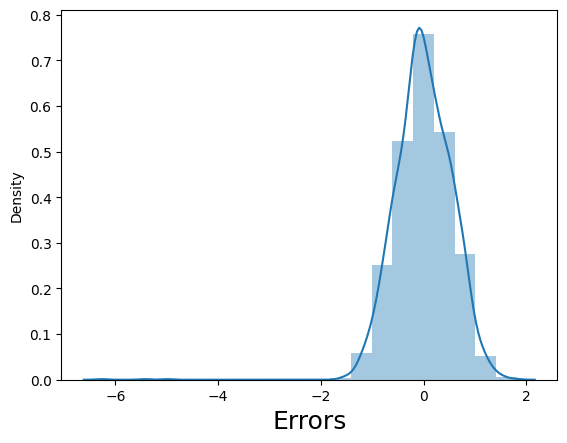

In [207]:
# Plotting histogram of the error terms
fig = plt.figure()
sns.distplot(z, bins = 20)
plt.xlabel('Errors', fontsize = 18) 
plt.show()

It is a normal curve

## Feature Scaling

In [208]:
#Import library for Feature scaling
from sklearn.preprocessing import StandardScaler

In [209]:
# Apply scaler() to all the columns 
scaler = StandardScaler()

X_test[['COMP_HIP_KNEE', 'PSI_4_SURG_COMP',\
       'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',\
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',\
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',\
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',\
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',\
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',\
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',\
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_CLEAN_HSP', 'H_COMP_1',\
       'H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7',\
       'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3',\
       'HAI_4', 'HAI_5', 'HAI_6']] = scaler.fit_transform(X_test[['COMP_HIP_KNEE', 'PSI_4_SURG_COMP',\
       'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',\
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',\
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',\
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',\
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',\
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',\
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',\
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_CLEAN_HSP', 'H_COMP_1',\
       'H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7',\
       'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3',\
       'HAI_4', 'HAI_5', 'HAI_6']])

X_test.head()

Provider ID  COMP_HIP_KNEE  PSI_4_SURG_COMP  PSI_90_SAFETY     OP_10  \
2611       281320       0.410261        -0.975444      -1.983036  0.358136   
492         50616       0.615955         1.131677      -0.029883 -0.645104   
3996       450080       0.615955        -0.975444       0.237672  1.531569   
3174       360044       0.958778        -0.975444       0.184161 -0.555529   
3908       440120       0.410261         0.889773       0.451716 -0.250974   

         OP_11     OP_13     OP_14      OP_8  MORT_30_AMI  ...  H_COMP_7  \
2611  0.108198 -1.019885 -0.875526 -0.812298    -1.356729  ...       0.0   
492  -0.530085 -1.019885  0.428419 -0.812298     0.648890  ...       0.0   
3996  4.970411  0.527292 -0.875526  1.585504    -1.356729  ...       0.0   
3174 -0.267263  0.131503  1.531757 -0.812298     0.648890  ...       0.0   
3908 -0.417447  0.671216  0.929937  0.643158     0.929087  ...       0.0   

      H_HSP_RATING  H_QUIET_HSP  H_RECMND     HAI_1     HAI_2     HAI_3  \
2611           0.0          0.0       0.0 -0.567660 -0.662482 -0.528268   
492            0.0          0.0       0.0 -0.567660 -0.633807  0.195072   
3996           0.0          0.0       0.0 -0.567660 -0.662482 -0.528268   
3174           0.0          0.0       0.0 -0.567660 -0.576459 -0.528268   
3908           0.0          0.0       0.0  2.304962  2.426162  1.311083   

         HAI_4     HAI_5     HAI_6  
2611 -0.280026 -0.465102 -1.063552  
492  -0.280026 -0.465102  2.275452  
3996 -0.280026 -0.465102  1.791611  
3174 -0.280026 -0.465102  2.015892  
3908 -0.280026  7.797902  0.677770  

[5 rows x 63 columns]

In [210]:
X_train_new_4.columns

Index(['const', 'PSI_90_SAFETY', 'OP_10', 'OP_13', 'OP_8', 'MORT_30_AMI',
       'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
       'MORT_30_STK', 'READM_30_COPD', 'READM_30_HF', 'READM_30_HOSP_WIDE',
       'ED_1b', 'IMM_2', 'IMM_3', 'STK_1', 'VTE_1', 'H_COMP_6', 'HAI_1'],
      dtype='object')

In [211]:
# Drop the variables from X_test and creating X_test_new dataframe
X_test_new = X_test[['PSI_90_SAFETY', 'OP_10', 'OP_13', 'OP_8', 'MORT_30_AMI',
       'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
       'MORT_30_STK', 'READM_30_COPD', 'READM_30_HF', 'READM_30_HOSP_WIDE',
       'ED_1b', 'IMM_2', 'IMM_3', 'STK_1', 'VTE_1', 'H_COMP_6', 'HAI_1']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [212]:
X_test_new

const  PSI_90_SAFETY     OP_10     OP_13      OP_8  MORT_30_AMI  \
2611    1.0      -1.983036  0.358136 -1.019885 -0.812298    -1.356729   
492     1.0      -0.029883 -0.645104 -1.019885 -0.812298     0.648890   
3996    1.0       0.237672  1.531569  0.527292  1.585504    -1.356729   
3174    1.0       0.184161 -0.555529  0.131503 -0.812298     0.648890   
3908    1.0       0.451716 -0.250974  0.671216  0.643158     0.929087   
...     ...            ...       ...       ...       ...          ...   
4043    1.0       0.210917 -0.788424 -1.019885 -0.812298    -1.356729   
179     1.0      -1.983036 -0.788424 -1.019885 -0.812298     0.589902   
3708    1.0      -1.983036 -0.788424 -1.019885 -0.812298     0.589902   
1266    1.0      -1.983036  0.331264 -1.019885 -0.812298    -1.356729   
3388    1.0       0.157406  1.182226 -1.019885  1.368419    -1.356729   

      MORT_30_CABG  MORT_30_COPD  MORT_30_HF  MORT_30_PN  ...  READM_30_COPD  \
2611     -0.597523     -3.267758   -3.767001    0.342492  ...      -3.843426   
492      -0.597523      0.440842    0.664660    1.096860  ...       0.530412   
3996     -0.597523      0.268349    0.632074    0.153900  ...       0.060326   
3174     -0.597523      0.440842   -0.084812    0.100017  ...       0.203396   
3908      3.020131      0.958321    1.120860    1.285453  ...       0.407781   
...            ...           ...         ...         ...  ...            ...   
4043     -0.597523      0.311472   -0.117398    0.153900  ...       0.285150   
179      -0.597523      0.138979    0.306217    0.180842  ...       0.346465   
3708     -0.597523     -0.076637   -0.149984   -0.196342  ...       0.366904   
1266     -0.597523      0.354595    0.403974    0.854385  ...       0.223834   
3388     -0.597523     -3.267758   -3.767001   -4.291485  ...      -3.843426   

      READM_30_HF  READM_30_HOSP_WIDE     ED_1b     IMM_2     IMM_3     STK_1  \
2611    -4.343642           -0.190172 -2.090370 -3.795286 -3.555157 -1.601725   
492      0.156942           -0.077611  0.895466  0.015367 -0.960742  0.669795   
3996     0.032502           -0.752978  0.102480  0.315081 -0.784850  0.187958   
3174     0.239902            0.260073 -0.326380  0.101000  0.666263  0.692740   
3908     0.260642           -0.527856  0.725541  0.229449 -0.301146  0.555072   
...           ...                 ...       ...       ...       ...       ...   
4043    -0.174898            0.260073 -0.026987 -0.840960 -3.555157 -1.601725   
179     -0.071198           -0.077611 -2.090370 -3.795286 -3.555157 -1.601725   
3708     1.028023            1.498246  1.372877  0.486347 -3.555157  0.463293   
1266    -0.195638           -1.090662 -0.213096  0.486347  0.754209 -1.601725   
3388    -4.343642           -1.991151 -0.908982  0.486347  0.754209 -1.601725   

         VTE_1  H_COMP_6     HAI_1  
2611 -3.025275 -3.565599 -0.567660  
492   0.479416  0.154245 -0.567660  
3996 -0.086999  0.154245 -0.567660  
3174 -0.122400  0.287097 -0.567660  
3908  0.019204  0.287097  2.304962  
...        ...       ...       ...  
4043 -0.618013 -3.565599 -0.567660  
179  -3.025275  0.021394 -0.567660  
3708 -3.025275 -3.565599 -0.567660  
1266  0.444015  0.508516 -0.567660  
3388  0.373213  0.375665 -0.567660  

[1095 rows x 21 columns]

In [213]:
# Making predictions
y_pred = linear_m_5.predict(X_test_new)

In [214]:
y_pred = y_pred.to_frame()
y_pred_final = y_pred.apply(lambda x : round(x,0))
y_pred_final[0] = y_pred_final[0].astype(int)
y_pred_final = y_pred_final.rename(columns = {list(y_pred_final)[0] :'predicted_rating'})
y_pred_final

predicted_rating
2611                 3
492                  3
3996                 3
3174                 3
3908                 3
...                ...
4043                 2
179                  3
3708                 2
1266                 4
3388                 5

[1095 rows x 1 columns]

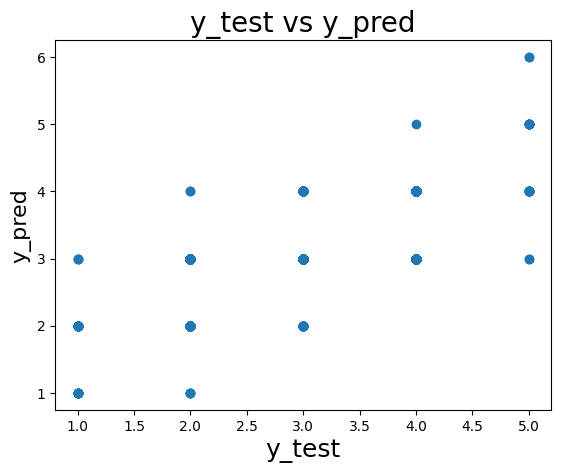

In [215]:
# Plotting y_test and y_pred to understand the spread
plt.scatter(y_test, y_pred_final)
plt.title('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18) 
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [216]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_final)

0.44278257999298576

In [217]:
y_pred_final = pd.concat([y_test,y_pred_final],axis=1)
y_pred_final = pd.concat([X_test['Provider ID'],y_pred_final],axis=1)
y_pred_final

Provider ID  Hospital overall rating  predicted_rating
2611       281320                        3                 3
492         50616                        3                 3
3996       450080                        3                 3
3174       360044                        3                 3
3908       440120                        2                 3
...           ...                      ...               ...
4043       450214                        3                 2
179         31317                        3                 3
3708       400114                        2                 2
1266       141322                        4                 4
3388       370203                        5                 5

[1095 rows x 3 columns]

In [218]:
#Check the overall accuracy.
import sklearn.metrics as metrics
metrics.accuracy_score(y_pred_final['Hospital overall rating'], y_pred_final['predicted_rating'])

0.6136986301369863

The equation of our best fitted line is:

rating = 3.090873 - 0.356144 x PSI_90_SAFETY - 0.054874 x OP_10 + 0.056248 x OP_13 + 0.063187 x OP_8 - 0.045824 x MORT_30_AMI +  0.039842 x MORT_30_CABG - 0.118452 x MORT_30_COPD - 0.075948 x MORT_30_HF -0.176057 x MORT_30_PN - 0.037499 x MORT_30_STK + 0.131265 x READM_30_COPD + 0.071663 x READM_30_HF - 0.353386 x READM_30_HOSP_WIDE - 0.175260 x ED_1b + 0.117721 x IMM_2 + 0.066161 x IMM_3 + 0.057012 x STK_1 + 0.082020 x VTE_1 + 0.110855 x H_COMP_6 - 0.068344 x  HAI_1 

The accuracy is 61.3%

## Let's try Logistic Regression

In [219]:
fin_dataframe = merge_IDs_final.fillna(0)

In [220]:
#Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(fin_dataframe.drop(['Hospital overall rating'],1))
y = fin_dataframe['Hospital overall rating']

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,test_size=0.3,random_state=42)

- Simple Model

In [222]:
log_reg = LogisticRegression()
mod = log_reg.fit(X_train,y_train)
predict=mod.predict(X_train)
predict

array([2, 3, 3, ..., 3, 4, 3])

In [223]:
#Check the complete accuracy
print(metrics.accuracy_score(y_train, predict))

0.7246376811594203


In [224]:
#Confusion metrics
confusion = metrics.confusion_matrix(y_train, predict )
print(confusion)

[[ 59  29   1   0   0]
 [  9 336 139   2   0]
 [  0  88 991 145   0]
 [  0   2 238 427   8]
 [  0   0   1  41  37]]


### Check accuracy on test set

In [225]:
predict_test=mod.predict(X_test)
predict_test

array([3, 3, 3, ..., 3, 3, 2])

In [226]:
#Confusion metrics on test set
confusion = metrics.confusion_matrix(y_test, predict_test )
print(confusion)

[[ 15  13   0   0   0]
 [  2 118  77   1   0]
 [  0  52 422  72   2]
 [  0   0 104 180   5]
 [  0   0   0  27   5]]


In [227]:
#Check accuracy on test set
print(metrics.accuracy_score(y_test, predict_test))

0.6757990867579908


## Logistic Regression giving the accuracy of 62.7 % 

# Random Forest

In [228]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [229]:
merge_IDs_final = merge_IDs_final.dropna()

In [230]:
# Putting feature variable to X
X = merge_IDs_final.drop('Hospital overall rating',axis=1)

# Putting response variable to y
y = merge_IDs_final['Hospital overall rating']

In [231]:
# split X and y into cross-validation (75%) and testing (25%) data sets
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.25)

Top 10 features are: 
READM_30_HOSP_WIDE
PSI_90_SAFETY
H_COMP_6
MORT_30_PN
READM_30_PN
READM_30_HF
ED_1b
MORT_30_HF
ED_2b
READM_30_COPD


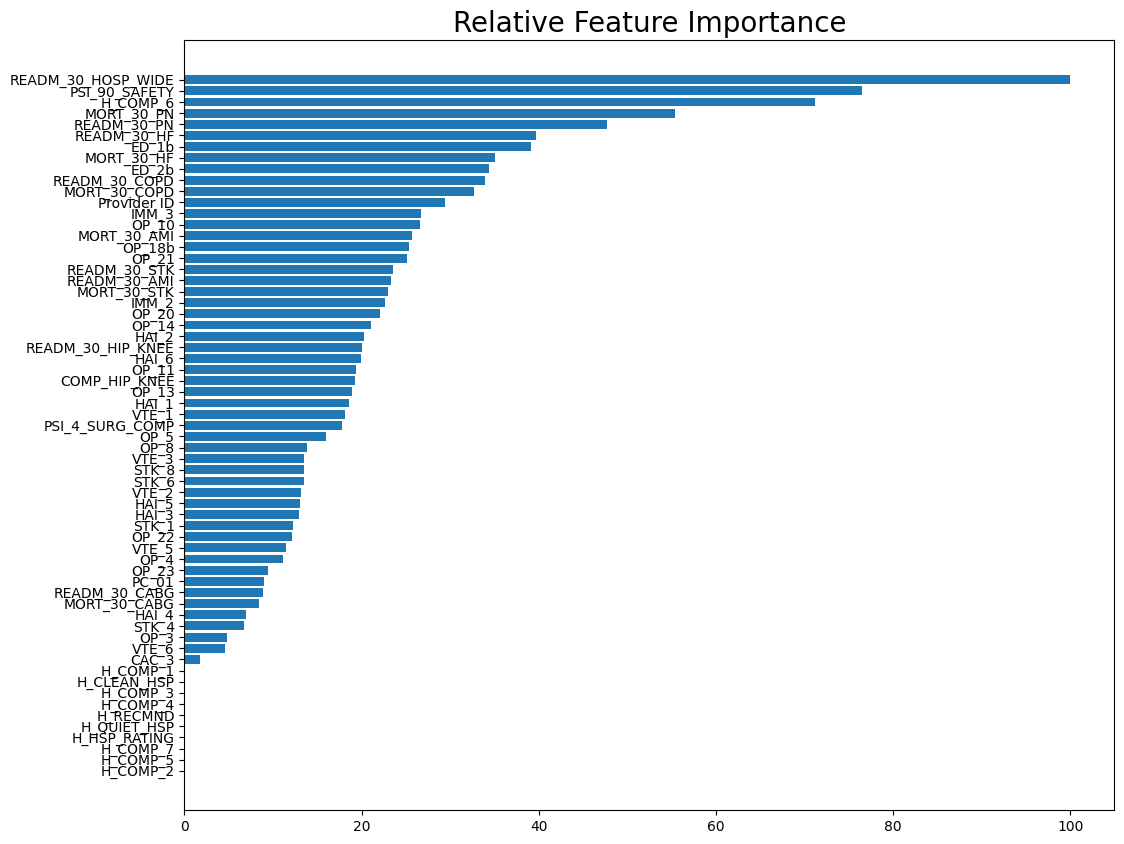

In [232]:
# fit Random Forest model to the cross-validation data
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_cv, y_cv)
importances = forest.feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X_cv.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print ('Top 10 features are: ')
for feature in feature_names_sort[::-1][:10]:
    print (feature)

# plot the result
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('Relative Feature Importance', fontsize=20)
plt.show()

In [233]:
# make a set which have only the top 10 features
top10 = X_cv[['READM_30_HOSP_WIDE','PSI_90_SAFETY','H_COMP_6','MORT_30_PN','READM_30_PN','READM_30_HF','MORT_30_HF','MORT_30_COPD','ED_2b','ED_1b']]
top10.head()

READM_30_HOSP_WIDE  PSI_90_SAFETY  H_COMP_6  MORT_30_PN  READM_30_PN  \
3214                16.3           0.85      87.0        18.7         18.7   
3555                15.5           0.62      86.0        15.5         19.2   
1377                15.8           0.62      88.0         0.0          0.0   
933                 15.1           0.80      87.0        17.2         15.8   
60                  15.0           0.77      74.0        16.5         19.4   

      READM_30_HF  MORT_30_HF  MORT_30_COPD  ED_2b  ED_1b  
3214         23.1        15.5           8.6   78.0  244.0  
3555         21.3        12.2           5.5    0.0    0.0  
1377         23.5        12.1           0.0    0.0    0.0  
933          19.7        10.1           7.7  126.0  290.0  
60           21.7        12.6           7.7   40.0  186.0

## Default Hyperparameters

### Perform Random Forest on Top 10 features

In [234]:
from sklearn.model_selection import cross_val_score

In [235]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
RF_score = cross_val_score(clf1, X_cv, y_cv, cv=10, scoring='accuracy').mean()
RF_score

0.6696224699874336

In [236]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [237]:
# fit
rfc.fit(X_cv,y_cv)

RandomForestClassifier()

In [238]:
# Making predictions
predictions = rfc.predict(X_test)

In [239]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [240]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      0.16      0.27        32
           2       0.64      0.43      0.51       166
           3       0.64      0.91      0.76       435
           4       0.75      0.50      0.60       247
           5       0.93      0.41      0.57        32

    accuracy                           0.67       912
   macro avg       0.79      0.48      0.54       912
weighted avg       0.69      0.67      0.65       912



In [241]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[  5  26   1   0   0]
 [  0  71  95   0   0]
 [  0  14 397  24   0]
 [  0   0 122 124   1]
 [  0   0   1  18  13]]


In [242]:
print(accuracy_score(y_test,predictions))

0.668859649122807


## Hyperparameter Tuning

### Tuning max_depth

In [243]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_cv, y_cv)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [244]:
# scores of GridSearch CV
scores_CV = rf.cv_results_
pd.DataFrame(scores_CV).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.238809      0.018755         0.015918        0.003585   
1       0.412796      0.006506         0.018895        0.002657   
2       0.563587      0.013633         0.022544        0.004566   
3       0.599432      0.024741         0.021436        0.001881   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.496350           0.493601   
1               7   {'max_depth': 7}           0.631387           0.636197   
2              12  {'max_depth': 12}           0.644161           0.659963   
3              17  {'max_depth': 17}           0.651460           0.667276   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.491773           0.493601  ...         0.493786        0.001465   
1           0.628885           0.628885  ...         0.633042        0.004328   
2           0.680073           0.665448  ...         0.665578        0.013121   
3           0.654479           0.659963  ...         0.666307        0.016903   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.499543            0.494746   
1                3            0.818099            0.821836   
2                2            0.990859            0.993604   
3                1            1.000000            1.000000   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.498401            0.495203            0.495660   
1            0.810416            0.809502            0.814527   
2            0.993604            0.994518            0.994061   
3            1.000000            1.000000            1.000000   

   mean_train_score  std_train_score  
0          0.496711         0.001903  
1          0.814876         0.004642  
2          0.993329         0.001281  
3          1.000000         0.000000  

[4 rows x 21 columns]

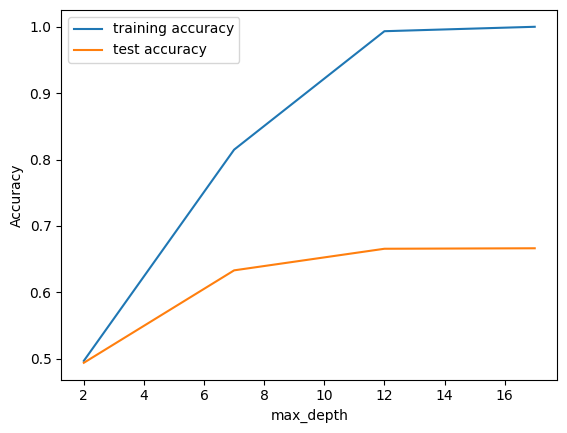

In [245]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores_CV["param_max_depth"], 
         scores_CV["mean_train_score"], 
         label="training accuracy")
plt.plot(scores_CV["param_max_depth"], 
         scores_CV["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning n_estimators

In [246]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_cv, y_cv)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [247]:
# scores of GridSearch CV
scores_CV= rf.cv_results_
pd.DataFrame(scores_CV).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.292017      0.020088         0.014794        0.000860   
1       1.415395      0.028901         0.066257        0.003746   
2       2.557388      0.014604         0.116580        0.005900   
3       3.672392      0.015776         0.175732        0.015982   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}           0.562044   
1                500   {'n_estimators': 500}           0.560219   
2                900   {'n_estimators': 900}           0.567518   
3               1300  {'n_estimators': 1300}           0.569343   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.575868           0.585009           0.550274  ...   
1           0.570384           0.563071           0.553931  ...   
2           0.575868           0.568556           0.555759  ...   
3           0.579525           0.566728           0.555759  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.567985        0.011853                2            0.591408   
1         0.564329        0.007177                4            0.605119   
2         0.568348        0.007045                1            0.608775   
3         0.567616        0.007576                3            0.611060   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.612608            0.611238            0.606213   
1            0.608497            0.608954            0.609868   
2            0.607583            0.610324            0.605756   
3            0.604842            0.610324            0.606213   

   split4_train_score  mean_train_score  std_train_score  
0            0.600274          0.604348         0.007788  
1            0.606213          0.607730         0.001776  
2            0.602558          0.606999         0.002677  
3            0.603015          0.607091         0.003119  

[4 rows x 21 columns]

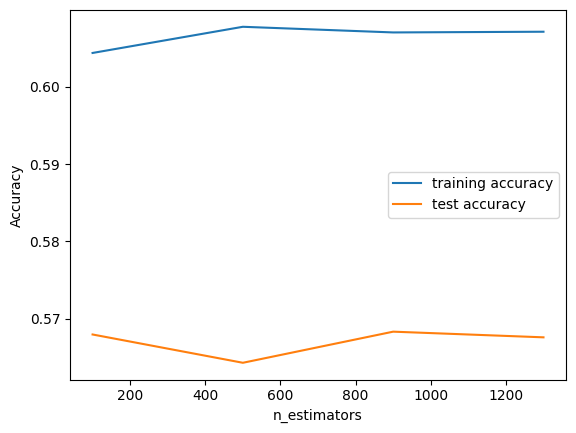

In [248]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores_CV["param_n_estimators"], 
         scores_CV["mean_train_score"], 
         label="training accuracy")
plt.plot(scores_CV["param_n_estimators"], 
         scores_CV["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning max_features

In [249]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_cv, y_cv)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [250]:
# scores of GridSearch CV
scores_CV = rf.cv_results_
pd.DataFrame(scores_CV).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.240381      0.018964         0.015684        0.001870   
1       0.297636      0.004912         0.014933        0.000851   
2       0.427818      0.019506         0.018093        0.003876   
3       0.550495      0.015727         0.020613        0.003556   
4       0.634693      0.014148         0.021551        0.004552   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.518248   
1                  8   {'max_features': 8}           0.576642   
2                 14  {'max_features': 14}           0.613139   
3                 20  {'max_features': 20}           0.627737   
4                 24  {'max_features': 24}           0.640511   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.528336           0.519196           0.508227  ...   
1           0.595978           0.585009           0.572212  ...   
2           0.608775           0.628885           0.594150  ...   
3           0.605119           0.630713           0.625229  ...   
4           0.621572           0.641682           0.641682  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.519737        0.006832                5            0.560786   
1         0.581873        0.008185                4            0.619744   
2         0.610379        0.011205                3            0.658592   
3         0.620246        0.009802                2            0.685558   
4         0.633404        0.009670                1            0.696069   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.546368            0.542714            0.544541   
1            0.618090            0.620375            0.620375   
2            0.656921            0.660119            0.646871   
3            0.672910            0.675651            0.666971   
4            0.675651            0.676565            0.686158   

   split4_train_score  mean_train_score  std_train_score  
0            0.544084          0.547699         0.006647  
1            0.616263          0.618969         0.001590  
2            0.651896          0.654880         0.004867  
3            0.681133          0.676445         0.006448  
4            0.687072          0.684303         0.007541  

[5 rows x 21 columns]

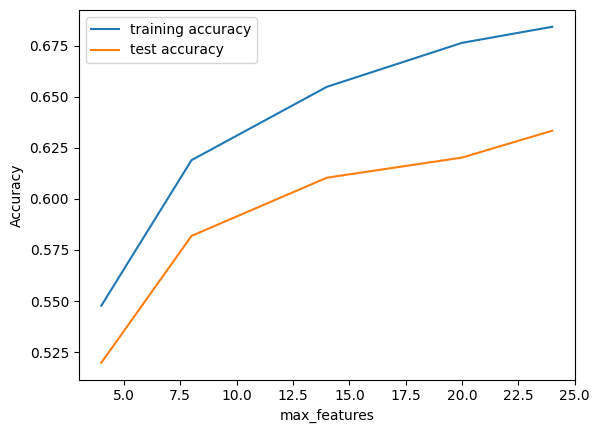

In [251]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores_CV["param_max_features"], 
         scores_CV["mean_train_score"], 
         label="training accuracy")
plt.plot(scores_CV["param_max_features"], 
         scores_CV["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_leaf

In [252]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_cv, y_cv)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [253]:
# scores of GridSearch CV
scores_CV = rf.cv_results_
pd.DataFrame(scores_CV).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.266900      0.014804         0.015215        0.001381   
1       0.241585      0.014086         0.016107        0.001951   
2       0.225338      0.009200         0.014021        0.000722   
3       0.207402      0.005022         0.014956        0.002505   
4       0.209405      0.024610         0.019766        0.002231   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.552920   
1                    150  {'min_samples_leaf': 150}           0.529197   
2                    200  {'min_samples_leaf': 200}           0.501825   
3                    250  {'min_samples_leaf': 250}           0.489051   
4                    300  {'min_samples_leaf': 300}           0.489051   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.544790           0.531993           0.542962  ...   
1           0.519196           0.502742           0.517367  ...   
2           0.497258           0.493601           0.489945  ...   
3           0.491773           0.488117           0.491773  ...   
4           0.489945           0.488117           0.488117  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.543856        0.006815                1            0.569470   
1         0.516808        0.008473                2            0.527879   
2         0.496343        0.004168                3            0.500914   
3         0.489766        0.001674                4            0.488574   
4         0.488669        0.000733                5            0.488574   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.566926            0.569667            0.569210   
1            0.536318            0.529009            0.523070   
2            0.493833            0.518045            0.494746   
3            0.491092            0.489265            0.491092   
4            0.488351            0.488808            0.488808   

   split4_train_score  mean_train_score  std_train_score  
0            0.563271          0.567708         0.002429  
1            0.514390          0.526133         0.007243  
2            0.501599          0.501827         0.008694  
3            0.488808          0.489766         0.001105  
4            0.488808          0.488670         0.000183  

[5 rows x 21 columns]

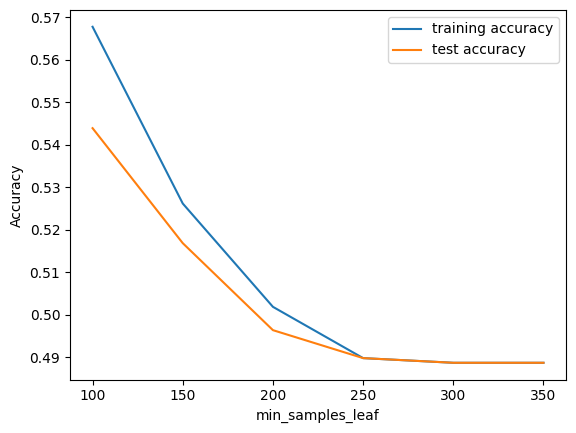

In [254]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores_CV["param_min_samples_leaf"], 
         scores_CV["mean_train_score"], 
         label="training accuracy")
plt.plot(scores_CV["param_min_samples_leaf"], 
         scores_CV["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split

In [255]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_cv, y_cv)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [256]:
# scores of GridSearch CV
scores_CV = rf.cv_results_
pd.DataFrame(scores_CV).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.305432      0.013485         0.016399        0.002560   
1       0.273542      0.011981         0.016804        0.003363   
2       0.270130      0.018913         0.014073        0.000131   
3       0.254281      0.015706         0.016611        0.002292   
4       0.249733      0.019929         0.013771        0.000279   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.580292   
1                     250  {'min_samples_split': 250}           0.571168   
2                     300  {'min_samples_split': 300}           0.534672   
3                     350  {'min_samples_split': 350}           0.543796   
4                     400  {'min_samples_split': 400}           0.531022   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.575868           0.579525           0.563071  ...   
1           0.564899           0.563071           0.570384  ...   
2           0.548446           0.539305           0.542962  ...   
3           0.541133           0.553931           0.526508  ...   
4           0.511883           0.524680           0.508227  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.577119        0.007864                1            0.616545   
1         0.565056        0.005588                2            0.585923   
2         0.545326        0.009148                3            0.552102   
3         0.542397        0.009020                4            0.547075   
4         0.520830        0.009099                5            0.533364   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.614436            0.618090            0.614893   
1            0.595249            0.589310            0.596619   
2            0.566926            0.560987            0.555048   
3            0.556875            0.559616            0.549566   
4            0.522613            0.542257            0.523070   

   split4_train_score  mean_train_score  std_train_score  
0            0.607127          0.614218         0.003774  
1            0.578346          0.589090         0.006635  
2            0.571494          0.561311         0.007202  
3            0.545455          0.551717         0.005557  
4            0.529009          0.530062         0.007281  

[5 rows x 21 columns]

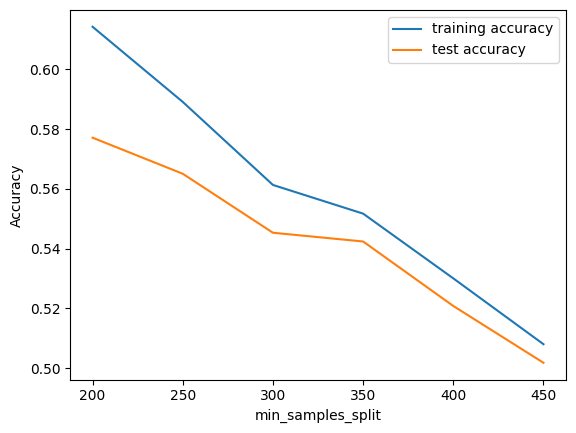

In [257]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores_CV["param_min_samples_split"], 
         scores_CV["mean_train_score"], 
         label="training accuracy")
plt.plot(scores_CV["param_min_samples_split"], 
         scores_CV["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

In [258]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,6,7],
    'min_samples_leaf': [125,150,175],
    'min_samples_split': [275,300,325],
    'n_estimators': [100,900,1000], 
    'max_features': [5,6,8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [259]:
# Fit the grid search to the data
grid_search.fit(X_cv, y_cv)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 7], 'max_features': [5, 6, 8],
                         'min_samples_leaf': [125, 150, 175],
                         'min_samples_split': [275, 300, 325],
                         'n_estimators': [100, 900, 1000]},
             verbose=1)

In [260]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.5321637426900585 using {'max_depth': 6, 'max_features': 8, 'min_samples_leaf': 125, 'min_samples_split': 275, 'n_estimators': 100}


## Fitting the final model

In [261]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=125, 
                             min_samples_split=275,
                             max_features=8,
                             n_estimators=100)

In [262]:
# fit
rfc.fit(X_cv,y_cv)

RandomForestClassifier(max_depth=7, max_features=8, min_samples_leaf=125,
                       min_samples_split=275)

In [263]:
# predict
y_test_pred = rfc.predict(X_test)

In [264]:
y_test_pred[:10]

array([3, 3, 4, 3, 3, 3, 3, 3, 3, 3])

In [265]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [266]:
# Let's see the head
y_pred_1.head()

0
0  3
1  3
2  4
3  3
4  3

In [267]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Hospital overall rating
876                         2
1430                        3
4537                        3
1227                        3
3433                        3

In [268]:
# Removing index for both dataframes 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [269]:
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final = pd.concat([X_test['Provider ID'],y_pred_final],axis=1)
y_pred_final = y_pred_final.dropna()
y_pred_final.reset_index(drop=True, inplace=True)
y_pred_final.head()

Provider ID  Hospital overall rating    0
0      10016.0                      3.0  3.0
1      10046.0                      4.0  4.0
2      10051.0                      4.0  3.0
3      10078.0                      2.0  3.0
4      10085.0                      3.0  3.0

In [270]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'predicted_rating'})

In [271]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Provider ID','Hospital overall rating','predicted_rating'], axis=1)

In [272]:
# Check the head of y_pred_final
y_pred_final.head()

Provider ID  Hospital overall rating  predicted_rating
0      10016.0                      3.0               3.0
1      10046.0                      4.0               4.0
2      10051.0                      4.0               3.0
3      10078.0                      2.0               3.0
4      10085.0                      3.0               3.0

In [273]:
# Let's check the complete accuracy.
import sklearn.metrics as metrics
metrics.accuracy_score(y_pred_final['Hospital overall rating'], y_pred_final['predicted_rating'])

0.5309278350515464

In [274]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [275]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      0.16      0.27        32
           2       0.64      0.43      0.51       166
           3       0.64      0.91      0.76       435
           4       0.75      0.50      0.60       247
           5       0.93      0.41      0.57        32

    accuracy                           0.67       912
   macro avg       0.79      0.48      0.54       912
weighted avg       0.69      0.67      0.65       912



In [276]:
print(confusion_matrix(y_test,predictions))

[[  5  26   1   0   0]
 [  0  71  95   0   0]
 [  0  14 397  24   0]
 [  0   0 122 124   1]
 [  0   0   1  18  13]]


In [277]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
RF_score = cross_val_score(clf1, X_cv, y_cv, cv=10, scoring='accuracy').mean()
RF_score

0.6728910991684716

### The accuracy is 68%

## PCA and Clustering

In [278]:
from sklearn.preprocessing import StandardScaler

In [279]:
pca_dataframe = merge_IDs_final.drop(['Provider ID'],1)

In [280]:
pca_dataframe.columns

Index(['Hospital overall rating', 'COMP_HIP_KNEE', 'PSI_4_SURG_COMP',
       'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_CLEAN_HSP', 'H_COMP_1',
       'H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7',
       'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3',
       'HAI_4', 'HAI_5', 'HAI_6'],
      dtype='object')

In [281]:
numeric = ['COMP_HIP_KNEE','PSI_4_SURG_COMP', 'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14','OP_8', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF','MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG','READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE','READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b','ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23','OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8','VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_CLEAN_HSP', 'H_COMP_1','H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7','H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3','HAI_4', 'HAI_5', 'HAI_6']

In [282]:
scaler = StandardScaler()
pca_dataframe[numeric] = scaler.fit_transform(pca_dataframe[numeric])
pca_dataframe

Hospital overall rating  COMP_HIP_KNEE  PSI_4_SURG_COMP  PSI_90_SAFETY  \
0                           3       1.106393         1.438608      -0.170633   
1                           3       0.551895         1.593622       0.290135   
2                           2       1.106393         1.870607       0.452759   
3                           3      -1.527472        -0.978688       0.127511   
4                           3      -1.527472        -0.978688       0.425655   
...                       ...            ...              ...            ...   
4799                        3      -1.527472        -0.978688       0.154615   
4801                        3      -1.527472        -0.978688       0.723799   
4812                        2       0.482583        -0.978688      -2.013706   
4813                        2      -1.527472        -0.978688      -2.013706   
4815                        2      -1.527472        -0.978688      -2.013706   

         OP_10     OP_11     OP_13     OP_14      OP_8  MORT_30_AMI  ...  \
0    -0.177091 -0.334487  1.535552  0.333343  1.062926     0.490396  ...   
1     0.541828  1.390778  0.885255  1.140701  1.295044     1.007234  ...   
2     0.385542  0.351909 -1.029508  1.443461  1.433327     1.110601  ...   
3     1.687932  0.630177 -1.029508 -0.877696 -0.818710    -1.355451  ...   
4    -0.468826 -0.501448 -1.029508 -0.574936 -0.818710    -1.355451  ...   
...        ...       ...       ...       ...       ...          ...  ...   
4799 -0.843914 -0.501448 -1.029508 -0.877696 -0.818710     0.623297  ...   
4801 -0.614694 -0.501448 -1.029508 -0.877696 -0.818710    -1.355451  ...   
4812 -0.500083  0.129294 -1.029508 -0.877696 -0.818710     0.815266  ...   
4813 -0.843914 -0.501448 -1.029508 -0.877696 -0.818710     1.391170  ...   
4815 -0.843914 -0.501448 -1.029508 -0.877696 -0.818710     0.889099  ...   

      H_COMP_7  H_HSP_RATING  H_QUIET_HSP  H_RECMND     HAI_1     HAI_2  \
0          0.0           0.0          0.0       0.0  3.717869  3.429952   
1          0.0           0.0          0.0       0.0  0.825197  0.044476   
2          0.0           0.0          0.0       0.0 -0.005455  0.908674   
3          0.0           0.0          0.0       0.0 -0.581484 -0.656112   
4          0.0           0.0          0.0       0.0 -0.581484 -0.656112   
...        ...           ...          ...       ...       ...       ...   
4799       0.0           0.0          0.0       0.0 -0.581484 -0.656112   
4801       0.0           0.0          0.0       0.0 -0.581484 -0.563819   
4812       0.0           0.0          0.0       0.0  0.879461  3.094341   
4813       0.0           0.0          0.0       0.0  1.789421  2.066532   
4815       0.0           0.0          0.0       0.0 -0.581484 -0.656112   

         HAI_3     HAI_4     HAI_5     HAI_6  
0     2.189166 -0.285226 -0.167453  0.365935  
1    -0.492519 -0.285226  0.186926 -0.616352  
2    -0.501160 -0.285226  0.659431 -0.279568  
3    -0.547247 -0.285226 -0.468393 -1.067949  
4    -0.547247 -0.285226 -0.468393 -0.993959  
...        ...       ...       ...       ...  
4799 -0.547247 -0.285226 -0.468393 -1.037333  
4801 -0.547247 -0.285226 -0.468393  1.960557  
4812 -0.547247 -0.285226  0.437241 -0.603595  
4813  0.383133 -0.285226 -0.468393 -0.965894  
4815 -0.547247 -0.285226 -0.468393 -1.067949  

[3648 rows x 63 columns]

In [283]:
#Import the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [284]:
#fit dataframe on the pca
pca.fit(pca_dataframe)

PCA(random_state=42, svd_solver='randomized')

In [285]:
#Principal components
pca.components_

array([[ 6.45741528e-02, -1.38514555e-01, -2.00670915e-01, ...,
        -7.07758679e-02, -1.14583134e-01, -1.76322062e-01],
       [ 1.24763215e-01,  4.88128366e-02,  8.86693767e-02, ...,
         9.56677582e-02,  7.01083303e-02,  8.89671840e-02],
       [-1.37005844e-01, -1.50967975e-01,  1.05829934e-01, ...,
         1.34823816e-01,  1.87674738e-01,  3.83693767e-02],
       ...,
       [-0.00000000e+00,  8.81139908e-17, -1.45671214e-17, ...,
        -1.76452515e-17, -7.54705231e-17, -1.27041046e-16],
       [-0.00000000e+00, -5.17382413e-17, -5.57585285e-17, ...,
         6.30539188e-17, -3.09638232e-17,  1.05662163e-16],
       [ 0.00000000e+00, -8.32422301e-18,  3.06594247e-17, ...,
         3.09437659e-17, -4.51047868e-17,  4.60350902e-17]])

In [286]:
## Cumuliative varinace of the PCs
pca.explained_variance_ratio_

array([2.84331299e-01, 8.55267758e-02, 5.65983904e-02, 5.30322365e-02,
       3.14823526e-02, 2.58180299e-02, 2.50031575e-02, 2.17934022e-02,
       2.03010062e-02, 1.93057632e-02, 1.87816394e-02, 1.76088588e-02,
       1.72909134e-02, 1.67209737e-02, 1.59104113e-02, 1.56638545e-02,
       1.50940595e-02, 1.48694872e-02, 1.44716411e-02, 1.34046742e-02,
       1.32699869e-02, 1.25144199e-02, 1.20422409e-02, 1.14248448e-02,
       1.11253161e-02, 1.08238272e-02, 1.07539340e-02, 1.03914501e-02,
       9.98164588e-03, 9.80236592e-03, 9.47051334e-03, 9.36905142e-03,
       9.08566435e-03, 8.38844757e-03, 7.27047533e-03, 7.10357246e-03,
       6.33209553e-03, 5.89081673e-03, 5.38919136e-03, 4.80613668e-03,
       4.27314966e-03, 4.04580114e-03, 3.28018262e-03, 3.09102858e-03,
       2.86105617e-03, 2.66295806e-03, 2.50090485e-03, 2.47156166e-03,
       1.66670623e-03, 1.40601556e-03, 1.36403825e-03, 1.21912358e-03,
       9.12550439e-04, 1.48048062e-33, 1.48048062e-33, 1.48048062e-33,
      

### Screeplot

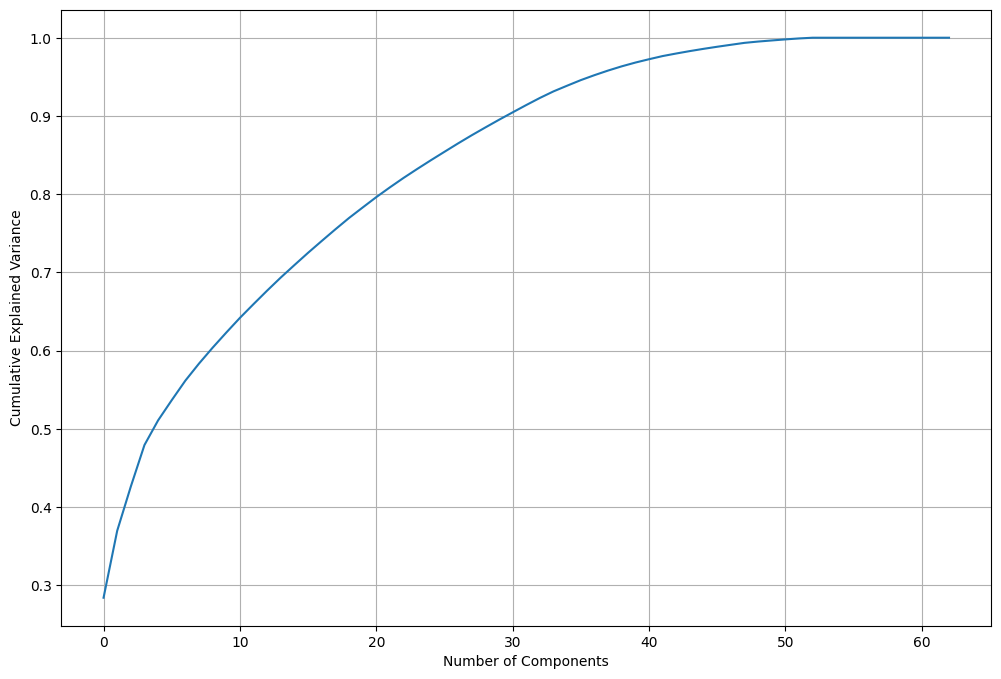

In [287]:
# Plotting feature variance against the number of components
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

Choosing PC as 30 since it gives around 91% variance

In [288]:
colnames = list(pca_dataframe.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

PC1       PC2                  Feature
0   0.064574  0.124763  Hospital overall rating
1  -0.138515  0.048813            COMP_HIP_KNEE
2  -0.200671  0.088669          PSI_4_SURG_COMP
3  -0.160433  0.080013            PSI_90_SAFETY
4   0.000572 -0.077254                    OP_10
..       ...       ...                      ...
58 -0.135129  0.113495                    HAI_2
59 -0.125003  0.102147                    HAI_3
60 -0.070776  0.095668                    HAI_4
61 -0.114583  0.070108                    HAI_5
62 -0.176322  0.088967                    HAI_6

[63 rows x 3 columns]

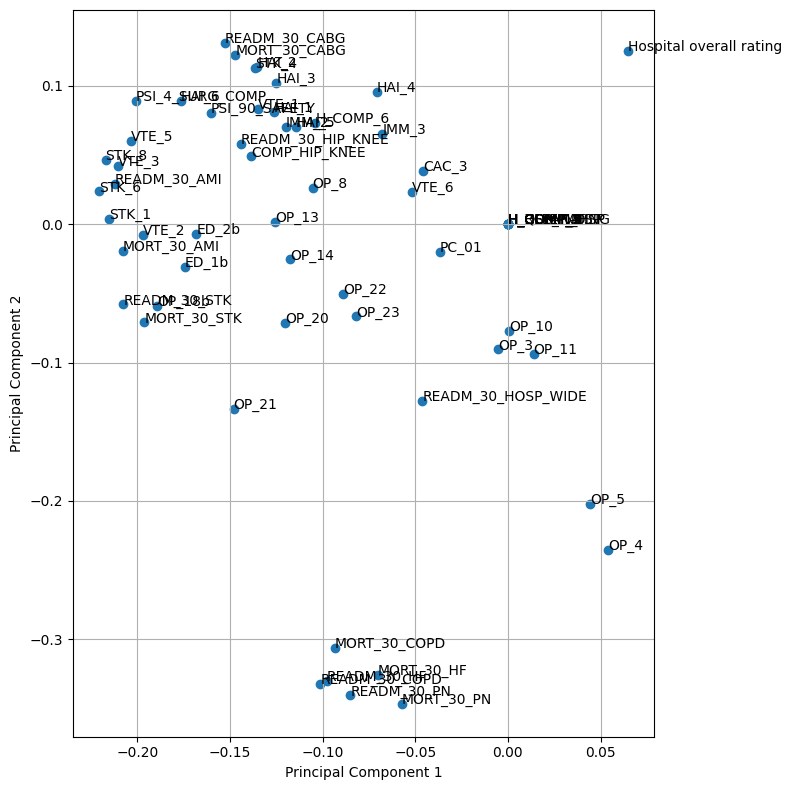

In [289]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.grid()
plt.show()

In [290]:
#Using Incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

In [291]:
#Fit and transform the dataframe
df_train_pca = pca_final.fit_transform(pca_dataframe)
pca_dataframe = pd.DataFrame(df_train_pca)
pca_dataframe.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30']
pca_dataframe

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     5.427481 -1.120923 -2.548290  0.447019  2.133258 -1.712844  0.566260   
1     2.523057  1.535194  2.072356 -0.974311  1.071333  0.740672  0.924230   
2     3.159210 -0.411730 -1.003491 -2.047033  0.982577  1.072525 -1.088508   
3    -2.209012  2.869897  0.413703  1.718694  0.877342  1.093745 -1.837763   
4    -5.197569  0.840449 -2.087396  1.451486 -0.390197 -0.789553 -2.116200   
...        ...       ...       ...       ...       ...       ...       ...   
3643 -3.311121  0.011900 -1.678899 -1.457666 -2.711159  0.673154 -1.814711   
3644 -3.303744 -0.510535 -1.685077  1.118169 -2.140828  0.516082 -1.731890   
3645 -0.399082 -0.466293 -1.726477 -0.700595 -3.624054  3.342950  0.183529   
3646 -2.937602  0.891899 -3.248474 -2.037931 -2.721112  1.425755 -0.804616   
3647 -4.653504  2.074859 -3.688278 -3.483623 -2.092507  0.608091 -0.575000   

           PC8       PC9      PC10  ...      PC21      PC22      PC23  \
0     0.438519 -0.165055 -0.450322  ...  0.336660 -1.503012  0.399244   
1    -0.603819 -1.210139 -0.249087  ...  0.017987  0.520117 -0.631096   
2     0.181333 -0.273746 -1.202890  ... -1.342731  1.027495  0.112044   
3    -0.365285  0.228626  0.702780  ...  0.314153 -0.367608  0.844359   
4     0.488144  0.323963 -0.860497  ... -1.178240 -0.701378 -0.822633   
...        ...       ...       ...  ...       ...       ...       ...   
3643  0.254029 -0.910994  1.833321  ...  0.123975 -0.209326 -0.434375   
3644  0.185659 -0.535292  0.606187  ... -1.984177 -0.552006 -0.111910   
3645  1.823338  1.453891  2.322988  ...  1.287594  1.491833  1.033365   
3646 -0.321880 -0.359798  1.204052  ...  0.005828 -1.401268  0.232699   
3647 -0.036539 -2.404573  2.304877  ... -1.936300 -0.398851  0.268496   

          PC24      PC25      PC26      PC27      PC28      PC29      PC30  
0     0.690113  1.154693  1.108973 -1.511086  1.675995 -0.023504 -0.006194  
1     0.234696  0.208867 -0.478368 -1.099142  0.636289  0.864221  0.088463  
2     1.175422 -1.026101 -0.249708 -0.727875  0.521395  0.716684  1.030721  
3     0.273561  0.366564 -0.901863  1.309857  0.612574 -0.493739 -0.058538  
4     0.448409  0.156849 -0.224975  0.171658  0.350553 -1.453870 -0.235723  
...        ...       ...       ...       ...       ...       ...       ...  
3643  0.031512 -0.624519 -0.194083 -0.771451 -0.973628  1.313319 -0.149693  
3644 -1.415965  0.056535 -0.020362  0.018334  0.203857 -0.257111  0.024916  
3645  1.508300  0.465445  0.050209 -1.109938  1.070738  0.101682  1.561750  
3646  0.750586 -0.124765  0.405317 -0.695474  1.480968 -0.386264 -0.115498  
3647 -0.996394 -0.961531 -0.625111  0.334616  0.611708  0.365662 -0.464390  

[3648 rows x 30 columns]

### Coorrelation Matrix
There shouldn't be any correlation between the PCs

In [292]:
corr_matrix = np.corrcoef(df_train_pca.transpose())

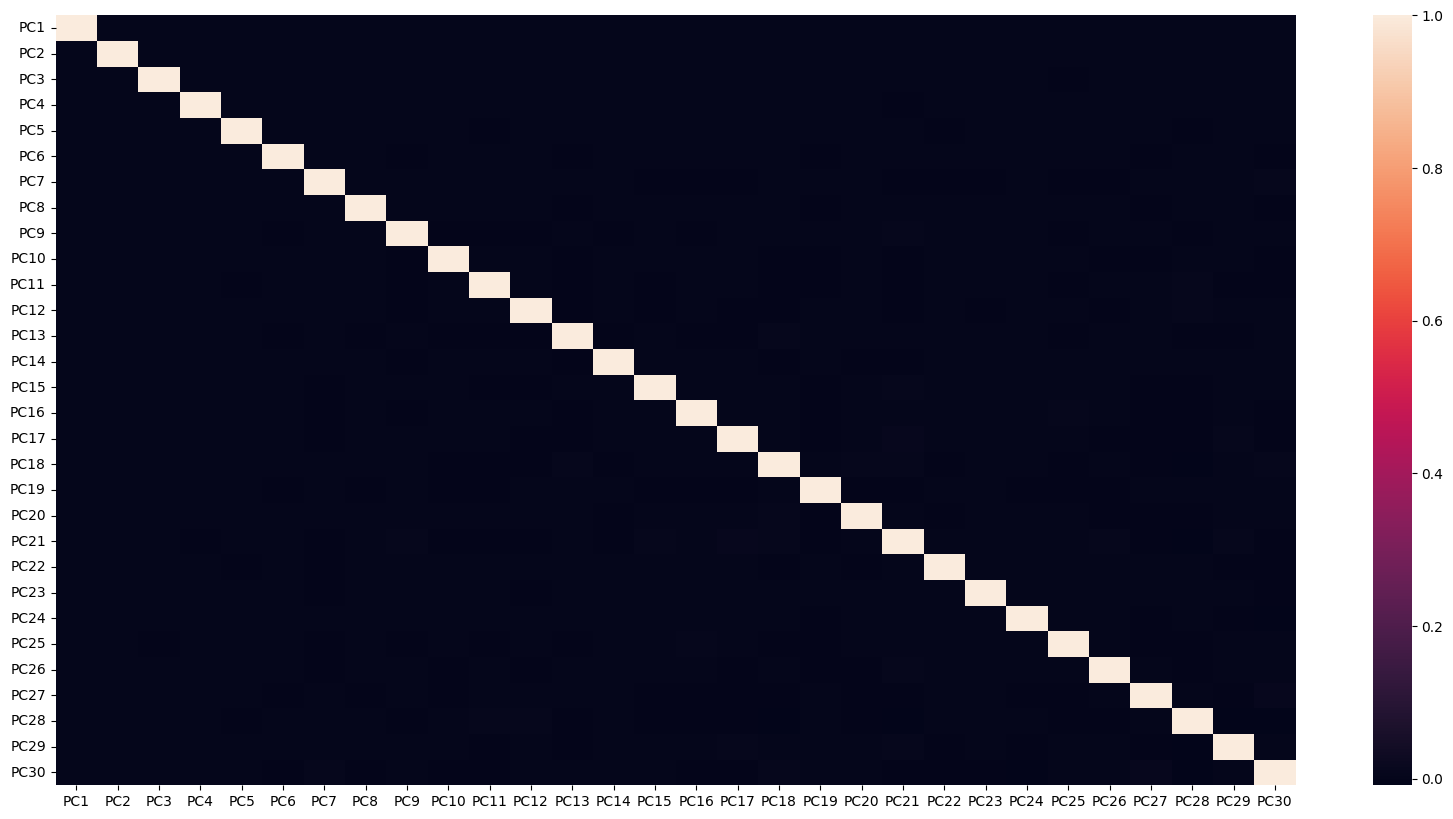

In [293]:
#Plotting heatmap
plt.figure(figsize = (20,10))
sns.heatmap(pca_dataframe.corr())
plt.show()

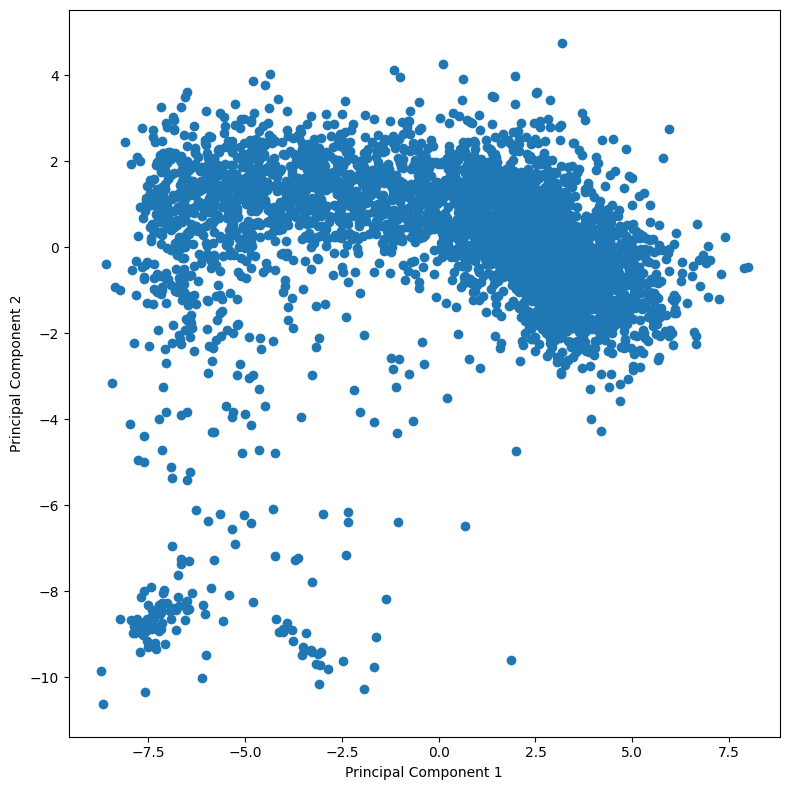

In [294]:
#scatter plot for the checking
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_dataframe.PC1, pca_dataframe.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [295]:
corr_matrix_nodiag = corr_matrix - np.diagflat(corr_matrix.diagonal())
print("maximum correlation:",corr_matrix_nodiag.max(), ", minimum correlation: ", corr_matrix_nodiag.min(),)

maximum correlation: 0.008905082481962884 , minimum correlation:  -0.00878939025505778


The correlations are almost 0

In [296]:
provider = pd.DataFrame(merge_IDs_final['Provider ID'])
provider.reset_index(inplace = True,drop = True)
provider

Provider ID
0           10001
1           10005
2           10006
3           10007
4           10008
...           ...
3643       670096
3644       670098
3645       480001
3646       480002
3647       650001

[3648 rows x 1 columns]

In [297]:
pca_dataframe

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     5.427481 -1.120923 -2.548290  0.447019  2.133258 -1.712844  0.566260   
1     2.523057  1.535194  2.072356 -0.974311  1.071333  0.740672  0.924230   
2     3.159210 -0.411730 -1.003491 -2.047033  0.982577  1.072525 -1.088508   
3    -2.209012  2.869897  0.413703  1.718694  0.877342  1.093745 -1.837763   
4    -5.197569  0.840449 -2.087396  1.451486 -0.390197 -0.789553 -2.116200   
...        ...       ...       ...       ...       ...       ...       ...   
3643 -3.311121  0.011900 -1.678899 -1.457666 -2.711159  0.673154 -1.814711   
3644 -3.303744 -0.510535 -1.685077  1.118169 -2.140828  0.516082 -1.731890   
3645 -0.399082 -0.466293 -1.726477 -0.700595 -3.624054  3.342950  0.183529   
3646 -2.937602  0.891899 -3.248474 -2.037931 -2.721112  1.425755 -0.804616   
3647 -4.653504  2.074859 -3.688278 -3.483623 -2.092507  0.608091 -0.575000   

           PC8       PC9      PC10  ...      PC21      PC22      PC23  \
0     0.438519 -0.165055 -0.450322  ...  0.336660 -1.503012  0.399244   
1    -0.603819 -1.210139 -0.249087  ...  0.017987  0.520117 -0.631096   
2     0.181333 -0.273746 -1.202890  ... -1.342731  1.027495  0.112044   
3    -0.365285  0.228626  0.702780  ...  0.314153 -0.367608  0.844359   
4     0.488144  0.323963 -0.860497  ... -1.178240 -0.701378 -0.822633   
...        ...       ...       ...  ...       ...       ...       ...   
3643  0.254029 -0.910994  1.833321  ...  0.123975 -0.209326 -0.434375   
3644  0.185659 -0.535292  0.606187  ... -1.984177 -0.552006 -0.111910   
3645  1.823338  1.453891  2.322988  ...  1.287594  1.491833  1.033365   
3646 -0.321880 -0.359798  1.204052  ...  0.005828 -1.401268  0.232699   
3647 -0.036539 -2.404573  2.304877  ... -1.936300 -0.398851  0.268496   

          PC24      PC25      PC26      PC27      PC28      PC29      PC30  
0     0.690113  1.154693  1.108973 -1.511086  1.675995 -0.023504 -0.006194  
1     0.234696  0.208867 -0.478368 -1.099142  0.636289  0.864221  0.088463  
2     1.175422 -1.026101 -0.249708 -0.727875  0.521395  0.716684  1.030721  
3     0.273561  0.366564 -0.901863  1.309857  0.612574 -0.493739 -0.058538  
4     0.448409  0.156849 -0.224975  0.171658  0.350553 -1.453870 -0.235723  
...        ...       ...       ...       ...       ...       ...       ...  
3643  0.031512 -0.624519 -0.194083 -0.771451 -0.973628  1.313319 -0.149693  
3644 -1.415965  0.056535 -0.020362  0.018334  0.203857 -0.257111  0.024916  
3645  1.508300  0.465445  0.050209 -1.109938  1.070738  0.101682  1.561750  
3646  0.750586 -0.124765  0.405317 -0.695474  1.480968 -0.386264 -0.115498  
3647 -0.996394 -0.961531 -0.625111  0.334616  0.611708  0.365662 -0.464390  

[3648 rows x 30 columns]

In [298]:
pca_dataframe = pd.concat([provider, pca_dataframe], axis=1)
pca_dataframe

Provider ID       PC1       PC2       PC3       PC4       PC5       PC6  \
0           10001  5.427481 -1.120923 -2.548290  0.447019  2.133258 -1.712844   
1           10005  2.523057  1.535194  2.072356 -0.974311  1.071333  0.740672   
2           10006  3.159210 -0.411730 -1.003491 -2.047033  0.982577  1.072525   
3           10007 -2.209012  2.869897  0.413703  1.718694  0.877342  1.093745   
4           10008 -5.197569  0.840449 -2.087396  1.451486 -0.390197 -0.789553   
...           ...       ...       ...       ...       ...       ...       ...   
3643       670096 -3.311121  0.011900 -1.678899 -1.457666 -2.711159  0.673154   
3644       670098 -3.303744 -0.510535 -1.685077  1.118169 -2.140828  0.516082   
3645       480001 -0.399082 -0.466293 -1.726477 -0.700595 -3.624054  3.342950   
3646       480002 -2.937602  0.891899 -3.248474 -2.037931 -2.721112  1.425755   
3647       650001 -4.653504  2.074859 -3.688278 -3.483623 -2.092507  0.608091   

           PC7       PC8       PC9  ...      PC21      PC22      PC23  \
0     0.566260  0.438519 -0.165055  ...  0.336660 -1.503012  0.399244   
1     0.924230 -0.603819 -1.210139  ...  0.017987  0.520117 -0.631096   
2    -1.088508  0.181333 -0.273746  ... -1.342731  1.027495  0.112044   
3    -1.837763 -0.365285  0.228626  ...  0.314153 -0.367608  0.844359   
4    -2.116200  0.488144  0.323963  ... -1.178240 -0.701378 -0.822633   
...        ...       ...       ...  ...       ...       ...       ...   
3643 -1.814711  0.254029 -0.910994  ...  0.123975 -0.209326 -0.434375   
3644 -1.731890  0.185659 -0.535292  ... -1.984177 -0.552006 -0.111910   
3645  0.183529  1.823338  1.453891  ...  1.287594  1.491833  1.033365   
3646 -0.804616 -0.321880 -0.359798  ...  0.005828 -1.401268  0.232699   
3647 -0.575000 -0.036539 -2.404573  ... -1.936300 -0.398851  0.268496   

          PC24      PC25      PC26      PC27      PC28      PC29      PC30  
0     0.690113  1.154693  1.108973 -1.511086  1.675995 -0.023504 -0.006194  
1     0.234696  0.208867 -0.478368 -1.099142  0.636289  0.864221  0.088463  
2     1.175422 -1.026101 -0.249708 -0.727875  0.521395  0.716684  1.030721  
3     0.273561  0.366564 -0.901863  1.309857  0.612574 -0.493739 -0.058538  
4     0.448409  0.156849 -0.224975  0.171658  0.350553 -1.453870 -0.235723  
...        ...       ...       ...       ...       ...       ...       ...  
3643  0.031512 -0.624519 -0.194083 -0.771451 -0.973628  1.313319 -0.149693  
3644 -1.415965  0.056535 -0.020362  0.018334  0.203857 -0.257111  0.024916  
3645  1.508300  0.465445  0.050209 -1.109938  1.070738  0.101682  1.561750  
3646  0.750586 -0.124765  0.405317 -0.695474  1.480968 -0.386264 -0.115498  
3647 -0.996394 -0.961531 -0.625111  0.334616  0.611708  0.365662 -0.464390  

[3648 rows x 31 columns]

### Outliers Treatment

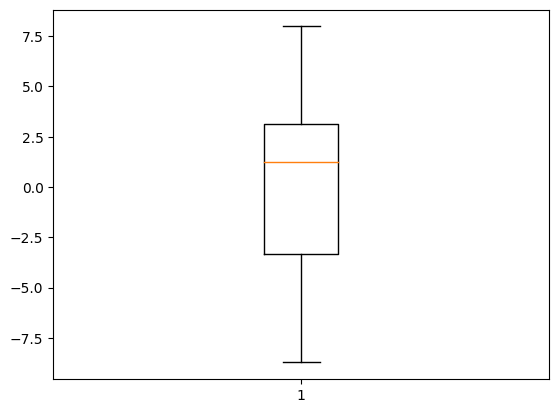

In [299]:
#Handling Outliers
plt.boxplot(pca_dataframe.PC1)
Q1 = pca_dataframe.PC1.quantile(0.25)
Q3 = pca_dataframe.PC1.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC1 >= Q1 - 1.5*IQR) & (pca_dataframe.PC1 <= Q3 + 1.5*IQR)]
plt.show()

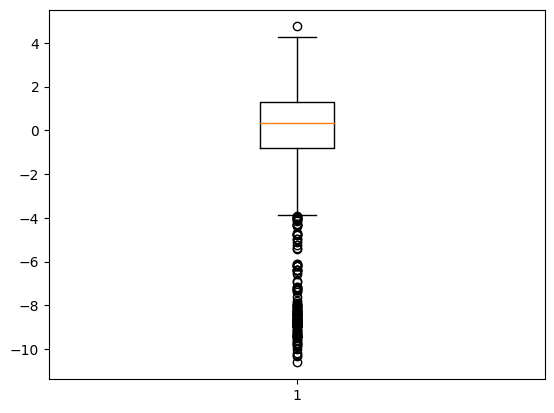

In [300]:
#Visualization of dataframe
plt.boxplot(pca_dataframe.PC2)
Q1 = pca_dataframe.PC2.quantile(0.25)
Q3 = pca_dataframe.PC2.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC2 >= Q1 - 1.5*IQR) & (pca_dataframe.PC2 <= Q3 + 1.5*IQR)]
plt.show()

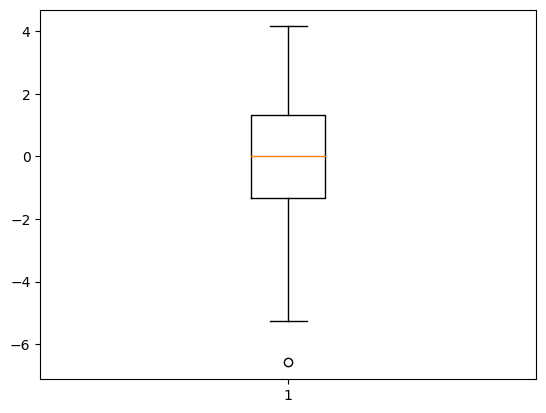

In [301]:
#Data visualization
plt.boxplot(pca_dataframe.PC3)
Q1 = pca_dataframe.PC3.quantile(0.25)
Q3 = pca_dataframe.PC3.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC3 >= Q1 - 1.5*IQR) & (pca_dataframe.PC3 <= Q3 + 1.5*IQR)]
plt.show()

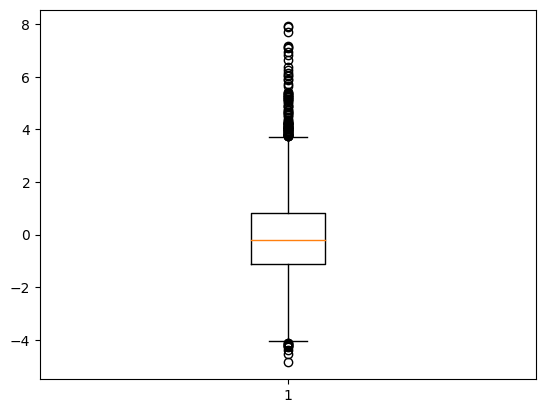

In [302]:
plt.boxplot(pca_dataframe.PC4)
Q1 = pca_dataframe.PC4.quantile(0.25)
Q3 = pca_dataframe.PC4.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC4 >= Q1 - 1.5*IQR) & (pca_dataframe.PC4 <= Q3 + 1.5*IQR)]
plt.show()

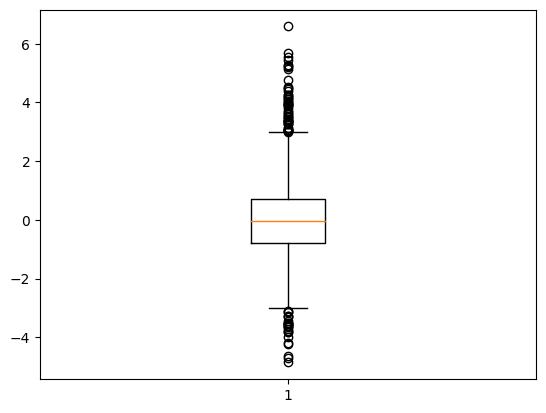

In [303]:
plt.boxplot(pca_dataframe.PC5)
Q1 = pca_dataframe.PC5.quantile(0.25)
Q3 = pca_dataframe.PC5.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe= pca_dataframe[(pca_dataframe.PC5 >= Q1 - 1.5*IQR) & (pca_dataframe.PC5 <= Q3 + 1.5*IQR)]
plt.show()

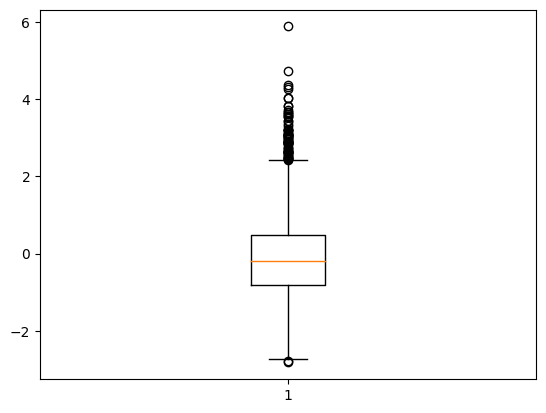

In [304]:
plt.boxplot(pca_dataframe.PC6)
Q1 = pca_dataframe.PC6.quantile(0.25)
Q3 = pca_dataframe.PC6.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC6 >= Q1 - 1.5*IQR) & (pca_dataframe.PC6 <= Q3 + 1.5*IQR)]
plt.show()

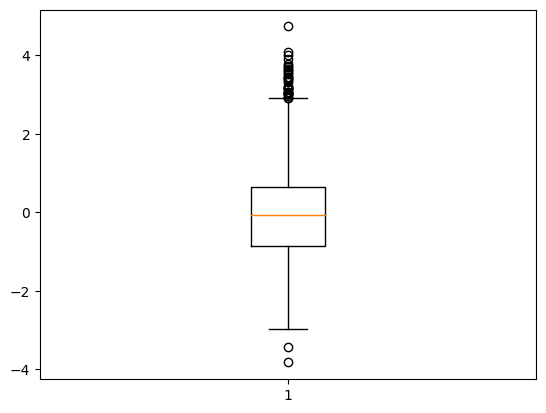

In [305]:
plt.boxplot(pca_dataframe.PC7)
Q1 = pca_dataframe.PC7.quantile(0.25)
Q3 = pca_dataframe.PC7.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC7 >= Q1 - 1.5*IQR) & (pca_dataframe.PC7 <= Q3 + 1.5*IQR)]
plt.show()

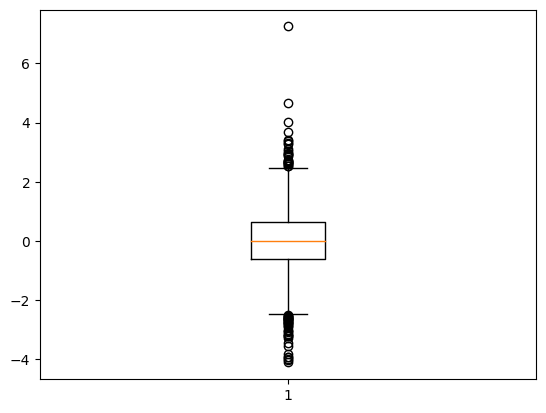

In [306]:
plt.boxplot(pca_dataframe.PC8)
Q1 = pca_dataframe.PC8.quantile(0.25)
Q3 = pca_dataframe.PC8.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe= pca_dataframe[(pca_dataframe.PC8 >= Q1 - 1.5*IQR) & (pca_dataframe.PC8 <= Q3 + 1.5*IQR)]
plt.show()

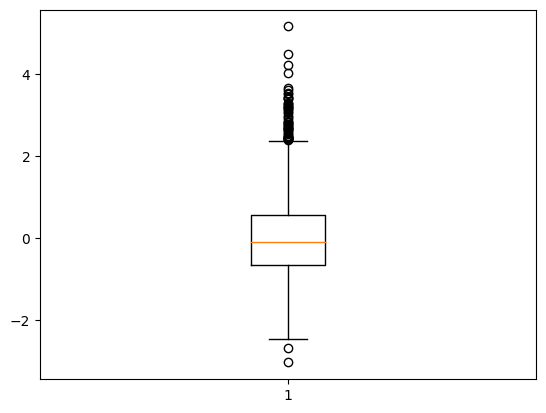

In [307]:
plt.boxplot(pca_dataframe.PC9)
Q1 = pca_dataframe.PC9.quantile(0.25)
Q3 = pca_dataframe.PC9.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC9 >= Q1 - 1.5*IQR) & (pca_dataframe.PC9 <= Q3 + 1.5*IQR)]
plt.show()

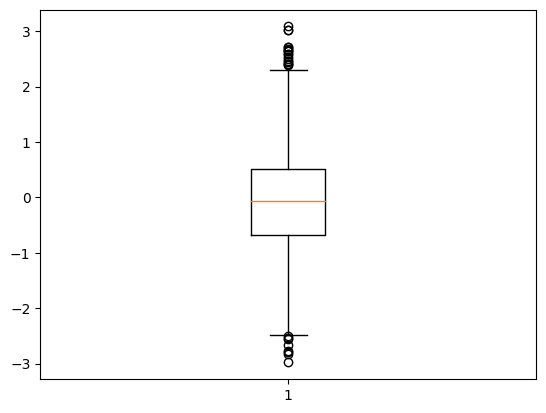

In [308]:
plt.boxplot(pca_dataframe.PC10)
Q1 = pca_dataframe.PC10.quantile(0.25)
Q3 = pca_dataframe.PC10.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC10 >= Q1 - 1.5*IQR) & (pca_dataframe.PC10 <= Q3 + 1.5*IQR)]
plt.show()

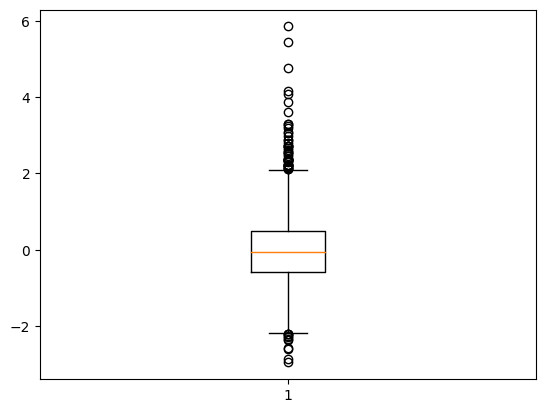

In [309]:
plt.boxplot(pca_dataframe.PC11)
Q1 = pca_dataframe.PC11.quantile(0.25)
Q3 = pca_dataframe.PC11.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC11 >= Q1 - 1.5*IQR) & (pca_dataframe.PC11 <= Q3 + 1.5*IQR)]
plt.show()

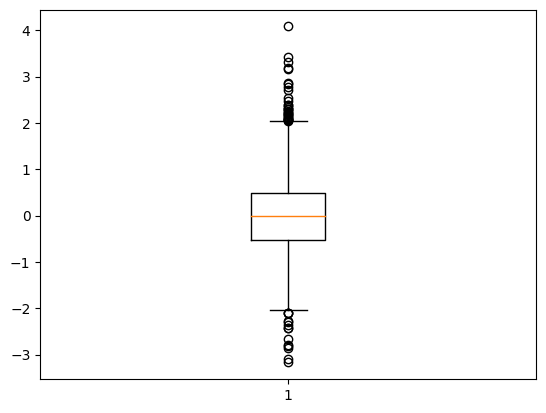

In [310]:
plt.boxplot(pca_dataframe.PC12)
Q1 = pca_dataframe.PC12.quantile(0.25)
Q3 = pca_dataframe.PC12.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC12 >= Q1 - 1.5*IQR) & (pca_dataframe.PC12 <= Q3 + 1.5*IQR)]
plt.show()

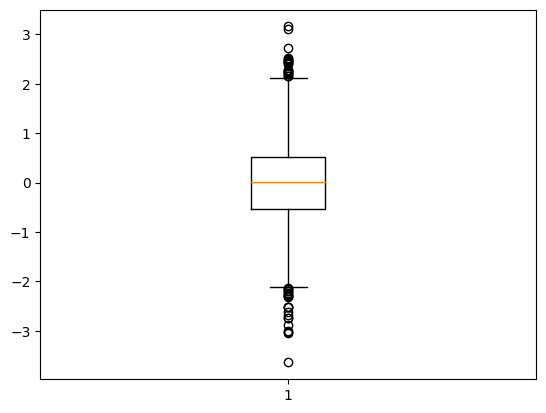

In [311]:
plt.boxplot(pca_dataframe.PC13)
Q1 = pca_dataframe.PC13.quantile(0.25)
Q3 = pca_dataframe.PC13.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC13 >= Q1 - 1.5*IQR) & (pca_dataframe.PC13 <= Q3 + 1.5*IQR)]
plt.show()

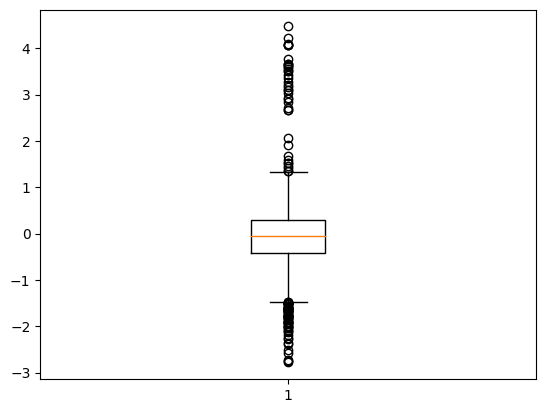

In [312]:
plt.boxplot(pca_dataframe.PC14)
Q1 = pca_dataframe.PC14.quantile(0.25)
Q3 = pca_dataframe.PC14.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC14 >= Q1 - 1.5*IQR) & (pca_dataframe.PC14 <= Q3 + 1.5*IQR)]
plt.show()

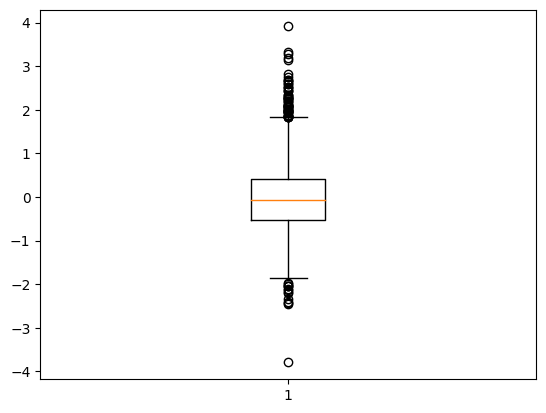

In [313]:
plt.boxplot(pca_dataframe.PC15)
Q1 = pca_dataframe.PC15.quantile(0.25)
Q3 = pca_dataframe.PC15.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe= pca_dataframe[(pca_dataframe.PC15 >= Q1 - 1.5*IQR) & (pca_dataframe.PC15 <= Q3 + 1.5*IQR)]
plt.show()

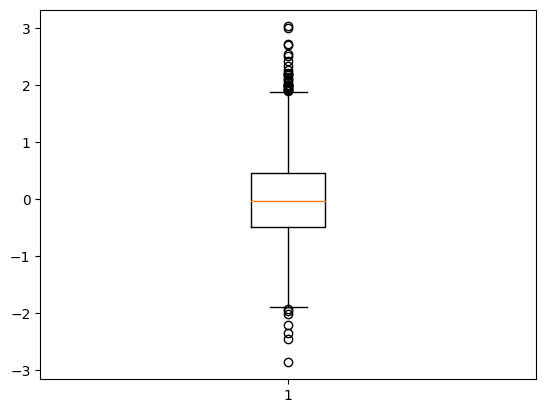

In [314]:
plt.boxplot(pca_dataframe.PC16)
Q1 = pca_dataframe.PC16.quantile(0.25)
Q3 = pca_dataframe.PC16.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC16 >= Q1 - 1.5*IQR) & (pca_dataframe.PC16 <= Q3 + 1.5*IQR)]
plt.show()

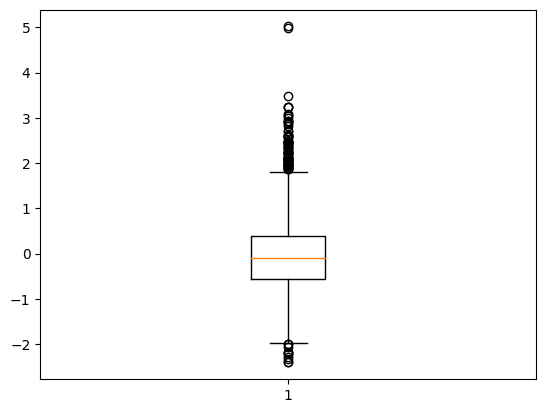

In [315]:
plt.boxplot(pca_dataframe.PC17)
Q1 = pca_dataframe.PC17.quantile(0.25)
Q3 = pca_dataframe.PC17.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC17 >= Q1 - 1.5*IQR) & (pca_dataframe.PC17 <= Q3 + 1.5*IQR)]
plt.show()

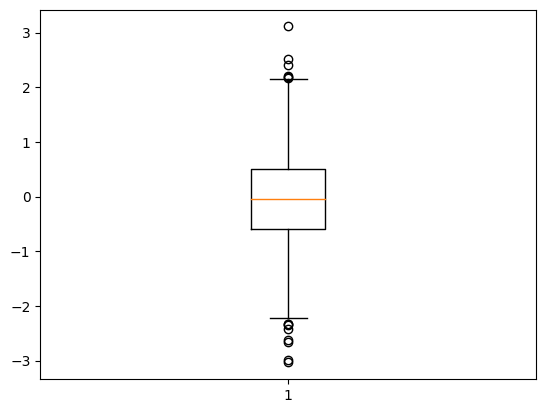

In [316]:
plt.boxplot(pca_dataframe.PC18)
Q1 = pca_dataframe.PC18.quantile(0.25)
Q3 = pca_dataframe.PC18.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC18 >= Q1 - 1.5*IQR) & (pca_dataframe.PC18 <= Q3 + 1.5*IQR)]
plt.show()

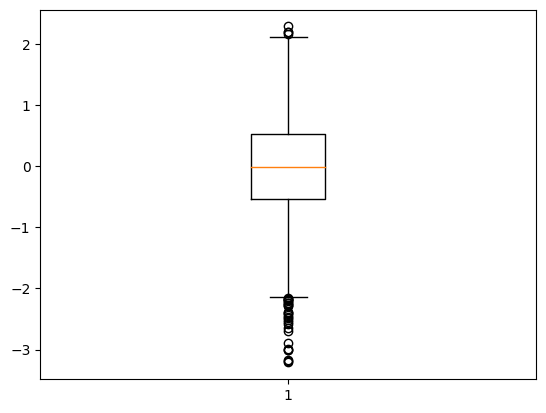

In [317]:
plt.boxplot(pca_dataframe.PC19)
Q1 = pca_dataframe.PC19.quantile(0.25)
Q3 = pca_dataframe.PC19.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC19 >= Q1 - 1.5*IQR) & (pca_dataframe.PC19 <= Q3 + 1.5*IQR)]
plt.show()

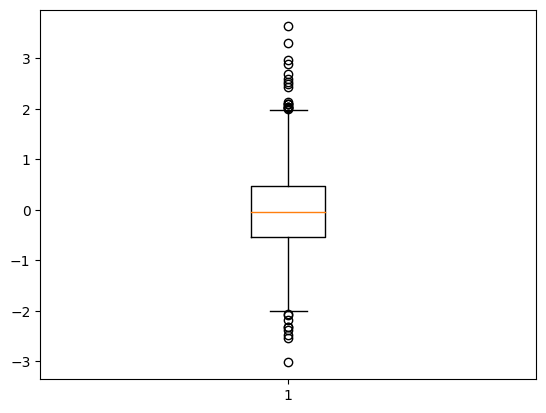

In [318]:
plt.boxplot(pca_dataframe.PC20)
Q1 = pca_dataframe.PC20.quantile(0.25)
Q3 = pca_dataframe.PC20.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC20 >= Q1 - 1.5*IQR) & (pca_dataframe.PC20 <= Q3 + 1.5*IQR)]
plt.show()

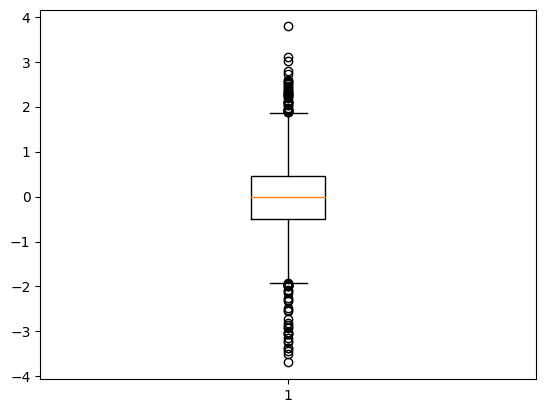

In [319]:
plt.boxplot(pca_dataframe.PC21)
Q1 = pca_dataframe.PC21.quantile(0.25)
Q3 = pca_dataframe.PC21.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC21 >= Q1 - 1.5*IQR) & (pca_dataframe.PC21 <= Q3 + 1.5*IQR)]
plt.show()

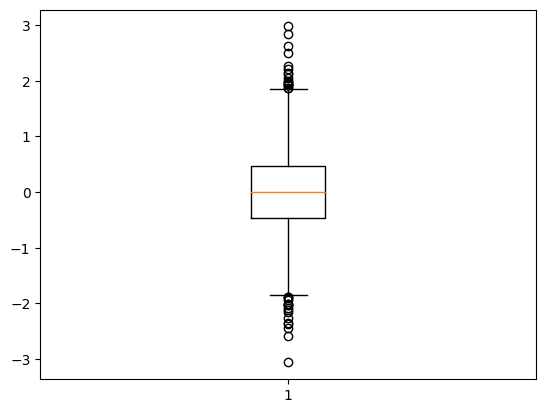

In [320]:
plt.boxplot(pca_dataframe.PC22)
Q1 = pca_dataframe.PC22.quantile(0.25)
Q3 = pca_dataframe.PC22.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC22 >= Q1 - 1.5*IQR) & (pca_dataframe.PC22 <= Q3 + 1.5*IQR)]
plt.show()

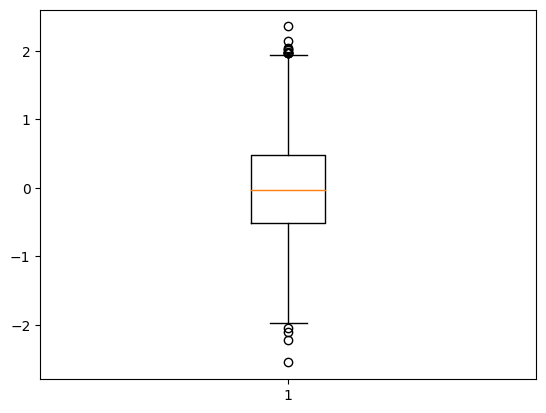

In [321]:
plt.boxplot(pca_dataframe.PC23)
Q1 = pca_dataframe.PC23.quantile(0.25)
Q3 = pca_dataframe.PC23.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC23 >= Q1 - 1.5*IQR) & (pca_dataframe.PC23 <= Q3 + 1.5*IQR)]
plt.show()

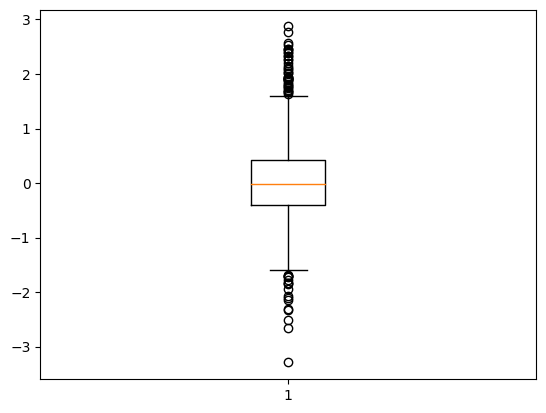

In [322]:
plt.boxplot(pca_dataframe.PC24)
Q1 = pca_dataframe.PC24.quantile(0.25)
Q3 = pca_dataframe.PC24.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC24 >= Q1 - 1.5*IQR) & (pca_dataframe.PC24 <= Q3 + 1.5*IQR)]
plt.show()

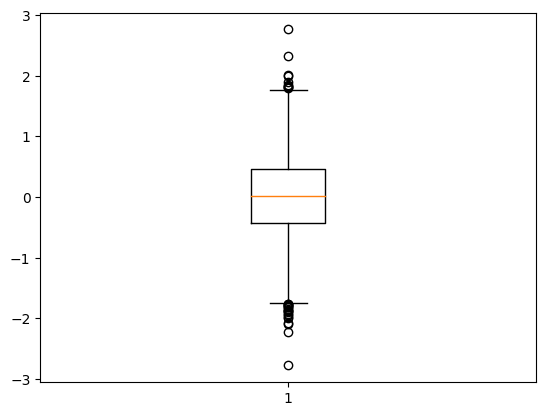

In [323]:
plt.boxplot(pca_dataframe.PC25)
Q1 = pca_dataframe.PC25.quantile(0.25)
Q3 = pca_dataframe.PC25.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC25 >= Q1 - 1.5*IQR) & (pca_dataframe.PC25 <= Q3 + 1.5*IQR)]
plt.show()

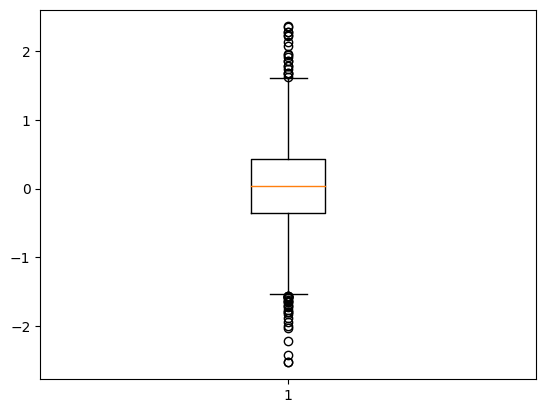

In [324]:
plt.boxplot(pca_dataframe.PC26)
Q1 = pca_dataframe.PC26.quantile(0.25)
Q3 = pca_dataframe.PC26.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC26 >= Q1 - 1.5*IQR) & (pca_dataframe.PC26 <= Q3 + 1.5*IQR)]
plt.show()

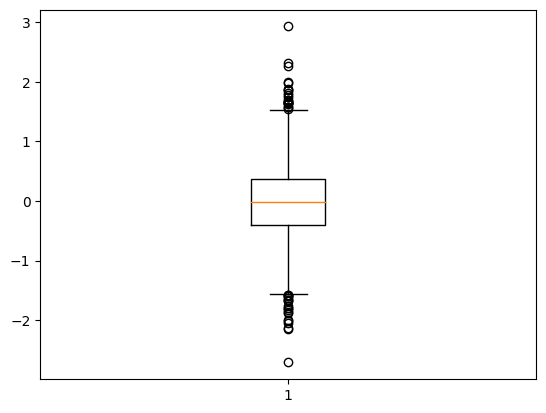

In [325]:
plt.boxplot(pca_dataframe.PC27)
Q1 = pca_dataframe.PC27.quantile(0.25)
Q3 = pca_dataframe.PC27.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC27 >= Q1 - 1.5*IQR) & (pca_dataframe.PC27 <= Q3 + 1.5*IQR)]
plt.show()

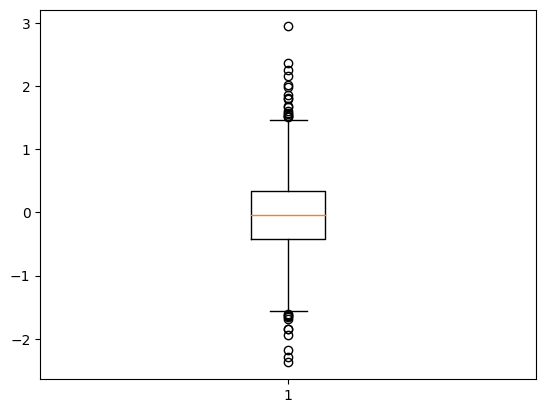

In [326]:
plt.boxplot(pca_dataframe.PC28)
Q1 = pca_dataframe.PC28.quantile(0.25)
Q3 = pca_dataframe.PC28.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe= pca_dataframe[(pca_dataframe.PC28 >= Q1 - 1.5*IQR) & (pca_dataframe.PC28 <= Q3 + 1.5*IQR)]
plt.show()

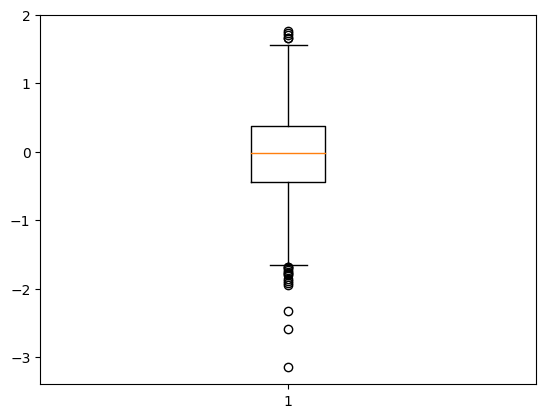

In [327]:
plt.boxplot(pca_dataframe.PC29)
Q1 = pca_dataframe.PC29.quantile(0.25)
Q3 = pca_dataframe.PC29.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC29 >= Q1 - 1.5*IQR) & (pca_dataframe.PC29 <= Q3 + 1.5*IQR)]
plt.show()

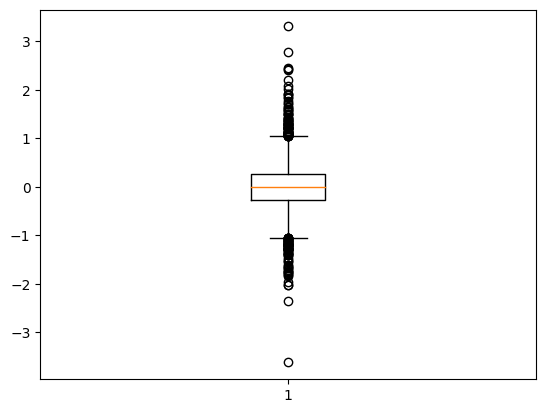

In [328]:
plt.boxplot(pca_dataframe.PC30)
Q1 = pca_dataframe.PC30.quantile(0.25)
Q3 = pca_dataframe.PC30.quantile(0.75)
IQR = Q3 - Q1
pca_dataframe = pca_dataframe[(pca_dataframe.PC30 >= Q1 - 1.5*IQR) & (pca_dataframe.PC30 <= Q3 + 1.5*IQR)]
plt.show()

In [329]:
# Check the shape of the dataset
pca_dataframe.shape

(2022, 31)

In [330]:
# Making provider dataset
provider_1 = pd.DataFrame(pca_dataframe["Provider ID"])

In [331]:
# Drop the provider ID to proceed with clustering
pca_dataframe = pca_dataframe.drop(['Provider ID'],1)
pca_dataframe

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
1     2.523057  1.535194  2.072356 -0.974311  1.071333  0.740672  0.924230   
2     3.159210 -0.411730 -1.003491 -2.047033  0.982577  1.072525 -1.088508   
3    -2.209012  2.869897  0.413703  1.718694  0.877342  1.093745 -1.837763   
4    -5.197569  0.840449 -2.087396  1.451486 -0.390197 -0.789553 -2.116200   
7     3.641555 -0.510727 -0.571426 -0.952618  2.362091  0.568243 -1.068801   
...        ...       ...       ...       ...       ...       ...       ...   
3638  0.524128  0.138461  1.682668 -0.634061  0.755209  0.039591 -0.150658   
3639  1.528176 -1.121127 -0.335828 -0.652219 -1.697984  0.339741 -1.632872   
3641  1.347576 -0.184093  1.007496 -1.054257  0.185796 -0.038838 -0.830131   
3642 -3.765117 -0.297511 -2.147333  0.715829 -0.615351  1.348703 -0.647667   
3643 -3.311121  0.011900 -1.678899 -1.457666 -2.711159  0.673154 -1.814711   

           PC8       PC9      PC10  ...      PC21      PC22      PC23  \
1    -0.603819 -1.210139 -0.249087  ...  0.017987  0.520117 -0.631096   
2     0.181333 -0.273746 -1.202890  ... -1.342731  1.027495  0.112044   
3    -0.365285  0.228626  0.702780  ...  0.314153 -0.367608  0.844359   
4     0.488144  0.323963 -0.860497  ... -1.178240 -0.701378 -0.822633   
7     0.147050 -0.599825 -0.159066  ... -0.176599  0.496704 -1.042703   
...        ...       ...       ...  ...       ...       ...       ...   
3638  1.086915  0.090566  0.468298  ...  0.562535  0.381652  0.525908   
3639 -0.551262 -0.344934  0.451435  ... -0.151545  0.144717 -0.008519   
3641  1.165135  0.131142  0.152035  ... -0.821692 -0.018191 -0.339719   
3642  0.730732 -0.798995  0.551426  ...  1.561316  0.166508 -0.849034   
3643  0.254029 -0.910994  1.833321  ...  0.123975 -0.209326 -0.434375   

          PC24      PC25      PC26      PC27      PC28      PC29      PC30  
1     0.234696  0.208867 -0.478368 -1.099142  0.636289  0.864221  0.088463  
2     1.175422 -1.026101 -0.249708 -0.727875  0.521395  0.716684  1.030721  
3     0.273561  0.366564 -0.901863  1.309857  0.612574 -0.493739 -0.058538  
4     0.448409  0.156849 -0.224975  0.171658  0.350553 -1.453870 -0.235723  
7     1.071279 -0.749089 -0.450500  0.316298 -0.469595  0.753097  0.512959  
...        ...       ...       ...       ...       ...       ...       ...  
3638 -0.677878 -0.511269  0.540325  0.549993 -0.207103 -0.958171  0.292999  
3639  0.552286  1.023589 -0.306549 -0.132454  0.312292 -1.475666  0.585375  
3641  0.266946 -0.300966 -0.126925  0.470634  0.844748 -0.203068 -0.187274  
3642  1.015887 -0.692578 -0.701179 -0.003170  0.913831  0.010988 -0.049772  
3643  0.031512 -0.624519 -0.194083 -0.771451 -0.973628  1.313319 -0.149693  

[2022 rows x 30 columns]

### Hopkins Statistics
Hopkins Statistics help us to decide whether the cluters can be formed easily or not. If the values are:
- 0.01 - 0.3 : Low chase of clustering
- around 0.5 : Random 
- 0.7 - 0.99 : High chance of clustering

In [332]:
#Import useful libraries
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [333]:
hopkins(pca_dataframe)

0.7022664533313555

Since the value is 0.7 and is between 0.7 - 0.99, there is a high chance of clustering to be formed

### K- Means

In [334]:
# Import library for KMeans clustering 
from sklearn.cluster import KMeans

In [335]:
# Kmeans with K=3
model_clus4 = KMeans(n_clusters = 3, max_iter=50)
model_clus4.fit(pca_dataframe)

KMeans(max_iter=50, n_clusters=3)

### Silhouette Analysis
- Value of the silhouette score range is in between -1 to 1.
- A score closer to 1 : The data point is very similar to other data points in the cluster
- A score closer to -1 : The data point is not similar to the data points in its cluster.

In [336]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(pca_dataframe)
    sse_.append([k, silhouette_score(pca_dataframe, kmeans.labels_)])

In [337]:
no_of_clusters = [2, 3, 4, 5, 6]
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(pca_dataframe) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(pca_dataframe, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.3148907280195091
For no of clusters = 3  The average silhouette_score is : 0.20439703644233576
For no of clusters = 4  The average silhouette_score is : 0.17562002272642876
For no of clusters = 5  The average silhouette_score is : 0.14625809031298137
For no of clusters = 6  The average silhouette_score is : 0.1279006855085801


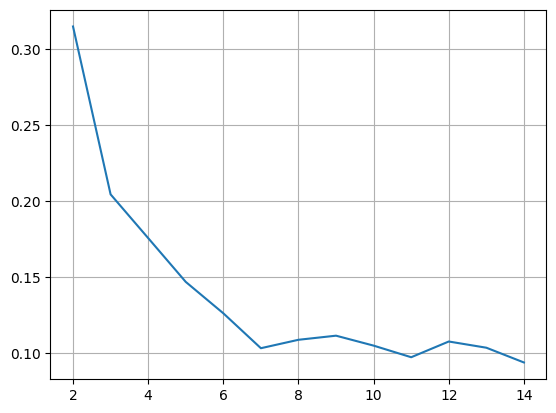

In [338]:
#Data visualization
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.grid()
plt.show()

### Sum of Squared Distances

In [339]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pca_dataframe)
    ssd.append(model_clus.inertia_)

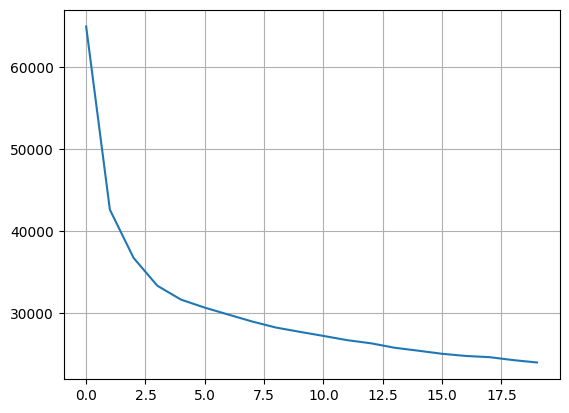

In [340]:
plt.plot(ssd)
plt.grid()
plt.show()

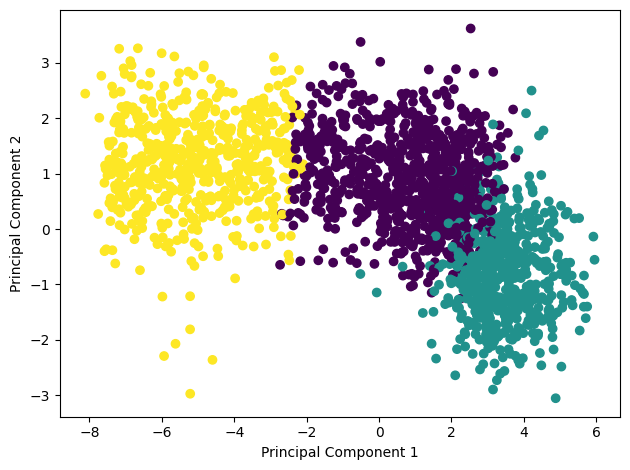

In [341]:
plt.scatter(pca_dataframe['PC1'], pca_dataframe['PC2'],c=model_clus4.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### Analysis of clusters formed

In [342]:
pca_dataframe.index = pd.RangeIndex(len(pca_dataframe.index))
pca_df_km = pd.concat([pca_dataframe, pd.Series(model_clus4.labels_)], axis=1)
pca_df_km.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30', 'ClusterID']
pca_df_km

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     2.523057  1.535194  2.072356 -0.974311  1.071333  0.740672  0.924230   
1     3.159210 -0.411730 -1.003491 -2.047033  0.982577  1.072525 -1.088508   
2    -2.209012  2.869897  0.413703  1.718694  0.877342  1.093745 -1.837763   
3    -5.197569  0.840449 -2.087396  1.451486 -0.390197 -0.789553 -2.116200   
4     3.641555 -0.510727 -0.571426 -0.952618  2.362091  0.568243 -1.068801   
...        ...       ...       ...       ...       ...       ...       ...   
2017  0.524128  0.138461  1.682668 -0.634061  0.755209  0.039591 -0.150658   
2018  1.528176 -1.121127 -0.335828 -0.652219 -1.697984  0.339741 -1.632872   
2019  1.347576 -0.184093  1.007496 -1.054257  0.185796 -0.038838 -0.830131   
2020 -3.765117 -0.297511 -2.147333  0.715829 -0.615351  1.348703 -0.647667   
2021 -3.311121  0.011900 -1.678899 -1.457666 -2.711159  0.673154 -1.814711   

           PC8       PC9      PC10  ...      PC22      PC23      PC24  \
0    -0.603819 -1.210139 -0.249087  ...  0.520117 -0.631096  0.234696   
1     0.181333 -0.273746 -1.202890  ...  1.027495  0.112044  1.175422   
2    -0.365285  0.228626  0.702780  ... -0.367608  0.844359  0.273561   
3     0.488144  0.323963 -0.860497  ... -0.701378 -0.822633  0.448409   
4     0.147050 -0.599825 -0.159066  ...  0.496704 -1.042703  1.071279   
...        ...       ...       ...  ...       ...       ...       ...   
2017  1.086915  0.090566  0.468298  ...  0.381652  0.525908 -0.677878   
2018 -0.551262 -0.344934  0.451435  ...  0.144717 -0.008519  0.552286   
2019  1.165135  0.131142  0.152035  ... -0.018191 -0.339719  0.266946   
2020  0.730732 -0.798995  0.551426  ...  0.166508 -0.849034  1.015887   
2021  0.254029 -0.910994  1.833321  ... -0.209326 -0.434375  0.031512   

          PC25      PC26      PC27      PC28      PC29      PC30  ClusterID  
0     0.208867 -0.478368 -1.099142  0.636289  0.864221  0.088463          0  
1    -1.026101 -0.249708 -0.727875  0.521395  0.716684  1.030721          1  
2     0.366564 -0.901863  1.309857  0.612574 -0.493739 -0.058538          2  
3     0.156849 -0.224975  0.171658  0.350553 -1.453870 -0.235723          2  
4    -0.749089 -0.450500  0.316298 -0.469595  0.753097  0.512959          1  
...        ...       ...       ...       ...       ...       ...        ...  
2017 -0.511269  0.540325  0.549993 -0.207103 -0.958171  0.292999          0  
2018  1.023589 -0.306549 -0.132454  0.312292 -1.475666  0.585375          1  
2019 -0.300966 -0.126925  0.470634  0.844748 -0.203068 -0.187274          0  
2020 -0.692578 -0.701179 -0.003170  0.913831  0.010988 -0.049772          2  
2021 -0.624519 -0.194083 -0.771451 -0.973628  1.313319 -0.149693          2  

[2022 rows x 31 columns]

In [343]:
#Check the shape
pca_df_km.shape

(2022, 31)

In [344]:
# Merge the country and the above dataset
pca_df_km = pd.merge(pca_df_km,provider_1,on=pca_df_km['PC1'])
pca_df_km = pca_df_km.drop('key_0', 1)
pca_df_km

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     2.523057  1.535194  2.072356 -0.974311  1.071333  0.740672  0.924230   
1     3.159210 -0.411730 -1.003491 -2.047033  0.982577  1.072525 -1.088508   
2    -2.209012  2.869897  0.413703  1.718694  0.877342  1.093745 -1.837763   
3    -5.197569  0.840449 -2.087396  1.451486 -0.390197 -0.789553 -2.116200   
4     3.641555 -0.510727 -0.571426 -0.952618  2.362091  0.568243 -1.068801   
...        ...       ...       ...       ...       ...       ...       ...   
2017  0.524128  0.138461  1.682668 -0.634061  0.755209  0.039591 -0.150658   
2018  1.528176 -1.121127 -0.335828 -0.652219 -1.697984  0.339741 -1.632872   
2019  1.347576 -0.184093  1.007496 -1.054257  0.185796 -0.038838 -0.830131   
2020 -3.765117 -0.297511 -2.147333  0.715829 -0.615351  1.348703 -0.647667   
2021 -3.311121  0.011900 -1.678899 -1.457666 -2.711159  0.673154 -1.814711   

           PC8       PC9      PC10  ...      PC23      PC24      PC25  \
0    -0.603819 -1.210139 -0.249087  ... -0.631096  0.234696  0.208867   
1     0.181333 -0.273746 -1.202890  ...  0.112044  1.175422 -1.026101   
2    -0.365285  0.228626  0.702780  ...  0.844359  0.273561  0.366564   
3     0.488144  0.323963 -0.860497  ... -0.822633  0.448409  0.156849   
4     0.147050 -0.599825 -0.159066  ... -1.042703  1.071279 -0.749089   
...        ...       ...       ...  ...       ...       ...       ...   
2017  1.086915  0.090566  0.468298  ...  0.525908 -0.677878 -0.511269   
2018 -0.551262 -0.344934  0.451435  ... -0.008519  0.552286  1.023589   
2019  1.165135  0.131142  0.152035  ... -0.339719  0.266946 -0.300966   
2020  0.730732 -0.798995  0.551426  ... -0.849034  1.015887 -0.692578   
2021  0.254029 -0.910994  1.833321  ... -0.434375  0.031512 -0.624519   

          PC26      PC27      PC28      PC29      PC30  ClusterID  Provider ID  
0    -0.478368 -1.099142  0.636289  0.864221  0.088463          0        10005  
1    -0.249708 -0.727875  0.521395  0.716684  1.030721          1        10006  
2    -0.901863  1.309857  0.612574 -0.493739 -0.058538          2        10007  
3    -0.224975  0.171658  0.350553 -1.453870 -0.235723          2        10008  
4    -0.450500  0.316298 -0.469595  0.753097  0.512959          1        10016  
...        ...       ...       ...       ...       ...        ...          ...  
2017  0.540325  0.549993 -0.207103 -0.958171  0.292999          0       670080  
2018 -0.306549 -0.132454  0.312292 -1.475666  0.585375          1       670082  
2019 -0.126925  0.470634  0.844748 -0.203068 -0.187274          0       670088  
2020 -0.701179 -0.003170  0.913831  0.010988 -0.049772          2       670092  
2021 -0.194083 -0.771451 -0.973628  1.313319 -0.149693          2       670096  

[2022 rows x 32 columns]

In [345]:
df_provider_clusterid = pd.merge(pca_df_km,merge_IDs_final,on='Provider ID',how='inner')
df_provider_clusterid

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     2.523057  1.535194  2.072356 -0.974311  1.071333  0.740672  0.924230   
1     3.159210 -0.411730 -1.003491 -2.047033  0.982577  1.072525 -1.088508   
2    -2.209012  2.869897  0.413703  1.718694  0.877342  1.093745 -1.837763   
3    -5.197569  0.840449 -2.087396  1.451486 -0.390197 -0.789553 -2.116200   
4     3.641555 -0.510727 -0.571426 -0.952618  2.362091  0.568243 -1.068801   
...        ...       ...       ...       ...       ...       ...       ...   
2017  0.524128  0.138461  1.682668 -0.634061  0.755209  0.039591 -0.150658   
2018  1.528176 -1.121127 -0.335828 -0.652219 -1.697984  0.339741 -1.632872   
2019  1.347576 -0.184093  1.007496 -1.054257  0.185796 -0.038838 -0.830131   
2020 -3.765117 -0.297511 -2.147333  0.715829 -0.615351  1.348703 -0.647667   
2021 -3.311121  0.011900 -1.678899 -1.457666 -2.711159  0.673154 -1.814711   

           PC8       PC9      PC10  ...  H_COMP_7  H_HSP_RATING  H_QUIET_HSP  \
0    -0.603819 -1.210139 -0.249087  ...         0             0            0   
1     0.181333 -0.273746 -1.202890  ...         0             0            0   
2    -0.365285  0.228626  0.702780  ...         0             0            0   
3     0.488144  0.323963 -0.860497  ...         0             0            0   
4     0.147050 -0.599825 -0.159066  ...         0             0            0   
...        ...       ...       ...  ...       ...           ...          ...   
2017  1.086915  0.090566  0.468298  ...         0             0            0   
2018 -0.551262 -0.344934  0.451435  ...         0             0            0   
2019  1.165135  0.131142  0.152035  ...         0             0            0   
2020  0.730732 -0.798995  0.551426  ...         0             0            0   
2021  0.254029 -0.910994  1.833321  ...         0             0            0   

      H_RECMND  HAI_1  HAI_2  HAI_3  HAI_4  HAI_5  HAI_6  
0            0  0.337  0.167  0.019    0.0  0.233  0.177  
1            0  0.138  0.373  0.016    0.0  0.401  0.309  
2            0  0.000  0.000  0.000    0.0  0.000  0.000  
3            0  0.000  0.000  0.000    0.0  0.000  0.029  
4            0  0.133  0.163  0.265    0.0  0.402  0.501  
...        ...    ...    ...    ...    ...    ...    ...  
2017         0  0.030  0.118  0.028    0.0  0.000  0.252  
2018         0  0.170  0.492  0.000    0.0  0.000  0.930  
2019         0  0.109  0.083  0.162    0.0  0.000  0.205  
2020         0  0.270  0.178  0.000    0.0  0.000  0.067  
2021         0  0.000  0.000  0.000    0.0  0.000  0.012  

[2022 rows x 95 columns]

In [346]:
df_provider_clusterid = df_provider_clusterid.rename(columns = {'Provider ID' : 'Provider_ID', 'Hospital overall rating' : 'Hospital_overall_rating'})

In [347]:
km_clusters_PC1 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC1.mean())
km_clusters_PC2 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC2.mean())
km_clusters_PC3 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC3.mean())
km_clusters_PC4 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC4.mean())
km_clusters_PC5 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC5.mean())
km_clusters_PC6 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC6.mean())
km_clusters_PC7 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC7.mean())
km_clusters_PC8 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC8.mean())
km_clusters_PC9 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC9.mean())
km_clusters_PC10 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC10.mean())
km_clusters_PC11 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC11.mean())
km_clusters_PC12 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC12.mean())
km_clusters_PC13 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC13.mean())
km_clusters_PC14 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC14.mean())
km_clusters_PC15 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC15.mean())
km_clusters_PC16 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC16.mean())
km_clusters_PC17 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC17.mean())
km_clusters_PC18 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC18.mean())
km_clusters_PC19 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC19.mean())
km_clusters_PC20 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC20.mean())
km_clusters_PC21 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC21.mean())
km_clusters_PC22 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC22.mean())
km_clusters_PC23 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC23.mean())
km_clusters_PC24 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC24.mean())
km_clusters_PC25 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC25.mean())
km_clusters_PC26 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC26.mean())
km_clusters_PC27 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC27.mean())
km_clusters_PC28 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC28.mean())
km_clusters_PC29 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC29.mean())
km_clusters_PC30 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC30.mean())
km_clusters_Hospital_overall_rating = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).Hospital_overall_rating.mean())
km_clusters_COMP_HIP_KNEE = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).COMP_HIP_KNEE.mean())
km_clusters_PSI_4_SURG_COMP = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PSI_4_SURG_COMP.mean())
km_clusters_PSI_90_SAFETY = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PSI_90_SAFETY.mean())
km_clusters_OP_10 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_10.mean())
km_clusters_OP_11 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_11.mean())
km_clusters_OP_13 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_13.mean())
km_clusters_OP_14 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_14.mean())
km_clusters_OP_8 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_8.mean())
km_clusters_MORT_30_AMI = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).MORT_30_AMI.mean())
km_clusters_MORT_30_CABG = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).MORT_30_CABG.mean())
km_clusters_MORT_30_COPD = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).MORT_30_COPD.mean())
km_clusters_MORT_30_HF = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).MORT_30_HF.mean())
km_clusters_MORT_30_PN = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).MORT_30_PN.mean())
km_clusters_MORT_30_STK = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).MORT_30_STK.mean())
km_clusters_READM_30_AMI = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_AMI.mean())
km_clusters_READM_30_CABG = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_CABG.mean())
km_clusters_READM_30_COPD = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_COPD.mean())
km_clusters_READM_30_HF = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_HF.mean())
km_clusters_READM_30_HIP_KNEE = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_HIP_KNEE.mean())
km_clusters_READM_30_HOSP_WIDE = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_HOSP_WIDE.mean())
km_clusters_READM_30_PN = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_PN.mean())
km_clusters_READM_30_STK = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_STK.mean())
km_clusters_CAC_3 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).CAC_3.mean())
km_clusters_ED_1b = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).ED_1b.mean())
km_clusters_ED_2b = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).ED_2b.mean())
km_clusters_IMM_2 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).IMM_2.mean())
km_clusters_IMM_3 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).IMM_3.mean())
km_clusters_OP_18b = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_18b.mean())
km_clusters_OP_20 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_20.mean())
km_clusters_OP_21 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_21.mean())
km_clusters_OP_22 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_22.mean())
km_clusters_OP_23 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_23.mean())
km_clusters_OP_3 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_3.mean())
km_clusters_OP_4 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_4.mean())
km_clusters_OP_5 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_5.mean())
km_clusters_PC_01 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC_01.mean())
km_clusters_STK_1 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).STK_1.mean())
km_clusters_STK_4 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).STK_4.mean())
km_clusters_STK_6 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).STK_6.mean())
km_clusters_STK_8 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).STK_8.mean())
km_clusters_VTE_1 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).VTE_1.mean())
km_clusters_VTE_2 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).VTE_2.mean())
km_clusters_VTE_3 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).VTE_3.mean())
km_clusters_VTE_5 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).VTE_5.mean())
km_clusters_VTE_6 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).VTE_6.mean())
km_clusters_H_CLEAN_HSP = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_CLEAN_HSP.mean())
km_clusters_H_COMP_1 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_COMP_1.mean())
km_clusters_H_COMP_2 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_COMP_2.mean())
km_clusters_H_COMP_3 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_COMP_3.mean())
km_clusters_H_COMP_4 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_COMP_4.mean())
km_clusters_H_COMP_5 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_COMP_5.mean())
km_clusters_H_COMP_6 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_COMP_6.mean())
km_clusters_H_COMP_7 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_COMP_7.mean())
km_clusters_H_HSP_RATING = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_HSP_RATING.mean())
km_clusters_H_QUIET_HSP = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_QUIET_HSP.mean())
km_clusters_H_RECMND = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_RECMND.mean())
km_clusters_HAI_1 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).HAI_1.mean())
km_clusters_HAI_2 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).HAI_2.mean())
km_clusters_HAI_3 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).HAI_3.mean())
km_clusters_HAI_4 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).HAI_4.mean())
km_clusters_HAI_5 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).HAI_5.mean())
km_clusters_HAI_6 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).HAI_6.mean())

In [348]:
df_clusters = pd.concat([ pd.Series([0,1,2]),km_clusters_PC1 ,km_clusters_PC2 ,km_clusters_PC3 ,km_clusters_PC4 ,km_clusters_PC5 ,km_clusters_PC6 ,km_clusters_PC7 ,km_clusters_PC8 ,km_clusters_PC9 ,km_clusters_PC10 ,km_clusters_PC11 ,km_clusters_PC12 ,km_clusters_PC13 ,km_clusters_PC14 ,km_clusters_PC15 ,km_clusters_PC16 ,km_clusters_PC17 ,km_clusters_PC18 ,km_clusters_PC19 ,km_clusters_PC20 ,km_clusters_PC21 ,km_clusters_PC22 ,km_clusters_PC23 ,km_clusters_PC24 ,km_clusters_PC25 ,km_clusters_PC26 ,km_clusters_PC27 ,km_clusters_PC28 ,km_clusters_PC29 ,km_clusters_PC30 ,km_clusters_Hospital_overall_rating ,km_clusters_COMP_HIP_KNEE ,km_clusters_PSI_4_SURG_COMP ,km_clusters_PSI_90_SAFETY ,km_clusters_OP_10 ,km_clusters_OP_11 ,km_clusters_OP_13 ,km_clusters_OP_14 ,km_clusters_OP_8 ,km_clusters_MORT_30_AMI ,km_clusters_MORT_30_CABG ,km_clusters_MORT_30_COPD ,km_clusters_MORT_30_HF ,km_clusters_MORT_30_PN ,km_clusters_MORT_30_STK ,km_clusters_READM_30_AMI ,km_clusters_READM_30_CABG ,km_clusters_READM_30_COPD ,km_clusters_READM_30_HF ,km_clusters_READM_30_HIP_KNEE ,km_clusters_READM_30_HOSP_WIDE ,km_clusters_READM_30_PN ,km_clusters_READM_30_STK ,km_clusters_CAC_3 ,km_clusters_ED_1b ,km_clusters_ED_2b ,km_clusters_IMM_2 ,km_clusters_IMM_3 ,km_clusters_OP_18b ,km_clusters_OP_20 ,km_clusters_OP_21 ,km_clusters_OP_22 ,km_clusters_OP_23 ,km_clusters_OP_3 ,km_clusters_OP_4 ,km_clusters_OP_5 ,km_clusters_PC_01 ,km_clusters_STK_1 ,km_clusters_STK_4 ,km_clusters_STK_6 ,km_clusters_STK_8 ,km_clusters_VTE_1 ,km_clusters_VTE_2 ,km_clusters_VTE_3 ,km_clusters_VTE_5 ,km_clusters_VTE_6 ,km_clusters_H_CLEAN_HSP ,km_clusters_H_COMP_1 ,km_clusters_H_COMP_2 ,km_clusters_H_COMP_3 ,km_clusters_H_COMP_4 ,km_clusters_H_COMP_5 ,km_clusters_H_COMP_6 ,km_clusters_H_COMP_7 ,km_clusters_H_HSP_RATING ,km_clusters_H_QUIET_HSP ,km_clusters_H_RECMND ,km_clusters_HAI_1 ,km_clusters_HAI_2 ,km_clusters_HAI_3 ,km_clusters_HAI_4 ,km_clusters_HAI_5 ,km_clusters_HAI_6],axis = 1)
df_clusters.columns = ['ClusterID','PC1_mean', 'PC2_mean', 'PC3_mean', 'PC4_mean', 'PC5_mean', 'PC6_mean', 'PC7_mean', 'PC8_mean', 'PC9_mean', 'PC10_mean','PC11_mean', 'PC12_mean', 'PC13_mean', 'PC14_mean','PC15_mean', 'PC16_mean', 'PC17_mean', 'PC18_mean', 'PC19_mean','PC20_mean', 'PC21_mean', 'PC22_mean', 'PC23_mean', 'PC24_mean', 'PC25_mean', 'PC26_mean', 'PC27_mean', 'PC28_mean','PC29_mean', 'PC30_mean',  'Hospital_overall_rating_mean','COMP_HIP_KNEE_mean', 'PSI_4_SURG_COMP_mean', 'PSI_90_SAFETY_mean', 'OP_10_mean', 'OP_11_mean','OP_13_mean', 'OP_14_mean', 'OP_8_mean', 'MORT_30_AMI_mean','MORT_30_CABG_mean', 'MORT_30_COPD_mean','MORT_30_HF_mean', 'MORT_30_PN_mean', 'MORT_30_STK_mean', 'READM_30_AMI_mean','READM_30_CABG_mean', 'READM_30_COPD_mean', 'READM_30_HF_mean', 'READM_30_HIP_KNEE_mean','READM_30_HOSP_WIDE_mean', 'READM_30_PN_mean','READM_30_STK_mean', 'CAC_3_mean', 'ED_1b_mean','ED_2b_mean', 'IMM_2_mean', 'IMM_3_mean', 'OP_18b_mean','OP_20_mean', 'OP_21_mean', 'OP_22_mean', 'OP_23_mean','OP_3_mean', 'OP_4_mean', 'OP_5_mean', 'PC_01_mean', 'STK_1_mean', 'STK_4_mean', 'STK_6_mean', 'STK_8_mean','VTE_1_mean', 'VTE_2_mean', 'VTE_3_mean', 'VTE_5_mean','VTE_6_mean', 'H_CLEAN_HSP_mean', 'H_COMP_1_mean','H_COMP_2_mean', 'H_COMP_3_mean', 'H_COMP_4_mean','H_COMP_5_mean', 'H_COMP_6_mean', 'H_COMP_7_mean','H_HSP_RATING_mean', 'H_QUIET_HSP_mean','H_RECMND_mean', 'HAI_1_mean', 'HAI_2_mean', 'HAI_3_mean','HAI_4_mean', 'HAI_5_mean', 'HAI_6_mean']
df_clusters

ClusterID  PC1_mean  PC2_mean  PC3_mean  PC4_mean  PC5_mean  PC6_mean  \
0          0  0.780338  0.904020  1.716533 -0.365871 -0.394713  0.061977   
1          1  3.439531 -0.811238 -0.726440 -0.807381  0.380242 -0.295225   
2          2 -5.080785  1.213197 -1.042318 -0.201814 -0.025292 -0.524885   

   PC7_mean  PC8_mean  PC9_mean  ...  H_COMP_7_mean  H_HSP_RATING_mean  \
0 -0.072332  0.074827 -0.085602  ...              0                  0   
1 -0.556264  0.210762 -0.305069  ...              0                  0   
2 -0.179335 -0.057660  0.230215  ...              0                  0   

   H_QUIET_HSP_mean  H_RECMND_mean  HAI_1_mean  HAI_2_mean  HAI_3_mean  \
0                 0              0    0.050123    0.066397    0.095832   
1                 0              0    0.215723    0.263687    0.316545   
2                 0              0    0.002690    0.005525    0.003503   

   HAI_4_mean  HAI_5_mean  HAI_6_mean  
0    0.005007    0.048329    0.409090  
1    0.071624    0.270062    0.695737  
2    0.000164    0.000621    0.058540  

[3 rows x 94 columns]

### Plotting

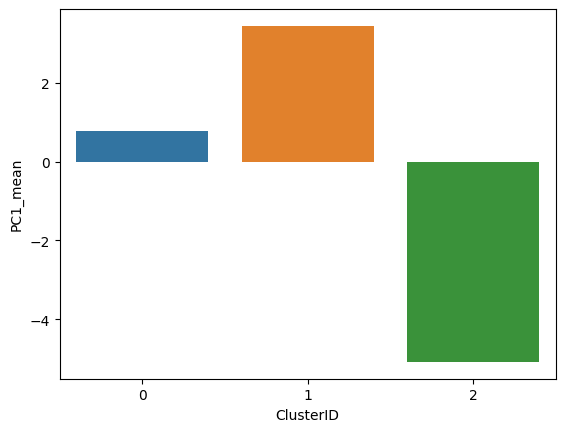

In [349]:
#Check and visualize the plotting
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC1_mean)
plt.show()

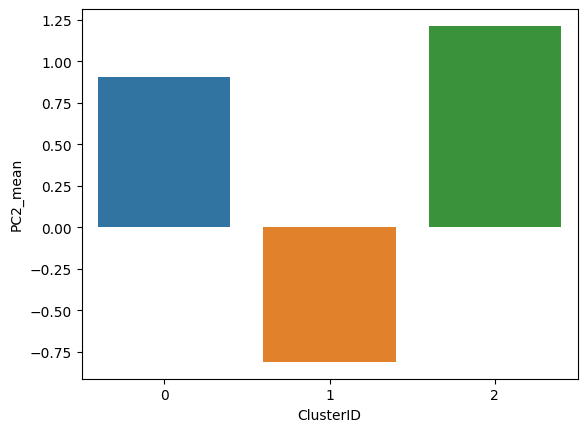

In [350]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC2_mean)
plt.show()

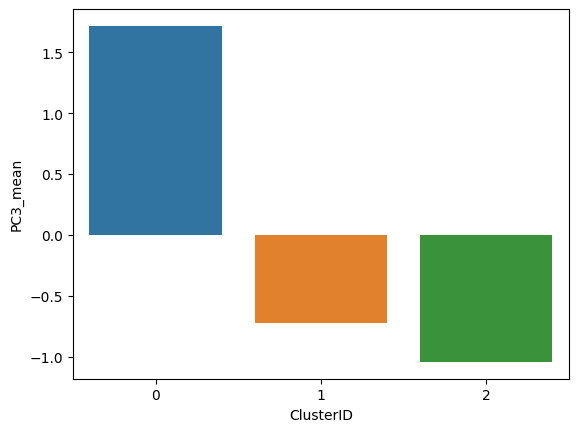

In [351]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC3_mean)
plt.show()

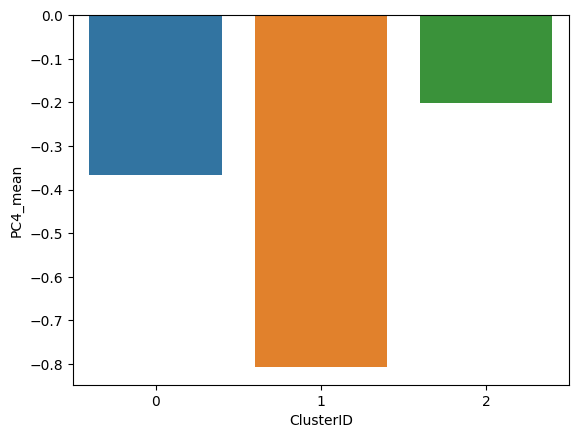

In [352]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC4_mean)
plt.show()

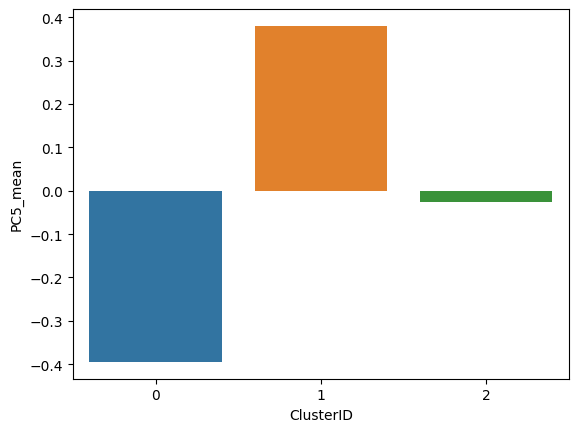

In [353]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC5_mean)
plt.show()

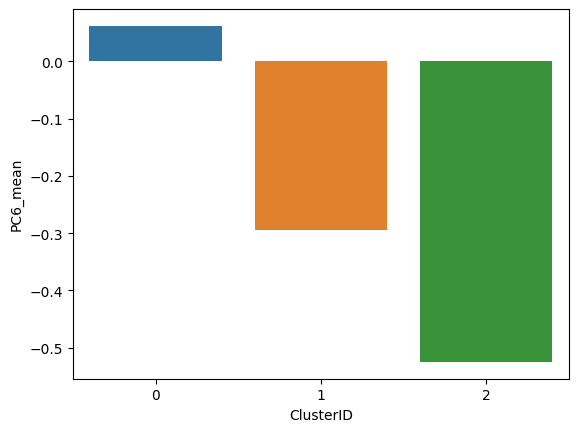

In [354]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC6_mean)
plt.show()

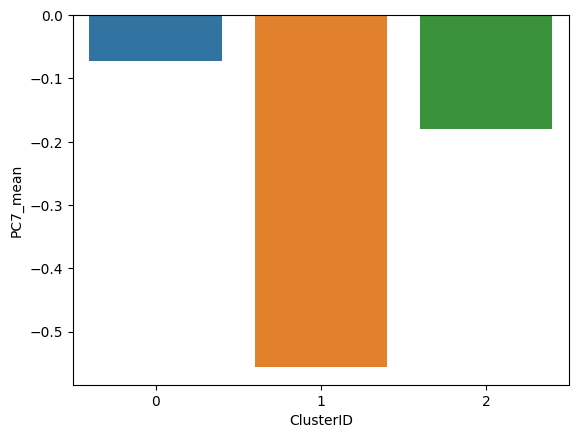

In [355]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC7_mean)
plt.show()

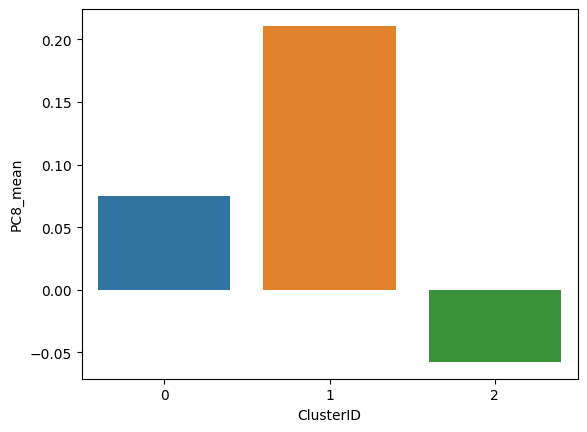

In [356]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC8_mean)
plt.show()

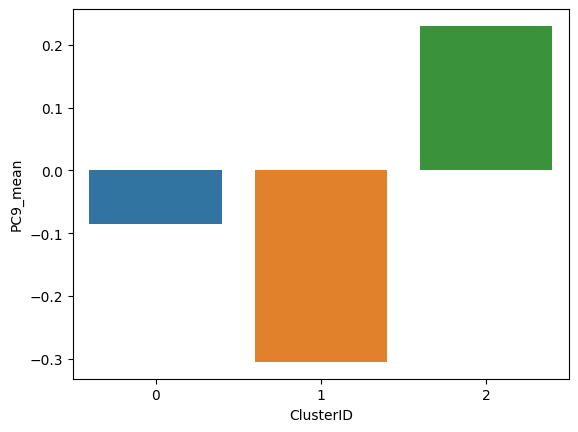

In [357]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC9_mean)
plt.show()

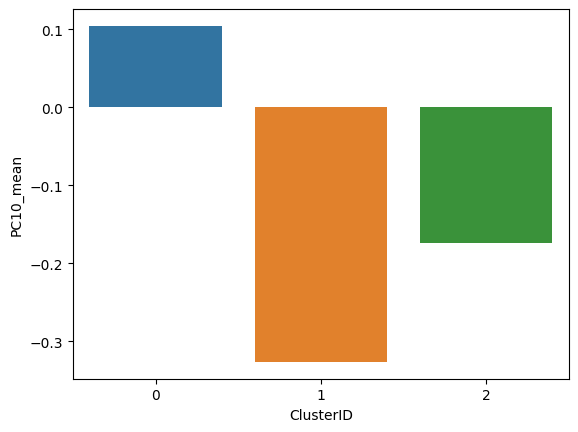

In [358]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC10_mean)
plt.show()

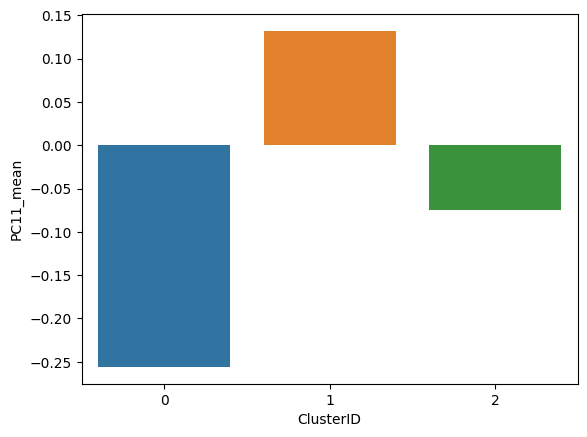

In [359]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC11_mean)
plt.show()

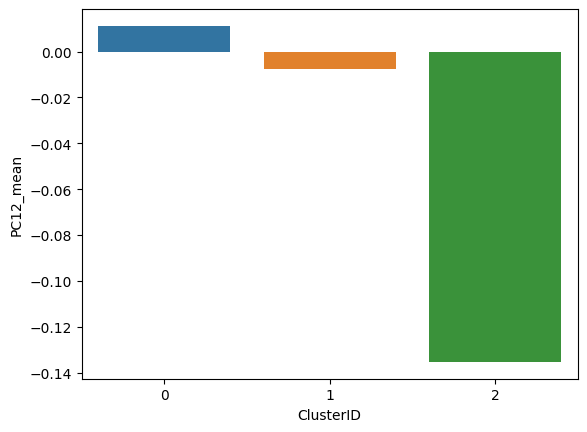

In [360]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC12_mean)
plt.show()

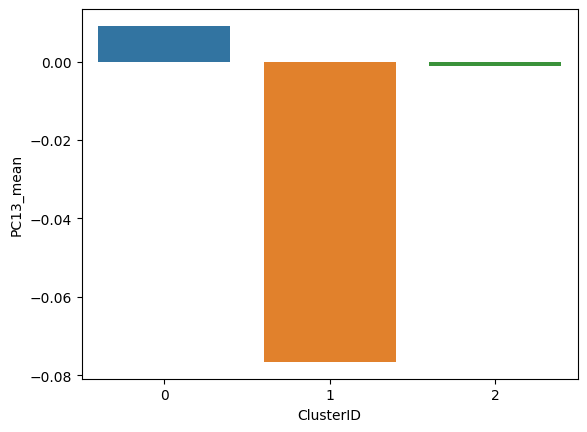

In [361]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC13_mean)
plt.show()

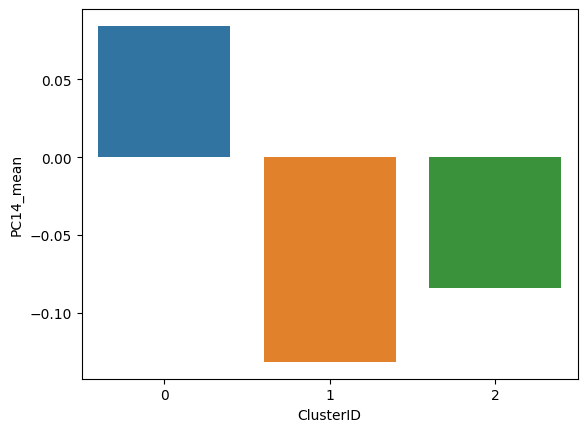

In [362]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC14_mean)
plt.show()

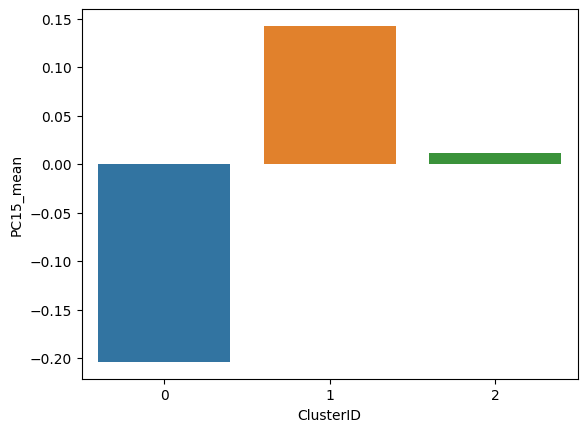

In [363]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC15_mean)
plt.show()

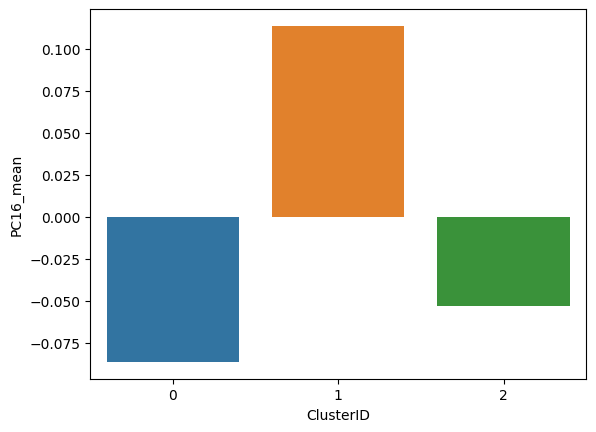

In [364]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC16_mean)
plt.show()

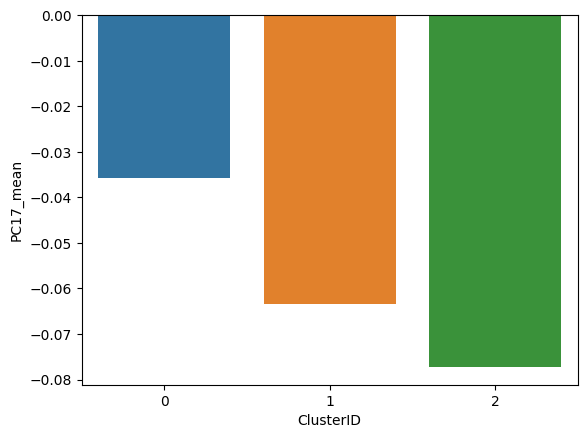

In [365]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC17_mean)
plt.show()

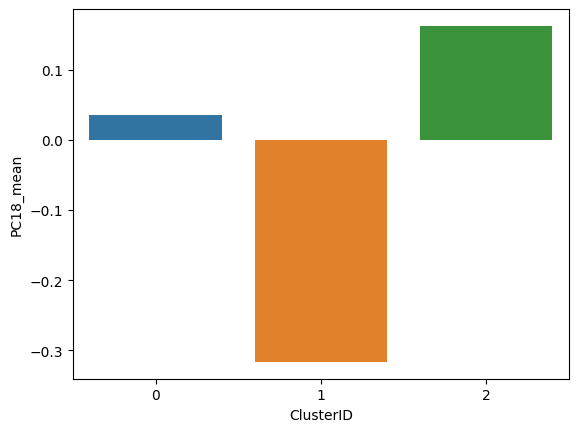

In [366]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC18_mean)
plt.show()

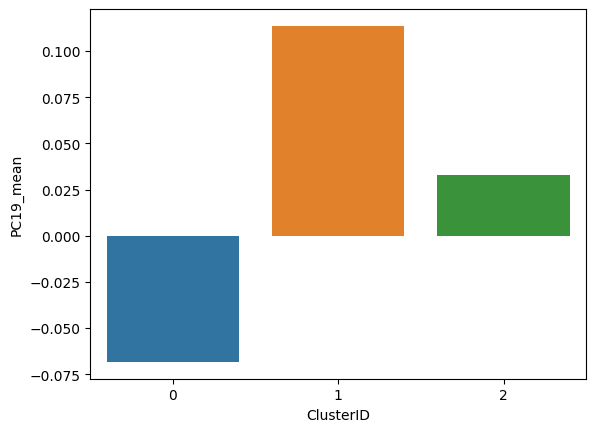

In [367]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC19_mean)
plt.show()

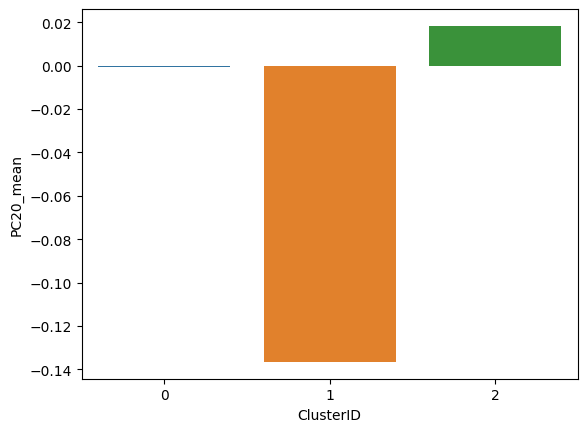

In [368]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC20_mean)
plt.show()

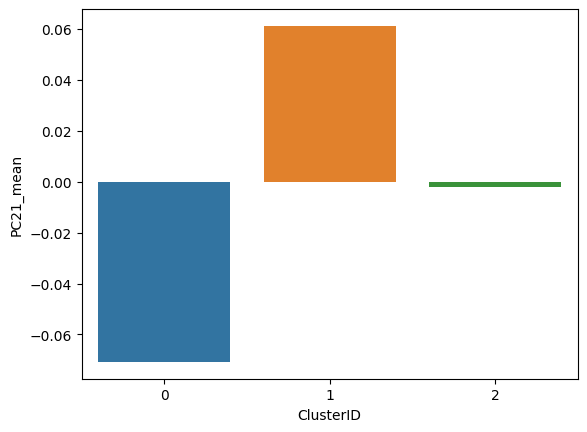

In [369]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC21_mean)
plt.show()

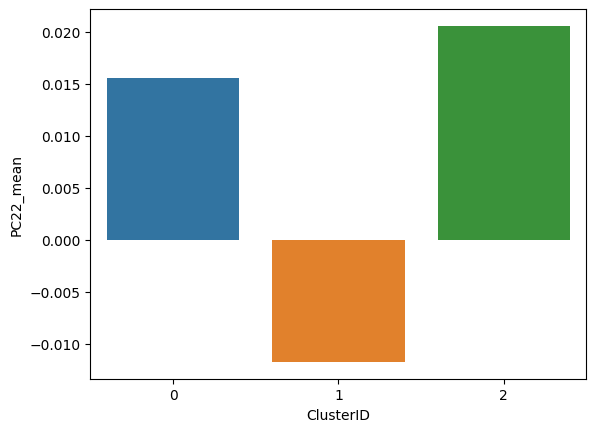

In [370]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC22_mean)
plt.show()

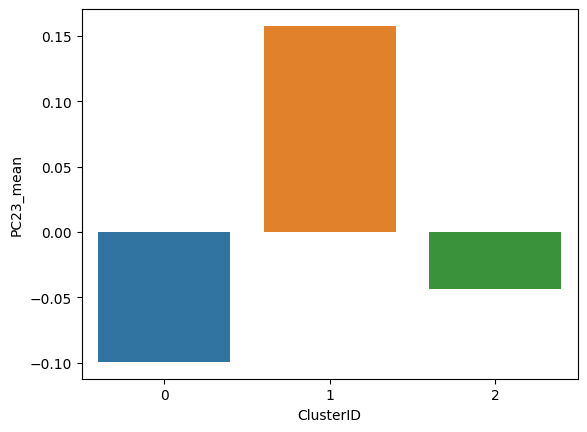

In [371]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC23_mean)
plt.show()

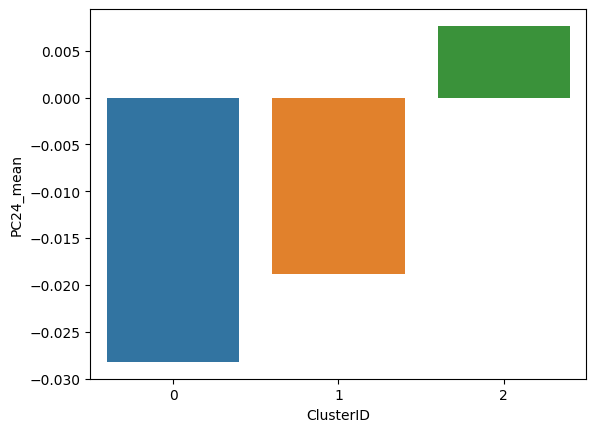

In [372]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC24_mean)
plt.show()

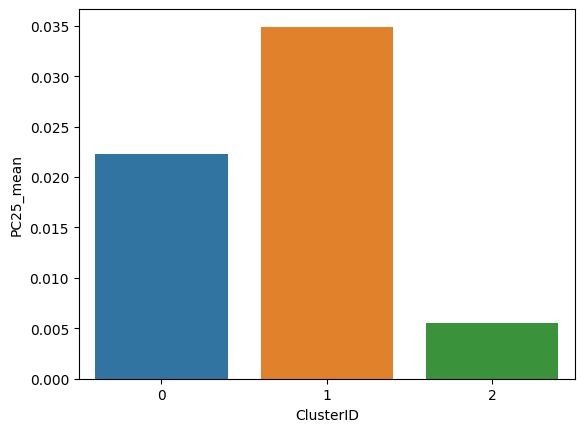

In [373]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC25_mean)
plt.show()

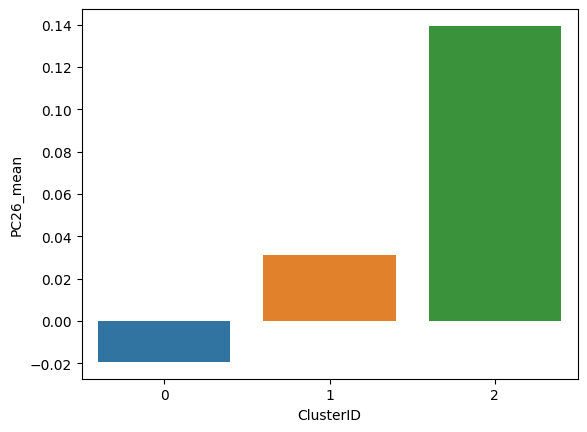

In [374]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC26_mean)
plt.show()

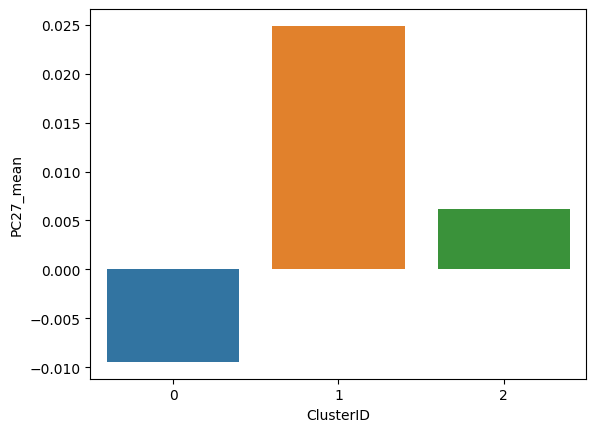

In [375]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC27_mean)
plt.show()

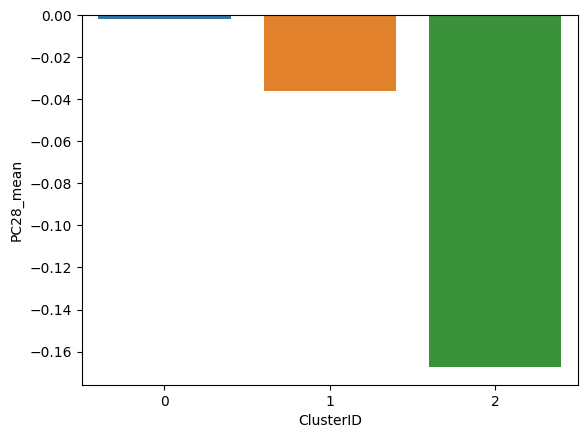

In [376]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC28_mean)
plt.show()

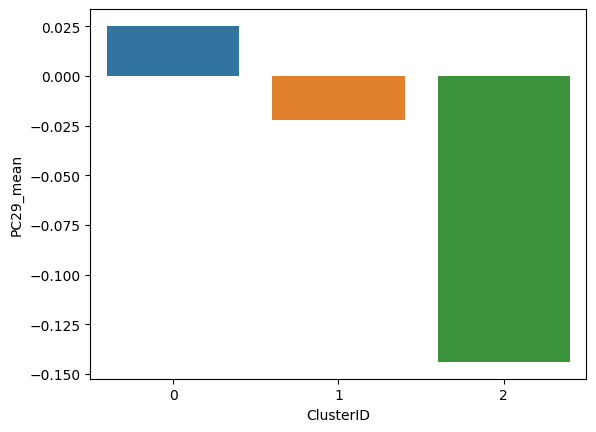

In [377]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC29_mean)
plt.show()

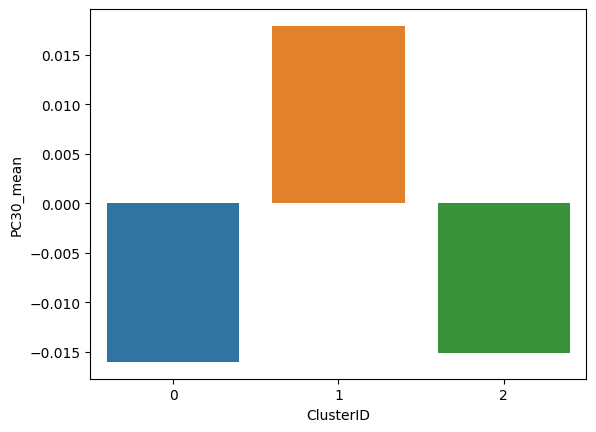

In [378]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC30_mean)
plt.show()

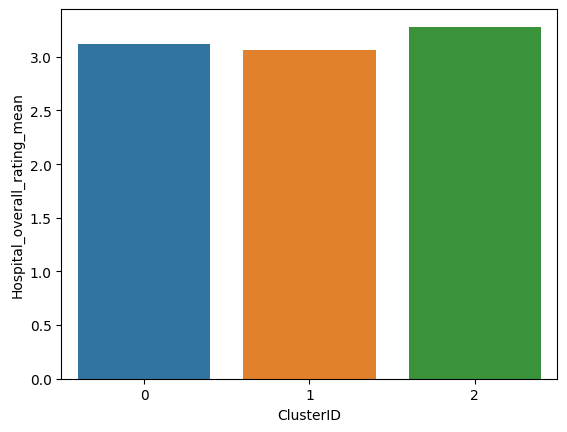

In [379]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.Hospital_overall_rating_mean)
plt.show()

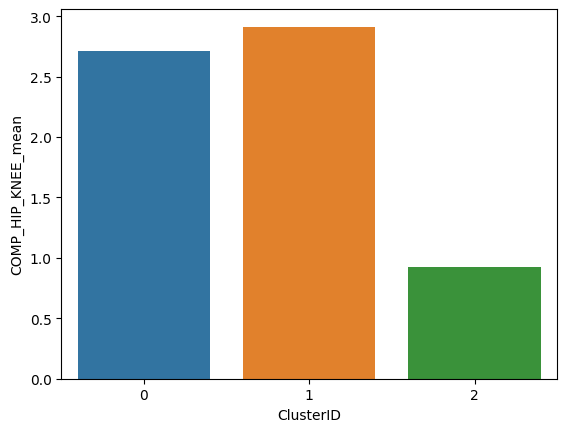

In [380]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.COMP_HIP_KNEE_mean)
plt.show()

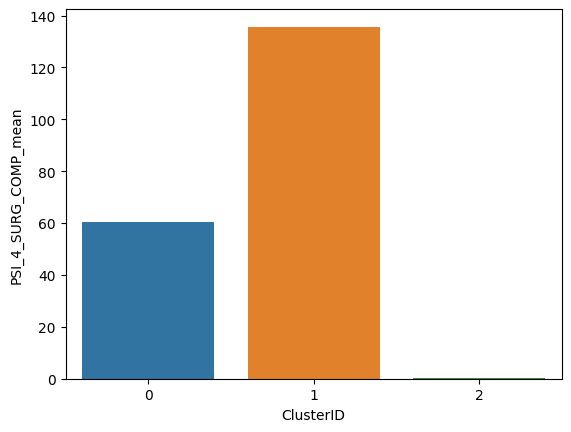

In [381]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PSI_4_SURG_COMP_mean)
plt.show()

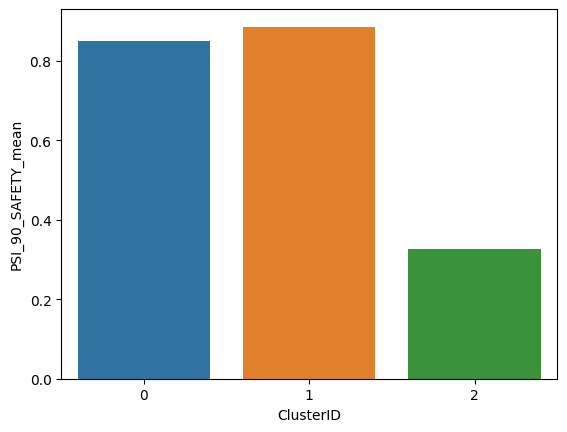

In [382]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PSI_90_SAFETY_mean)
plt.show()

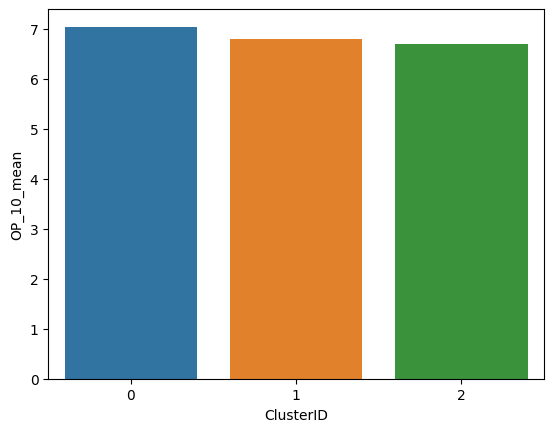

In [383]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.OP_10_mean)
plt.show()

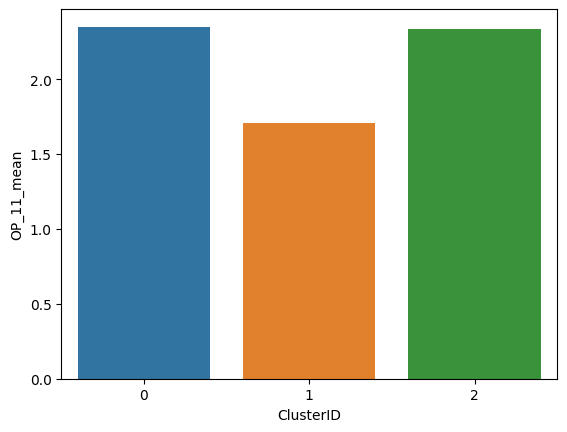

In [384]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.OP_11_mean)
plt.show()

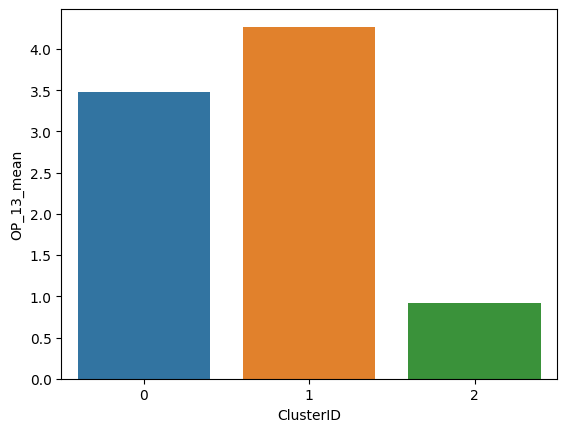

In [385]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.OP_13_mean)
plt.show()

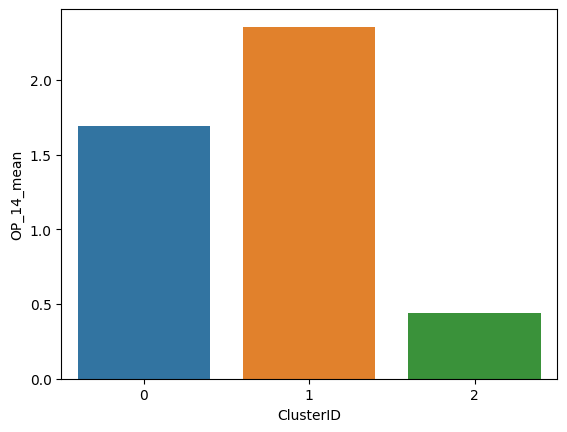

In [386]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.OP_14_mean)
plt.show()

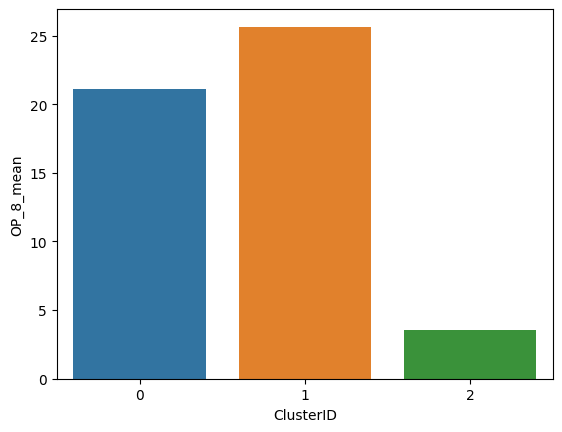

In [387]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.OP_8_mean)
plt.show()

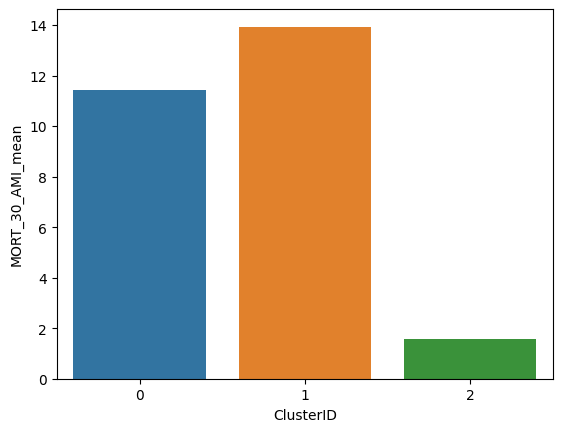

In [388]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.MORT_30_AMI_mean)
plt.show()

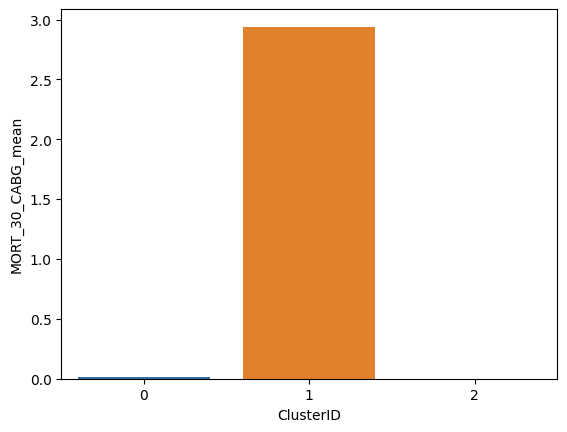

In [389]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.MORT_30_CABG_mean)
plt.show()

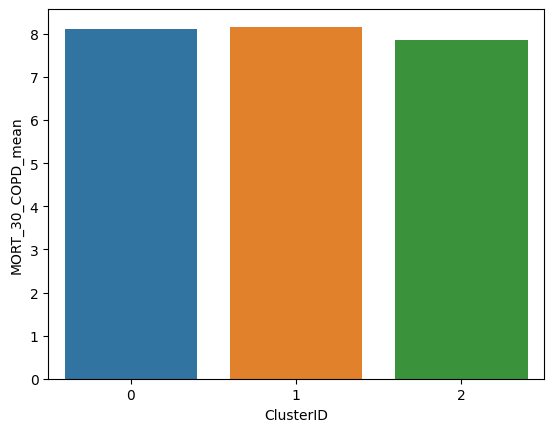

In [390]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.MORT_30_COPD_mean)
plt.show()

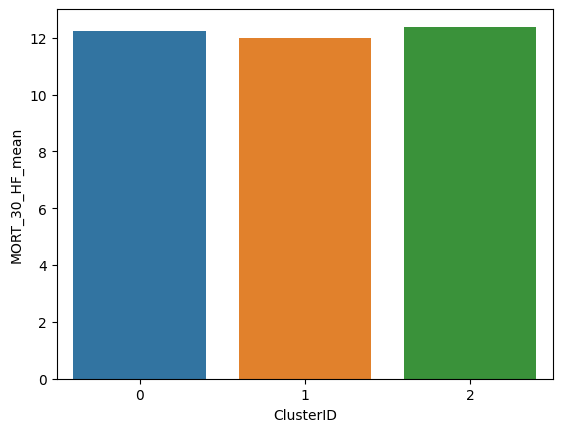

In [391]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.MORT_30_HF_mean)
plt.show()

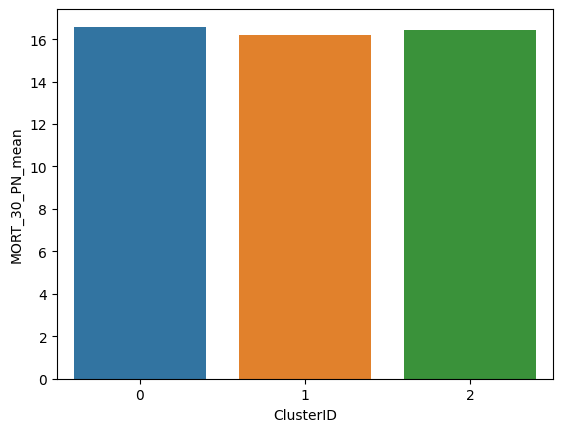

In [392]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.MORT_30_PN_mean)
plt.show()

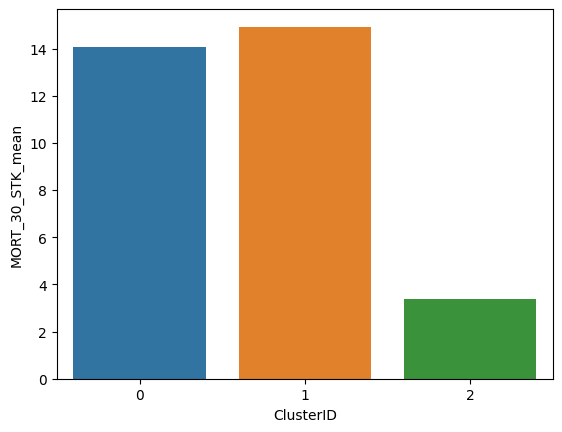

In [393]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.MORT_30_STK_mean)
plt.show()

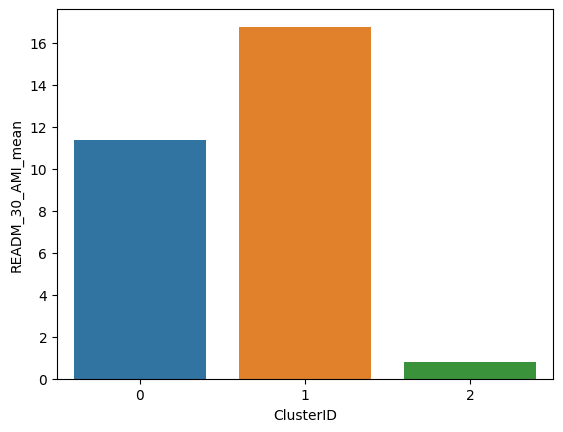

In [394]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.READM_30_AMI_mean)
plt.show()

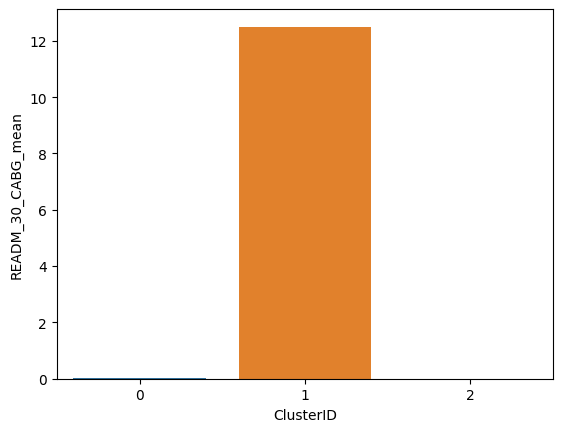

In [395]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.READM_30_CABG_mean)
plt.show()

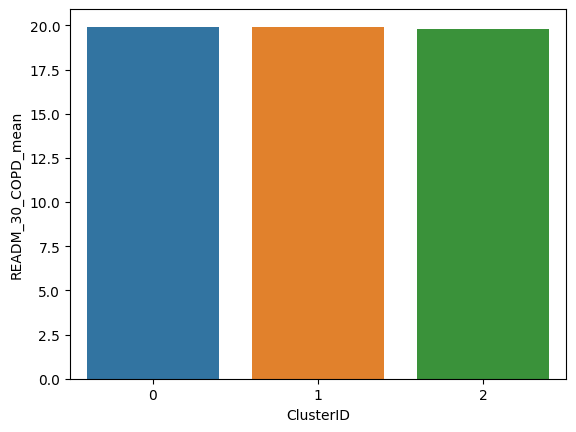

In [396]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.READM_30_COPD_mean)
plt.show()

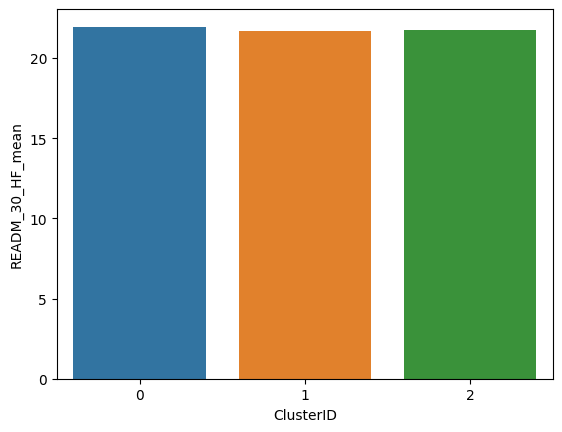

In [397]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.READM_30_HF_mean)
plt.show()

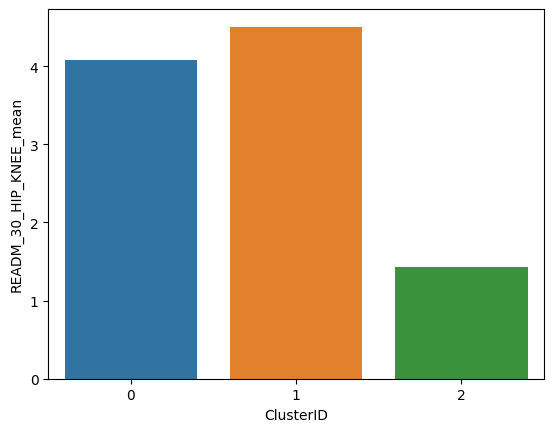

In [398]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.READM_30_HIP_KNEE_mean)
plt.show()

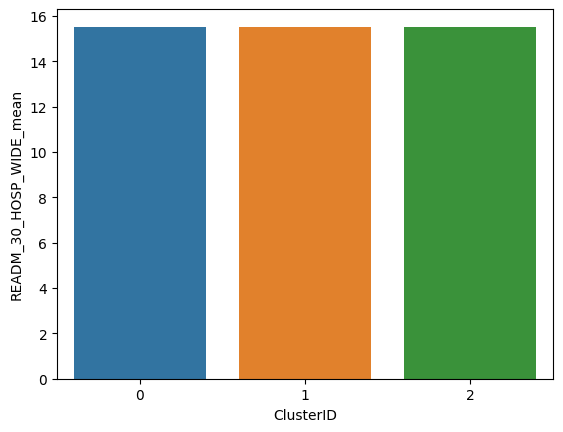

In [399]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.READM_30_HOSP_WIDE_mean)
plt.show()

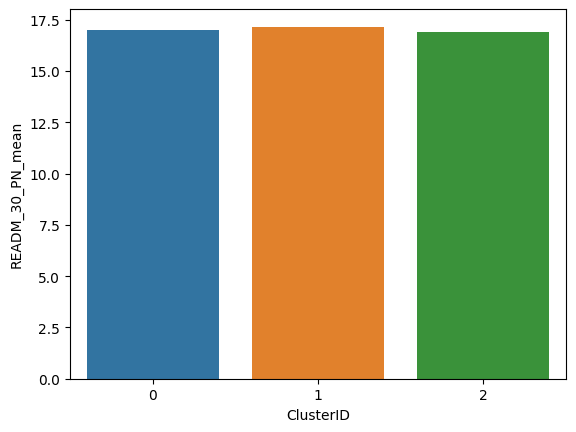

In [400]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.READM_30_PN_mean)
plt.show()

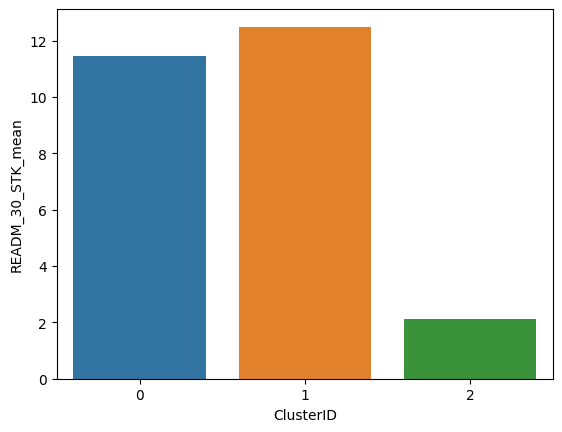

In [401]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.READM_30_STK_mean)
plt.show()

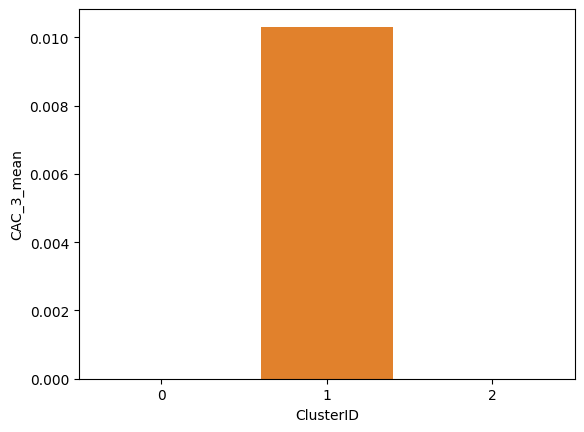

In [402]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.CAC_3_mean)
plt.show()

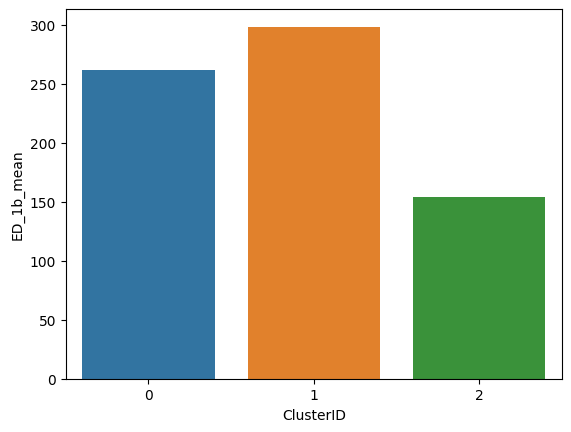

In [403]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.ED_1b_mean)
plt.show()

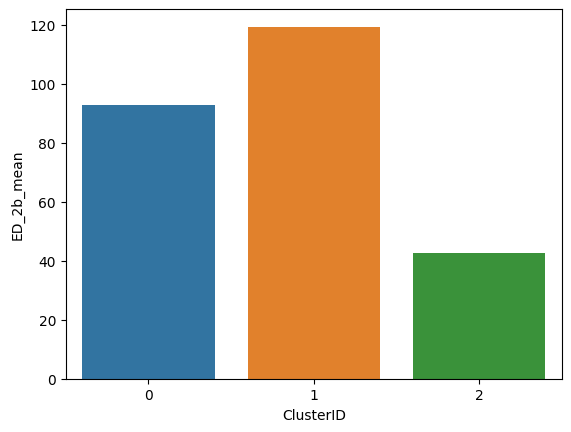

In [404]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.ED_2b_mean)
plt.show()

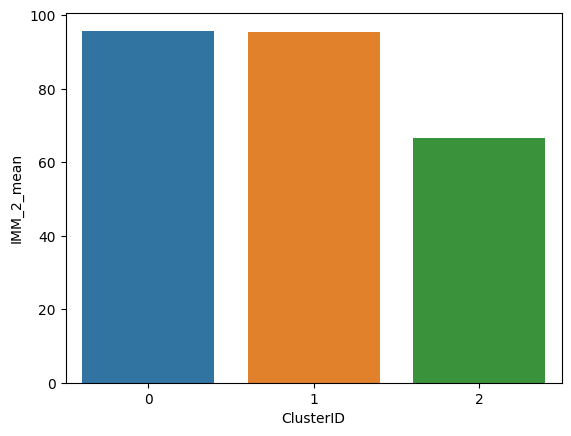

In [405]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.IMM_2_mean)
plt.show()

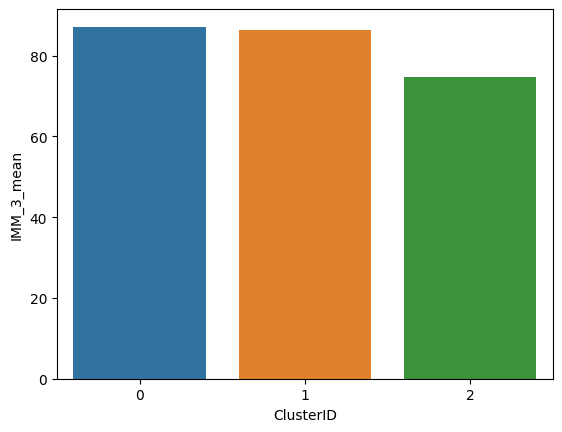

In [406]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.IMM_3_mean)
plt.show()

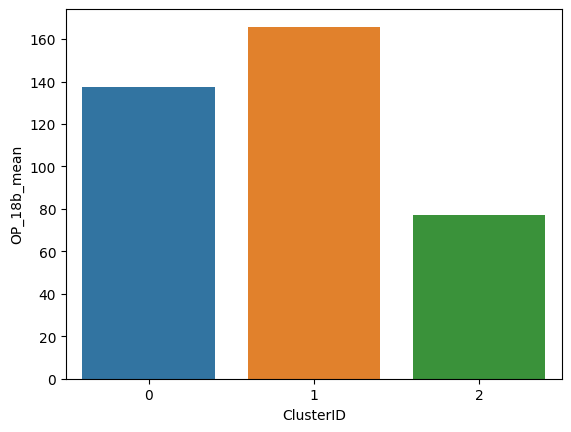

In [407]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.OP_18b_mean)
plt.show()

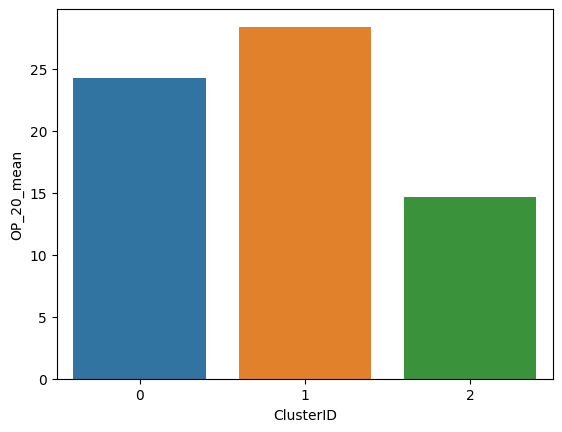

In [408]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.OP_20_mean)
plt.show()

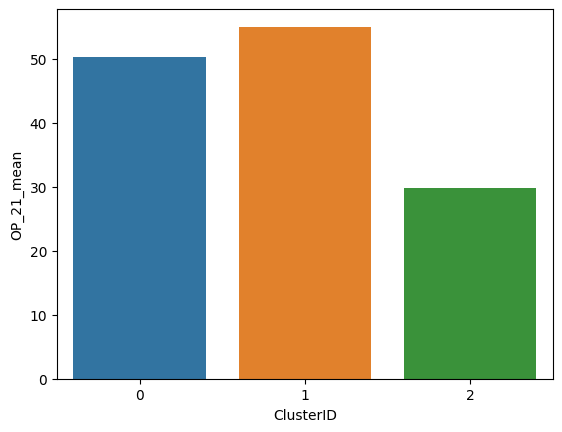

In [409]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.OP_21_mean)
plt.show()

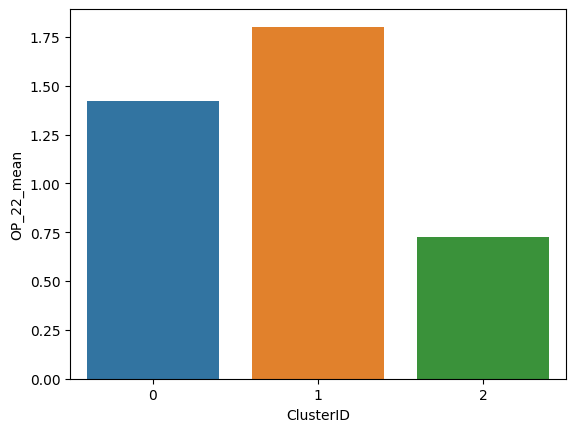

In [410]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.OP_22_mean)
plt.show()

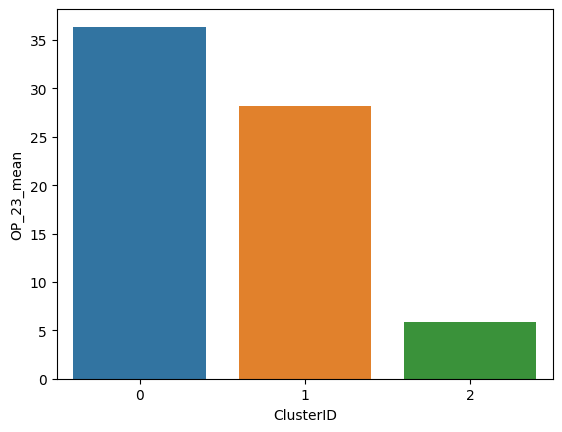

In [411]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.OP_23_mean)
plt.show()

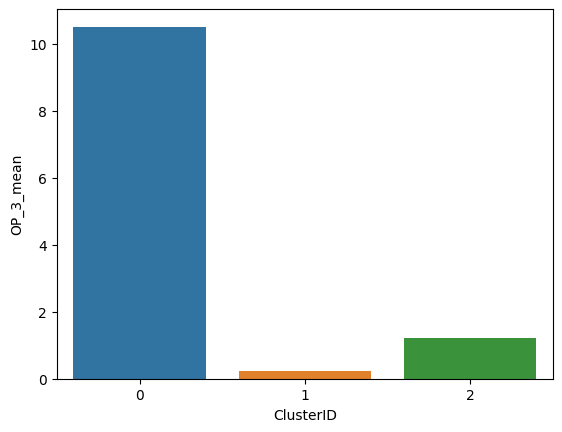

In [412]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.OP_3_mean)
plt.show()

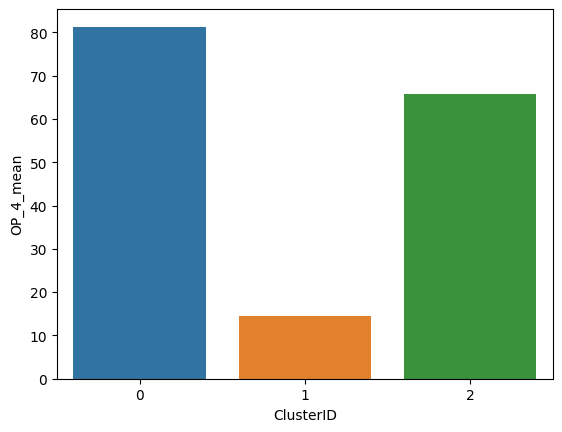

In [413]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.OP_4_mean)
plt.show()

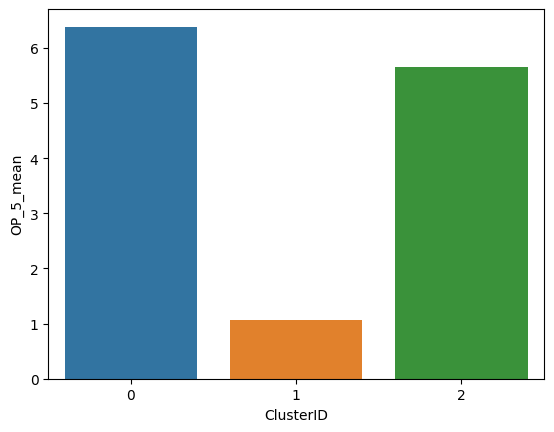

In [414]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.OP_5_mean)
plt.show()

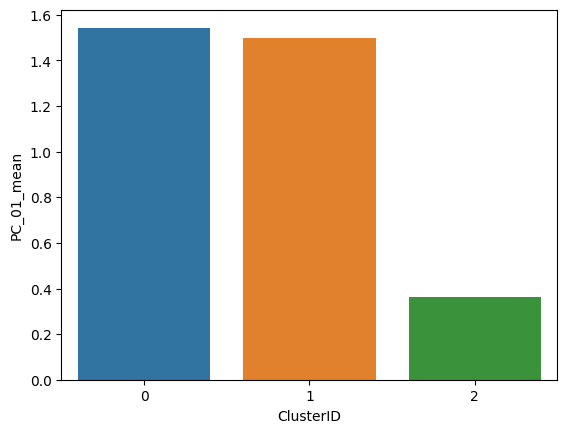

In [415]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.PC_01_mean)
plt.show()

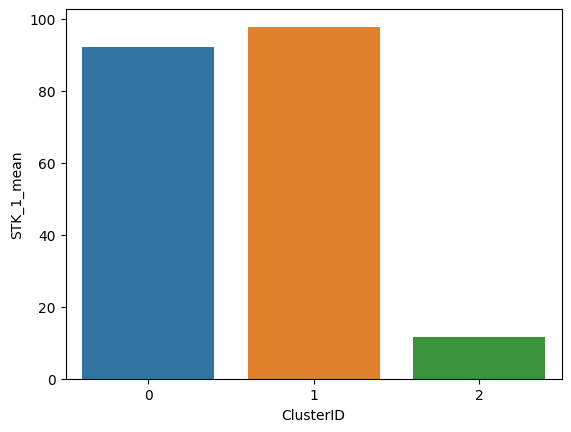

In [416]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.STK_1_mean)
plt.show()

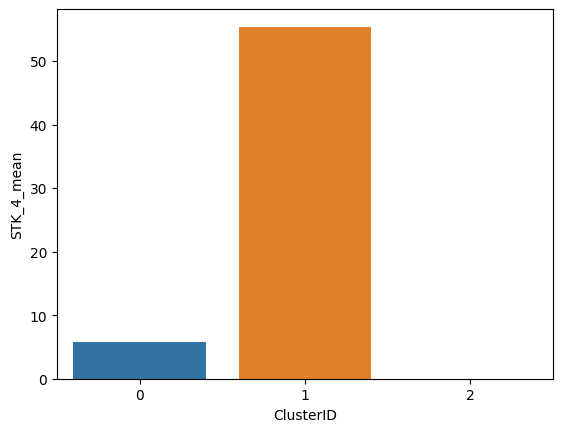

In [417]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.STK_4_mean)
plt.show()

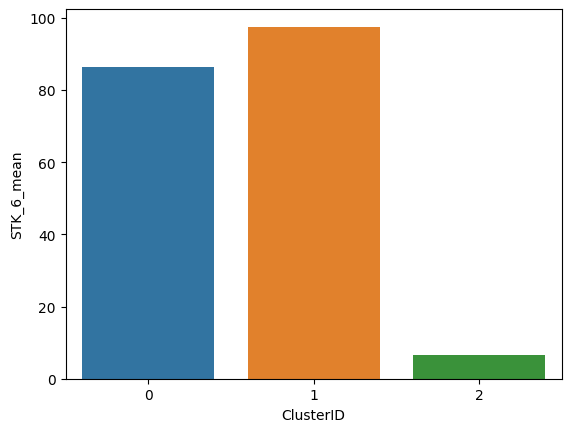

In [418]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.STK_6_mean)
plt.show()

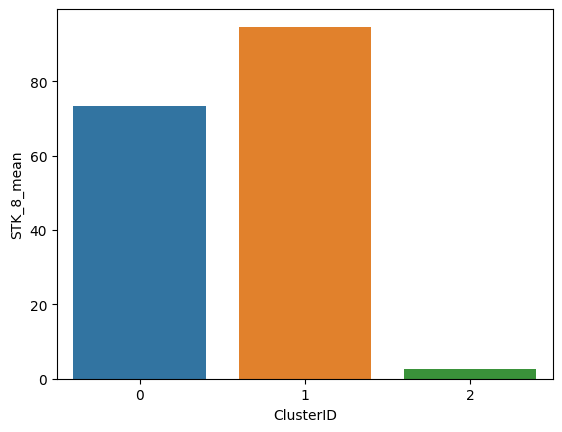

In [419]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.STK_8_mean)
plt.show()

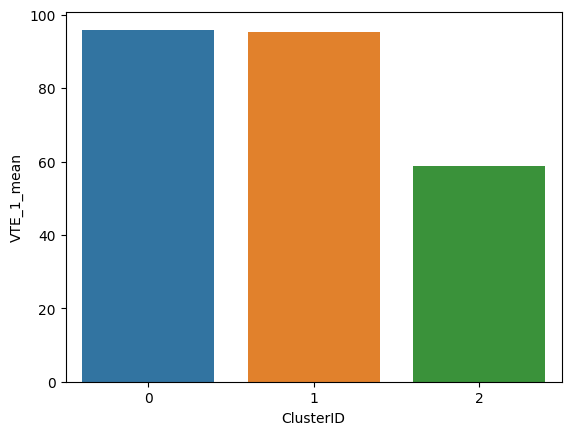

In [420]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.VTE_1_mean)
plt.show()

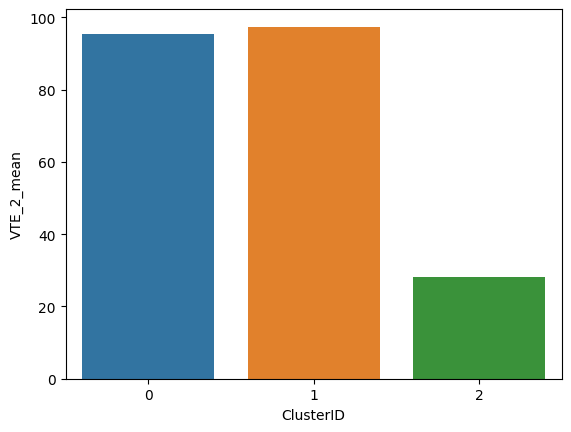

In [421]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.VTE_2_mean)
plt.show()

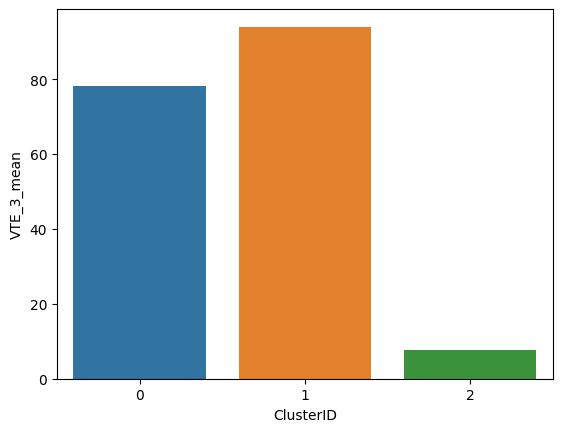

In [422]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.VTE_3_mean)
plt.show()

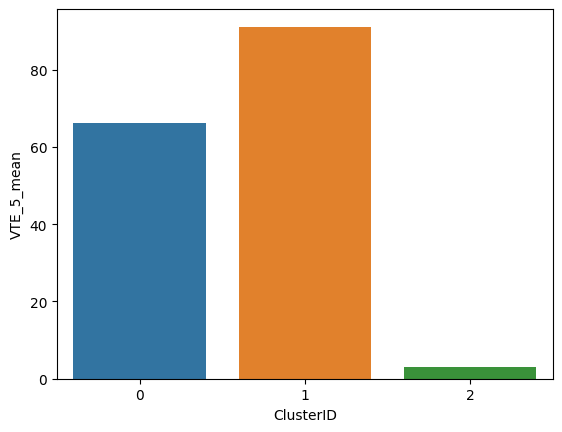

In [423]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.VTE_5_mean)
plt.show()

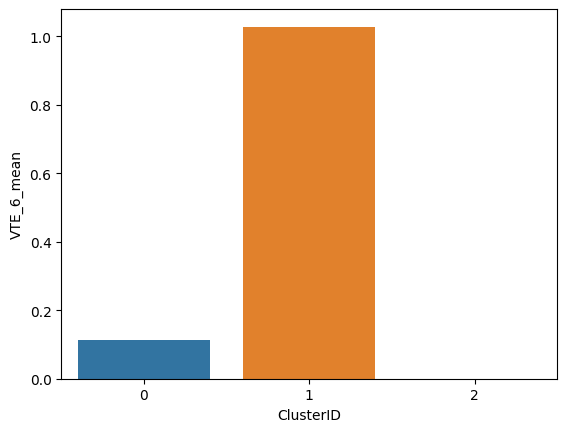

In [424]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.VTE_6_mean)
plt.show()

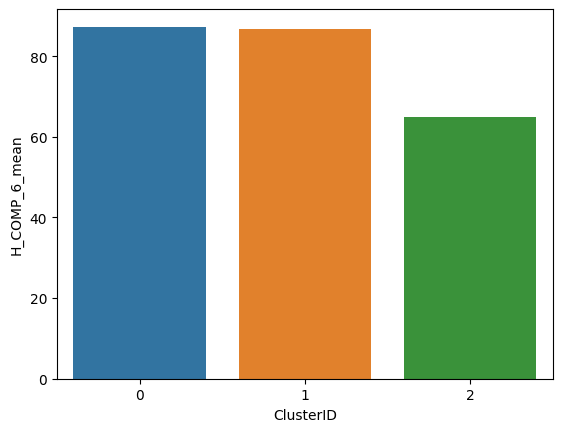

In [425]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.H_COMP_6_mean)
plt.show()

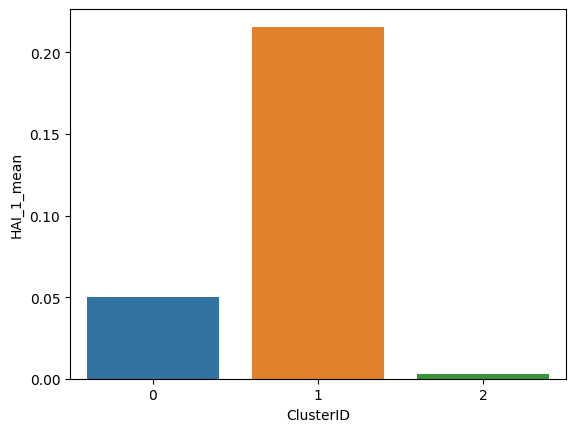

In [426]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.HAI_1_mean)
plt.show()

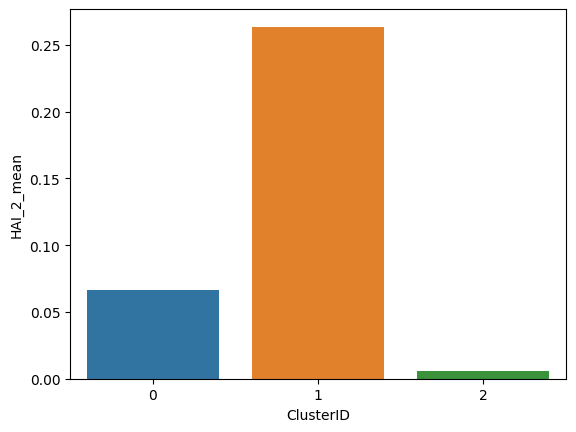

In [427]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.HAI_2_mean)
plt.show()

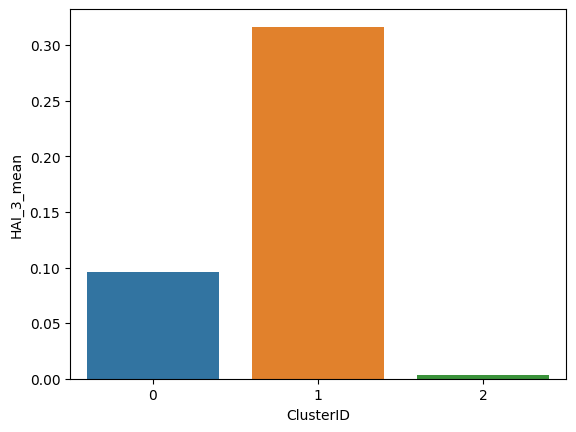

In [428]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.HAI_3_mean)
plt.show()

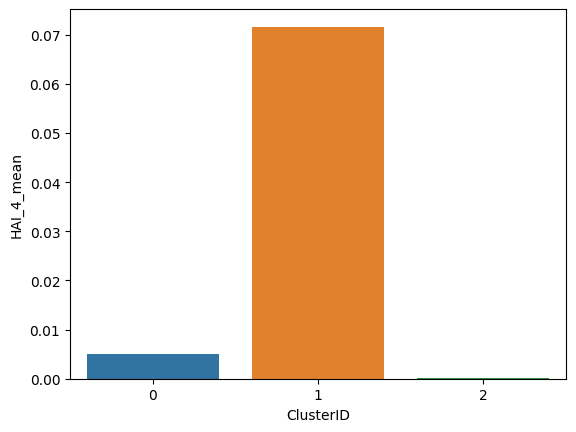

In [429]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.HAI_4_mean)
plt.show()

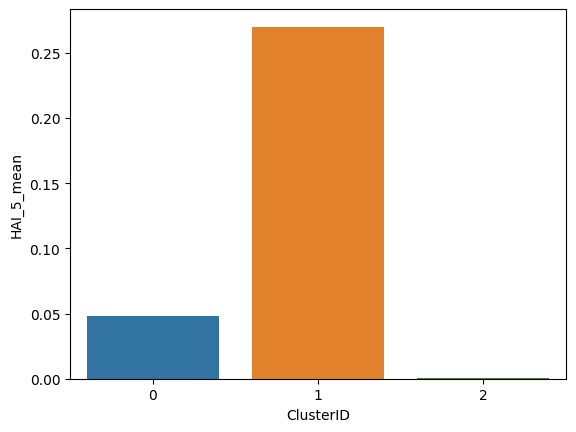

In [430]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.HAI_5_mean)
plt.show()

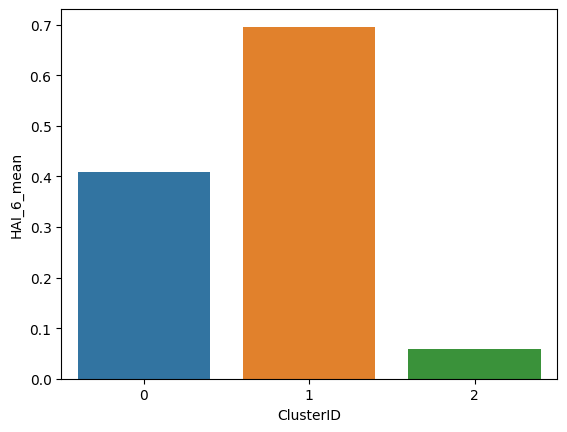

In [431]:
sns.barplot(x=df_clusters.ClusterID, y=df_clusters.HAI_6_mean)
plt.show()

Looks like Cluster 1 has the lowest values among others.

In [432]:
df1 = df_provider_clusterid.loc[df_provider_clusterid['ClusterID'] == 0]
result = pd.DataFrame(df1['Provider_ID'])
result

Provider_ID
0           10005
5           10019
6           10021
10          10035
18          10065
...           ...
2013       670068
2014       670075
2016       670079
2017       670080
2019       670088

[859 rows x 1 columns]

# Recommendations for Hospital

## Recommendation to EVANSTON HOSPITAL is to improve on below parameter in order to increrase the rating to atleast 4 by next year:

• Readmission (Hospital wide all cause unplanned readmission)

• Patient Experience (Discharge Information)

• Mortality (Pueumonia, Chronic Obstructive Pulmonary Disease, Heart Failure Mortality rate)

• Timeliness of Care (Median Time fo ED Dep for admitted ED patients)

• Effectiveness of Care (Influenza Immunization and Healtcare personnel Influenza Vaccination)

### Validate the Measure values for Evanston Hospital

In [433]:
df_evanston = merge_IDs_final[merge_IDs_final['Provider ID'] == 140010]

In [434]:
df_evanston_imp_measure = df_evanston[['READM_30_HOSP_WIDE','PSI_90_SAFETY','H_COMP_6','MORT_30_PN','READM_30_PN','READM_30_HF','MORT_30_HF','MORT_30_COPD','ED_2b','ED_1b']]


Let's check the score of Hospitals for the important Measures where Hospital Rating is atleast 4

In [435]:
df_4 = merge_IDs_final[merge_IDs_final['Hospital overall rating'] == 4]

In [436]:
df_4_imp_measure = df_4[['READM_30_HOSP_WIDE','PSI_90_SAFETY','H_COMP_6','MORT_30_PN','READM_30_PN','READM_30_HF','MORT_30_HF','MORT_30_COPD','ED_2b','ED_1b']]
df_4_imp_measure.describe()

READM_30_HOSP_WIDE  PSI_90_SAFETY    H_COMP_6  MORT_30_PN  READM_30_PN  \
count          964.000000     964.000000  964.000000  964.000000   964.000000   
mean            15.040768       0.627905   85.733402   14.944917    15.855809   
std              0.935815       0.353005   16.364567    3.635570     3.484849   
min              0.000000       0.000000    0.000000    0.000000     0.000000   
25%             14.700000       0.607500   87.000000   14.100000    15.600000   
50%             15.100000       0.760000   89.000000   15.400000    16.400000   
75%             15.500000       0.860000   91.000000   16.800000    17.200000   
max             17.300000       1.340000   99.000000   22.500000    21.800000   

       READM_30_HF  MORT_30_HF  MORT_30_COPD       ED_2b       ED_1b  
count   964.000000  964.000000    964.000000  964.000000  964.000000  
mean     19.930913   11.028216      7.154149   77.406639  223.601660  
std       5.385253    3.288248      2.491830   54.109352  103.960308  
min       0.000000    0.000000      0.000000    0.000000    0.000000  
25%      20.300000   10.800000      6.900000   47.000000  193.750000  
50%      21.200000   11.700000      7.700000   71.000000  232.000000  
75%      22.000000   12.700000      8.400000  103.000000  281.250000  
max      27.400000   17.900000     11.600000  567.000000  792.000000

Validate the score of Important Measure for Evanston Hospital

In [437]:

df_evanston_imp_measure
#last line ofwaiting for this 


READM_30_HOSP_WIDE  PSI_90_SAFETY  H_COMP_6  MORT_30_PN  READM_30_PN  \
1124                15.2           1.45      84.0        13.0         16.6   

      READM_30_HF  MORT_30_HF  MORT_30_COPD  ED_2b  ED_1b  
1124         21.2         9.5           5.7   76.0  245.0

## From the above values for important feature we can see that if Evanston Hospital improve on few measures, it can improve it's rating from 3 to 4 atleast

- PSI_90_SAFETY from 1.45 to 0.62
- H_COMP_6 from 84 to 85.7
- MORT_30_PN from 13 to 14.9
- READM_30_PN from 16.6 to 15.85
- READM_30_HF from 21.2 to 19.93
- MORT_30_HF from 9.5 to 11.02
- MORT_30_COPD from 5.7 to 7.1
- ED_2b FROM 76 to 77.4
- ED_1b from 245 to 223


## Hence, Evanston Hospital should improve on :
#### Safety
#### Re-admission
#### Mortality
#### Timeliness of Care

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0ca795b7-af43-4070-a734-f3d26a536063' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>